In [227]:
import numpy as np
import pandas as pd
import xarray as xr

import geopandas
import geodatasets

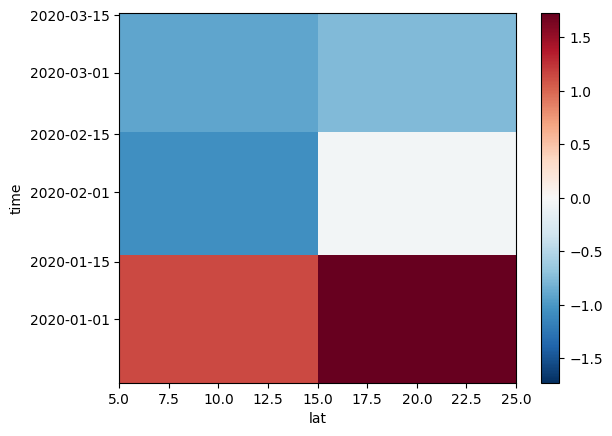

In [228]:
data = xr.DataArray(
    np.random.randn(3,2,3),
    dims = ("time", "lat", "lon"),
    coords = {
        "lat": [10,20],
        "time": pd.date_range(
            "2020-01", periods = 3, freq = "MS"
        ),
    },
)

data[0,:]
data.loc[:,10]
data.isel(lat=0)
data.sel(time="2020-01")
data.mean(dim=["time", "lat"])
data.isel(lon=0).plot();

In [229]:
import rasterio
import rasterio.features
import rasterio.warp

In [230]:
with rasterio.open('/Users/ryjoshi/Downloads/ECO4WUE.001_Water_Use_Efficiency_WUEavg_doy2022156184219_aid0001.tif') as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        '''geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)'''

        # Print GeoJSON shapes to stdout.
        print(dataset.crs)
        print(geom)

EPSG:4326
{'type': 'Polygon', 'coordinates': [[(-107.59926127361543, 33.92017962887676), (-107.59926127361543, 33.69800872874066), (-107.39728772803716, 33.69800872874066), (-107.39728772803716, 33.92017962887676), (-107.59926127361543, 33.92017962887676)]]}


In [231]:
dataset = rasterio.open('/Users/ryjoshi/Downloads/ECO4WUE.001_Water_Use_Efficiency_WUEavg_doy2022156184219_aid0001.tif')
dataset.name

'/Users/ryjoshi/Downloads/ECO4WUE.001_Water_Use_Efficiency_WUEavg_doy2022156184219_aid0001.tif'

In [232]:
dataset.count

1

In [233]:
dataset.width

320

In [234]:
dataset.height

352

In [235]:
dataset.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [236]:
dataset.xy(dataset.height // 2, dataset.width // 2)

(np.float64(-107.49795891716133), np.float64(33.80877859514374))

In [237]:
from rasterio.transform import from_gcps
from rasterio.control import GroundControlPoint

In [12]:
with rasterio.open('/Users/ryjoshi/Downloads/20250330_reprojected_extent.tif') as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    tl = GroundControlPoint(0, 0, -107.598782, 33.919679)
    bl = GroundControlPoint(0, 60, -107.3974, 33.919679)
    br = GroundControlPoint(45, 60, -107.3974, 33.698067)
    tr = GroundControlPoint(45, 0, -107.598782, 33.698067)
    gcps = [tl, bl, br, tr]

    transform = from_gcps(gcps)
    crs = 'epsg:4326'

    print(dataset.crs)
    print(geom)

'''with rasterio.open(filepath, 'r+') as ds:
    ds.crs = crs
    ds.transform = transform

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)
        
        # Print GeoJSON shapes to stdout.
        print(dataset.crs)
        print(geom)'''

None
{'type': 'Polygon', 'coordinates': [[(-107.59926127361543, 33.92017962887676), (-107.59926127361543, 33.69800872874066), (-107.39728772803716, 33.69800872874066), (-107.39728772803716, 33.92017962887676), (-107.59926127361543, 33.92017962887676)]]}


/Users/ryjoshi/miniforge3/lib/python3.10/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


"with rasterio.open(filepath, 'r+') as ds:\n    ds.crs = crs\n    ds.transform = transform\n\n    # Extract feature shapes and values from the array.\n    for geom, val in rasterio.features.shapes(\n            mask, transform=dataset.transform):\n\n        # Transform shapes from the dataset's own coordinate\n        # reference system to CRS84 (EPSG:4326).\n        geom = rasterio.warp.transform_geom(\n            dataset.crs, 'EPSG:4326', geom, precision=6)\n        \n        # Print GeoJSON shapes to stdout.\n        print(dataset.crs)\n        print(geom)"

In [238]:
test_path = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20240406_ET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    print(data)

[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 152.39233 161.00047       nan]
 [      nan       nan       nan ... 144.40862 168.88841       nan]
 [      nan       nan       nan ... 139.04951 144.65076 166.00804]]


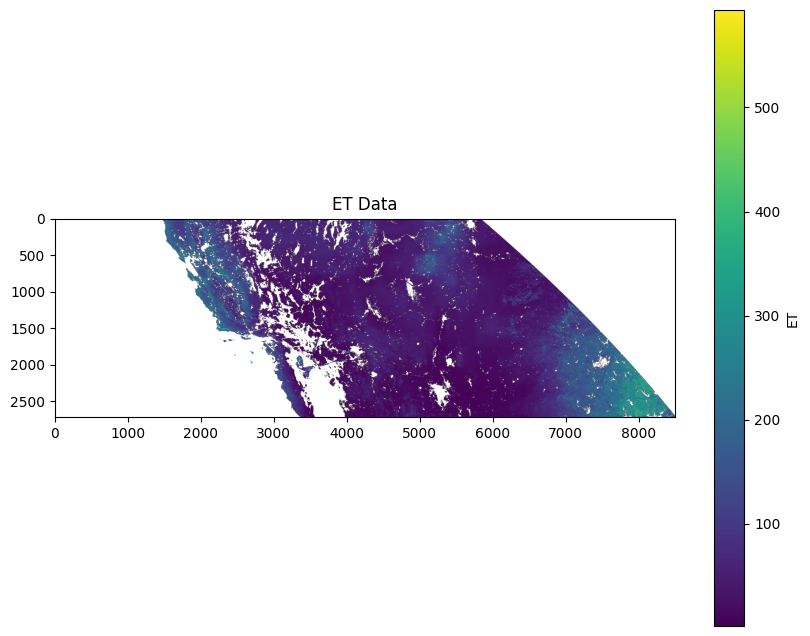

In [239]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [240]:
test_path = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_PET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    print(data)

[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 405.08334 402.14795       nan]
 [      nan       nan       nan ... 402.9377  397.6011        nan]
 [      nan       nan       nan ... 403.94223 397.40744 402.252  ]]


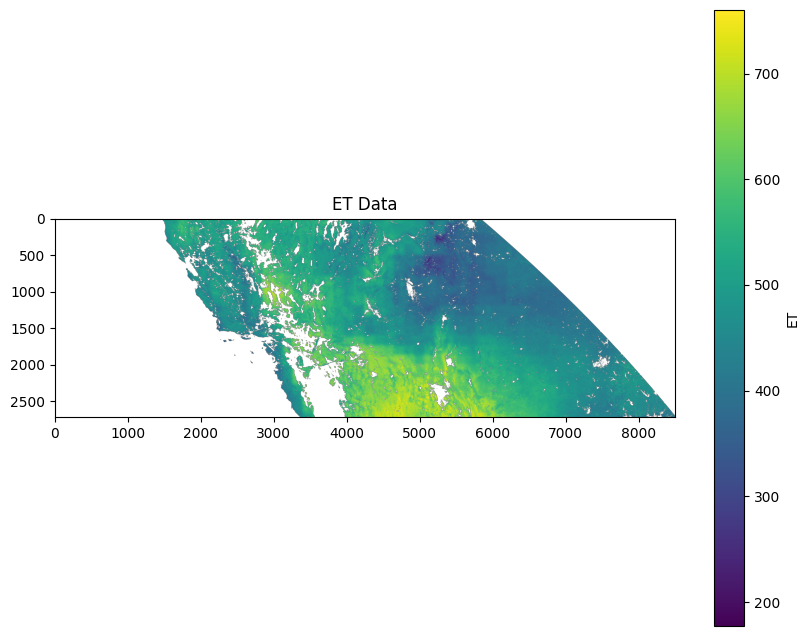

In [241]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [242]:
day = int(input("What day would you like to see ET data for? (1, 9, 17, or 25)"))

str_day = str(day)

if day < 10:
    str_day = "0" + str(day)

print(str_day)

What day would you like to see ET data for? (1, 9, 17, or 25) 17


17


In [243]:
test_path = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_202505" + str_day + "_ET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    print(data)

[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 234.88487 232.77783       nan]
 [      nan       nan       nan ... 243.19945 238.15723       nan]
 [      nan       nan       nan ... 239.98349 238.11641 237.12466]]


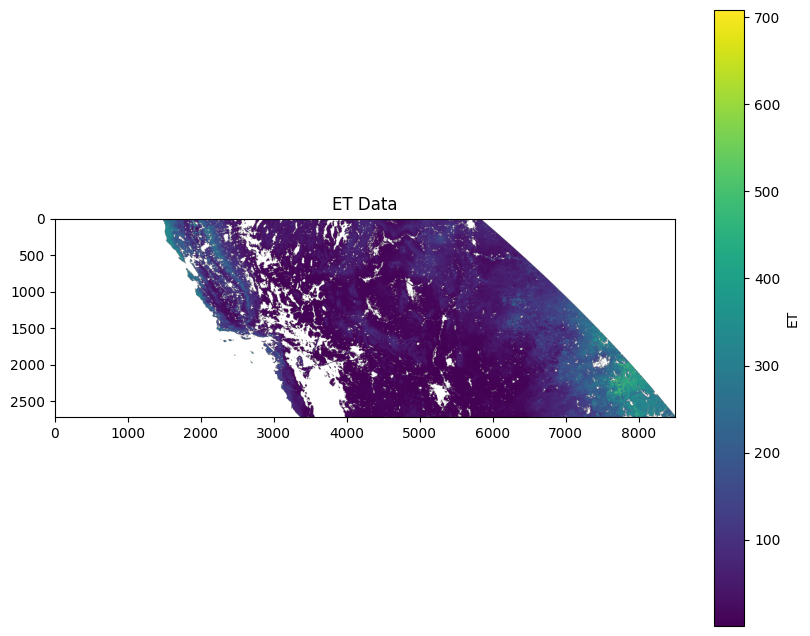

In [244]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

What day would you like to see ET data for? (enter a number between 1 and 28) 6


09
[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 256.28247 259.7041        nan]
 [      nan       nan       nan ... 260.26102 268.00256       nan]
 [      nan       nan       nan ... 248.99174 248.05821 247.12466]]


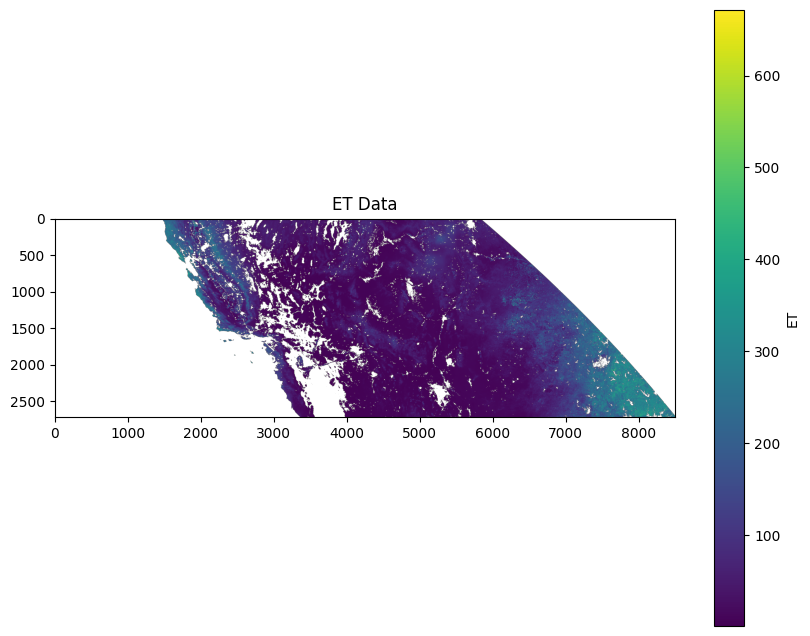

In [245]:
day = int(input("What day would you like to see ET data for? (enter a number between 1 and 28)"))

if day%8 < 5:
    day = 8 * (int(day/8)) + 1
else:
    day = 8 * (int(day/8)) + 9

str_day = str(day)

if day < 10:
    str_day = "0" + str(day)

print(str_day)

test_path = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_202505" + str_day + "_ET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    print(data)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 168.93706 179.7783        nan]
 [      nan       nan       nan ... 159.92322 184.7172        nan]
 [      nan       nan       nan ... 151.26404 181.13739 168.1193 ]]
[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 425.21954 439.48242       nan]
 [      nan       nan       nan ... 420.18423 452.71976       nan]
 [      nan       nan       nan ... 400.2558  429.19562 415.24396]]
[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan     

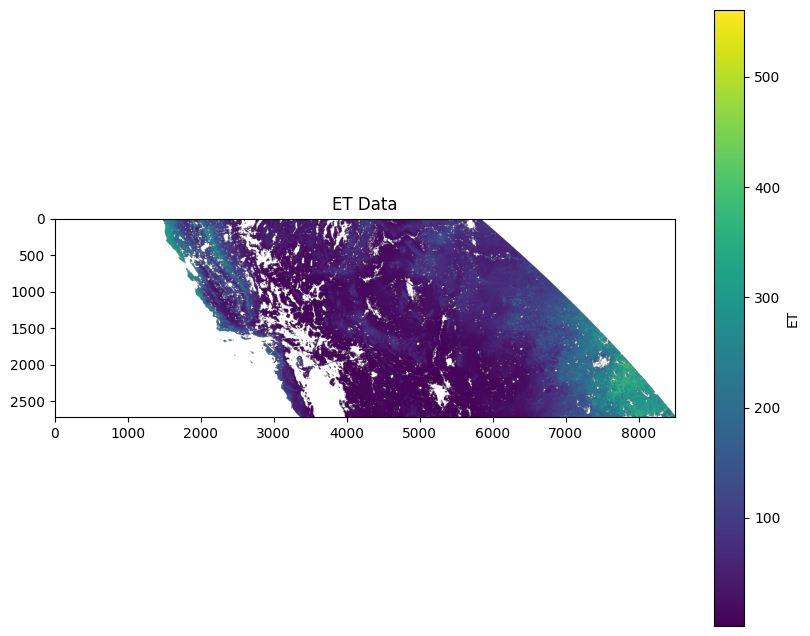

In [246]:
test_path = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif"
test_path_2 = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250509_ET.tif"
test_path_3 = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250517_ET.tif"
test_path_4 = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250525_ET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    print(data)

    with rasterio.open(test_path_2) as src:
        data += src.read(1)
        data = np.where(data >= 32700, np.nan, data)
        print(data)

        with rasterio.open(test_path_3) as src:
            data += src.read(1)
            data = np.where(data >= 32700, np.nan, data)
            print(data)

            with rasterio.open(test_path_4) as src:
                data += src.read(1)
                data = np.where(data >= 32700, np.nan, data)
                data = data/4
                print(data)
        
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 234.17603 233.8154        nan]
 [      nan       nan       nan ... 274.5094  265.181         nan]
 [      nan       nan       nan ... 226.      226.      243.5067 ]]
[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 468.7456  470.18555       nan]
 [      nan       nan       nan ... 519.0672  498.721         nan]
 [      nan       nan       nan ... 467.0165  468.8836  482.13   ]]
[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan     

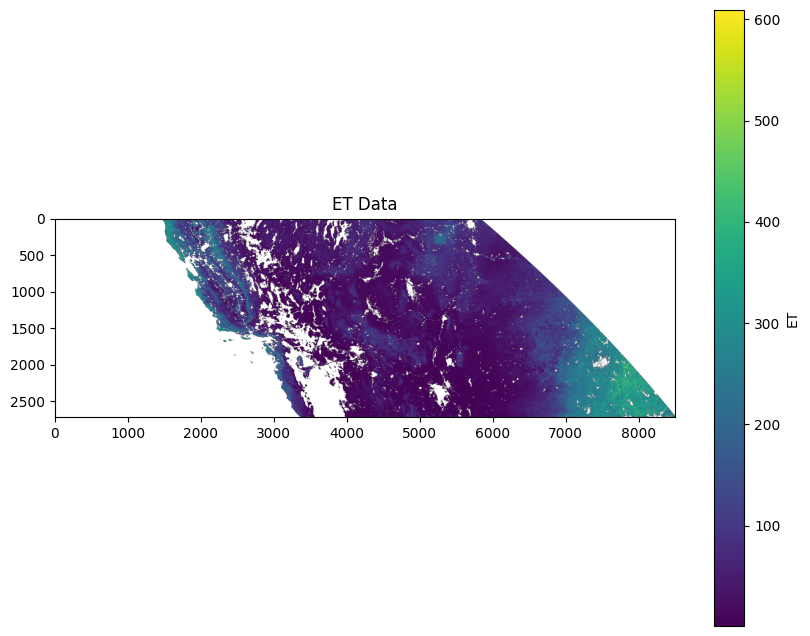

In [247]:
test_path = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_20240508_ET.tif"
test_path_2 = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_20240516_ET.tif"
test_path_3 = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_20240524_ET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    print(data)

    with rasterio.open(test_path_2) as src:
        data += src.read(1)
        data = np.where(data >= 32700, np.nan, data)
        print(data)

        with rasterio.open(test_path_3) as src:
            data += src.read(1)
            data = np.where(data >= 32700, np.nan, data)
            data = data/3
            print(data)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [      nan       nan       nan ... 327.54184 326.40723       nan]
 [      nan       nan       nan ... 327.7149  322.6867        nan]
 [      nan       nan       nan ... 326.0165  327.88358 326.24933]]


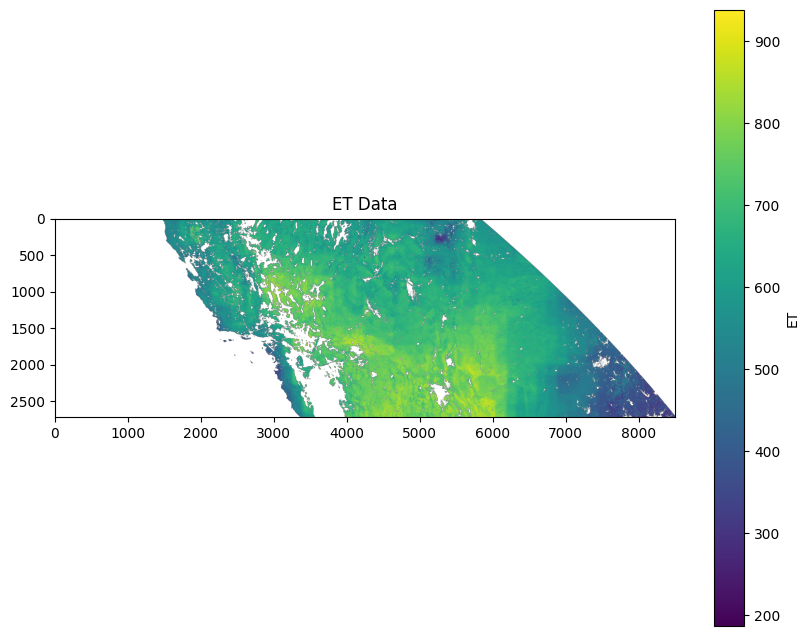

In [248]:
test_path = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_20240516_PET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    print(data)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [ ]:
'''day = 1

for day <= 31:

    str_day = str(day)
    if day < 10:
        str_day = "0" + str(day)
    print(str_day)

    test_path = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_202405" + str(day) + "_ET.tif"
    test_path_2 = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_202405" + str(day) + "_ET.tif"
    test_path_3 = "/Applications/MODIS_S3_downloads/MOD16A2_MERGED_202405" + str(day) + "_ET.tif"

    with rasterio.open(test_path) as src:
        data = src.read(1)
        data = np.where(data >= 32700, np.nan, data)
        print(data)

    with rasterio.open(test_path_2) as src:
        data += src.read(1)
        data = np.where(data >= 32700, np.nan, data)
        print(data)

    with rasterio.open(test_path_3) as src:
        data += src.read(1)
        data = np.where(data >= 32700, np.nan, data)
        data = data/3
        print(data)

    day += 1'''

[[         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 ...
 [         nan          nan          nan ... 237.60923767 236.65445455
           nan]
 [         nan          nan          nan ... 260.39298503 251.27308655
           nan]
 [         nan          nan          nan ... 237.32233175 236.07761129
  250.29714457]]
[[         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 ...
 [         nan          nan          nan ... 386.31615194 383.09863281
           nan]
 [         nan          nan          nan ... 383.96601359 381.08758545
           nan]
 [         nan          nan     

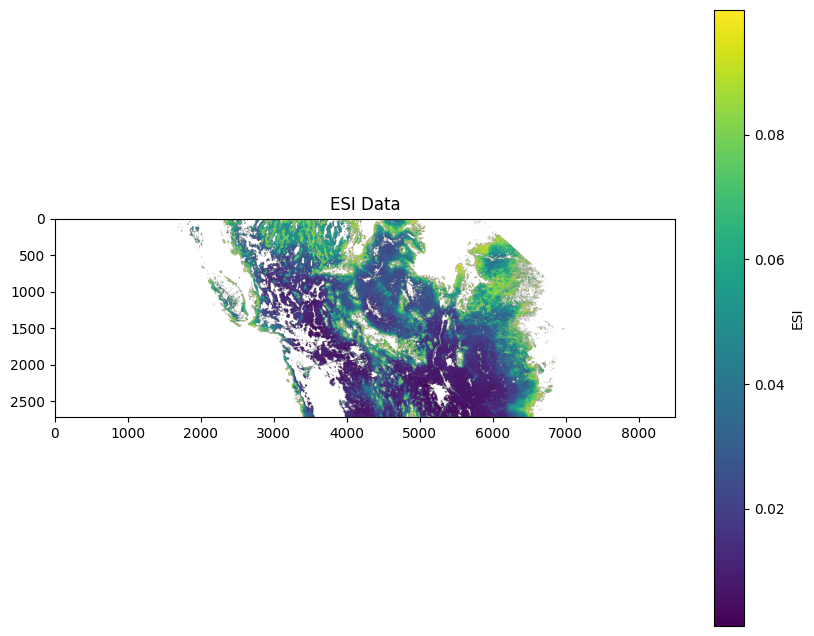

In [249]:
import os
all_files = os.listdir("/Applications/MODIS_S3_downloads")

monthly_files = []

for filename in all_files:
    if "202405" in filename and "_ET" in filename:
        monthly_files.append(filename)

monthly_files

#better to rely on some kind of reference -- load an image, get the dimensions of that image, and compare that to everything else
data = np.zeros((2725, 8496))

for file in monthly_files:
    test_path = "/Applications/MODIS_S3_downloads/" + file
    with rasterio.open(test_path) as src:
        data += src.read(1)
        data = np.where(data >= 32700, np.nan, data)
        #print(data)

data /= len(monthly_files)
print(data)


pet_files = []

for filename in all_files:
    if "202405" in filename and "PET" in filename:
        pet_files.append(filename)

pet_data = np.zeros((2725, 8496))

for file in pet_files:
    test_path = "/Applications/MODIS_S3_downloads/" + file
    with rasterio.open(test_path) as src:
        pet_data += src.read(1)
        pet_data = np.where(pet_data >= 32700, np.nan, pet_data)
        #print(data)

pet_data /= len(pet_files)
print(pet_data)

#each ET or PET file is an 8 day average
esi_data = data/pet_data
esi_data = np.where(esi_data >= 0.1, np.nan, esi_data)
print(esi_data)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(esi_data)
plt.colorbar(label='ESI')
plt.title('ESI Data')
plt.show()

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


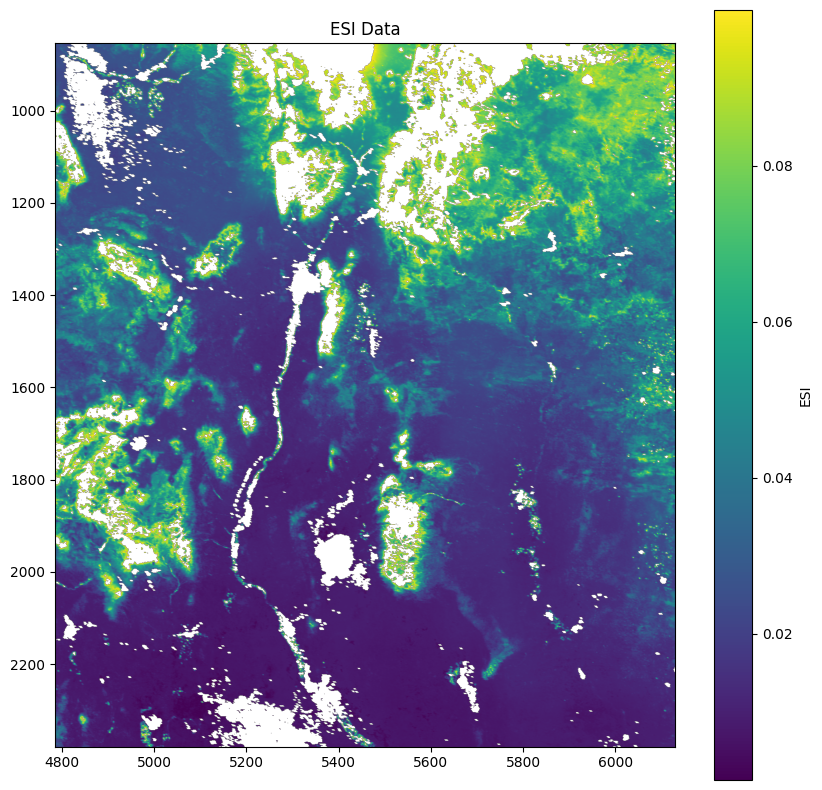

In [250]:
test_path = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    #print(data)

test_path_2 = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_PET.tif"

with rasterio.open(test_path_2) as src:
    data2 = src.read(1)
    data2 = np.where(data2 >= 32700, np.nan, data2)
    #print(data2)

esi = data/data2
esi = np.where(esi > 0.1, np.nan, esi)
print(esi)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(esi_data)
plt.colorbar(label='ESI')
plt.title('ESI Data')
plt.xlim(4785,6129)
plt.ylim(2379,854)
plt.show()

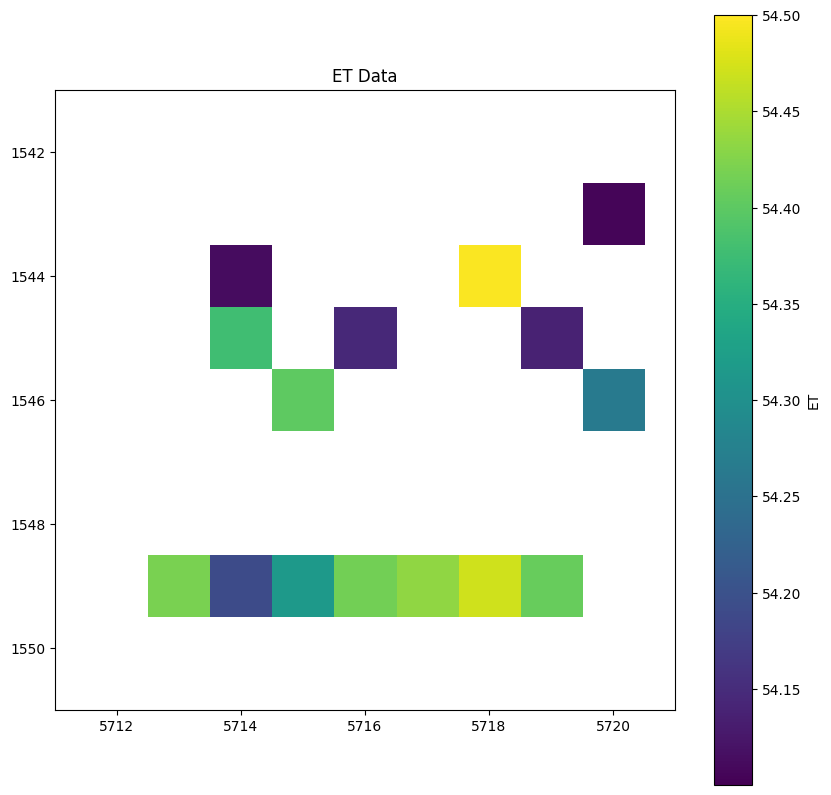

In [251]:
test_path = "/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif"

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data > 54.5, np.nan, data)
    data = np.where(data < 54.1, np.nan, data)
    #print(data)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(data)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.xlim(5711,5721)
plt.ylim(1551,1541)
plt.show()

In [252]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path

#geopandas.GeoDataFrame("/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif")

In [253]:
#! means "run this python environment in the jupyter notebook it's in (basically a shell command)
!pip install geopandas

In [254]:
import rioxarray

In [255]:
import xarray
xds = xarray.open_dataset("/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif", engine="rasterio")

In [256]:
from affine import Affine

In [257]:
rds = xarray.open_dataset("/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif", decode_coords="all")
rds.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]')

In [258]:
xda = xarray.DataArray(1)
xda.rio.write_crs(4326, inplace=True)
xda.spatial_ref

<xarray.DataArray 'spatial_ref' ()> Size: 8B
array(0)
Coordinates:
    spatial_ref  int64 8B 0
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    horizontal_datum_name:        World Geodetic System 1984
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...

In [259]:
xda.rio.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [260]:
rds.rio.write_crs(4326, inplace=True)
#rds.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
rds.rio.write_coordinate_system(inplace=True)

rds = rds.rename(x="longitude", y="latitude")

In [261]:
transform = Affine(3.0, 0.0, 466266.0, 0.0, -3.0, 8084700.0)
xda.rio.write_transform(transform, inplace=True)
xda.spatial_ref.GeoTransform

'466266.0 3.0 0.0 8084700.0 0.0 -3.0'

In [262]:
xda.rio.transform()

Affine(3.0, 0.0, 466266.0,
       0.0, -3.0, 8084700.0)

In [263]:
import urllib
import geojson

In [264]:
geometry = ''' {"type": "Polygon",
               "coordinates": [
                [[-109.05, 31.333],
                [-109.05, 36.999],
                 [-103, 36.999],
                [-103, 31.333]]]}'''

cropping_geometries = [geojson.loads(geometry)]
xds = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif')
cropped = xds.rio.clip(geometries=cropping_geometries, crs=4326)

In [265]:
cropped

<xarray.DataArray (band: 1, y: 1526, x: 1347)> Size: 8MB
array([[[56.05772  , 56.702312 , 56.70582  , ..., 81.643105 ,
         81.7709   , 82.24886  ],
        [55.311386 , 55.770554 , 56.228333 , ..., 82.565765 ,
         82.62166  , 83.73735  ],
        [55.013046 , 55.254257 , 55.906826 , ..., 82.24882  ,
         82.425995 , 82.98256  ],
        ...,
        [13.702225 , 13.607969 , 14.792874 , ..., 15.7801075,
         17.137785 , 17.75787  ],
        [15.758725 , 14.838384 , 13.789731 , ..., 15.920914 ,
         17.08932  , 17.68497  ],
        [15.607399 , 17.527592 , 17.061396 , ..., 15.820736 ,
         17.021313 , 17.478968 ]]], shape=(1, 1526, 1347), dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 11kB -1.214e+07 -1.214e+07 ... -1.147e+07
  * y            (y) float64 12kB 4.439e+06 4.438e+06 ... 3.677e+06 3.676e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     32700.0

TypeError: Invalid shape (1, 1526, 1347) for image data

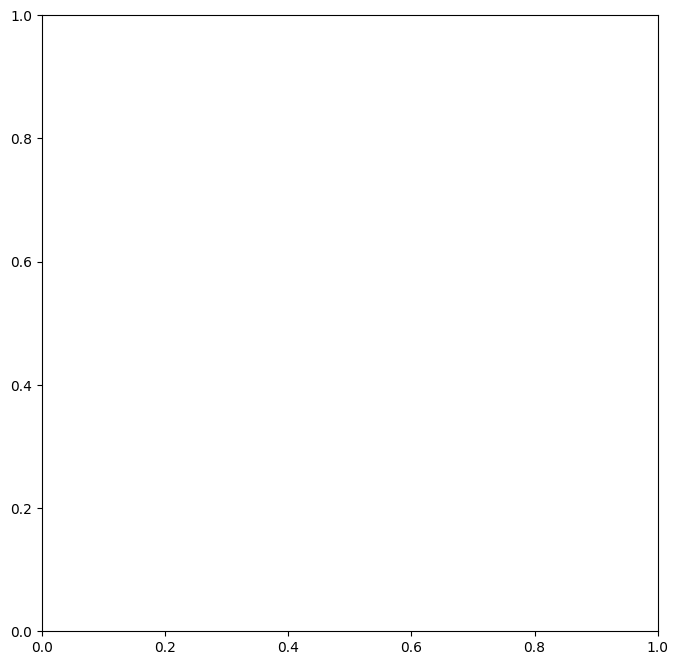

In [41]:
#import rasterio
#import rasterio.features
#import rasterio.warp

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(cropped)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [266]:
def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

valid_imshow_data(cropped)

cropped.ndim

The "data" has 3 dimensions but the last dimension must have a length of 3 (RGB) or 4 (RGBA), not "1347".


3

In [267]:
if cropped.shape[0] == 1:
    cropped = cropped[0, :, :]

cropped.ndim

2

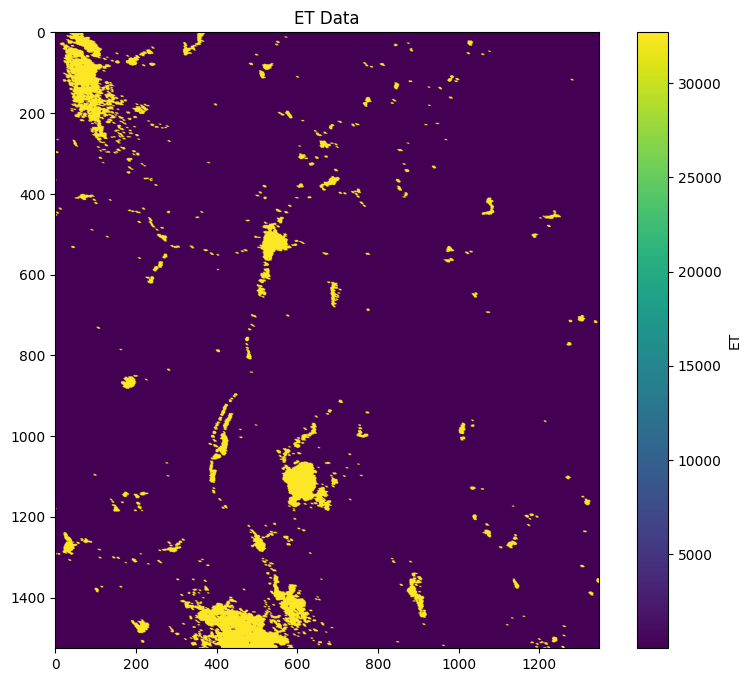

In [268]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(cropped)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [269]:
geometry = ''' {"type": "Polygon",
               "coordinates": [
                [[-104.88, 34.45],
                [-104.84, 34.45],
                 [-104.84, 34.49],
                [-104.88, 34.49]]]}'''

cropping_geometries = [geojson.loads(geometry)]
xds = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif')
beam = xds.rio.clip(geometries=cropping_geometries, crs=4326)

In [270]:
if beam.shape[0] == 1:
    beam = beam[0, :, :]

beam.ndim

2

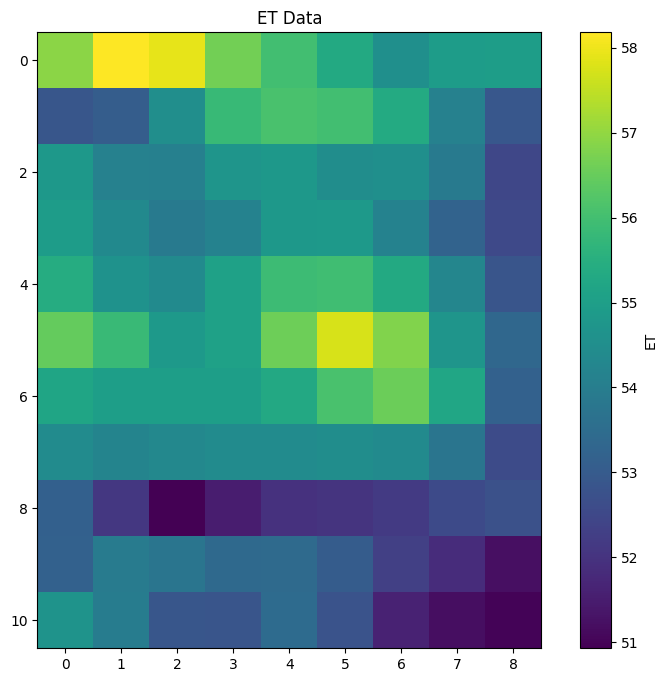

In [271]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(beam)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [272]:
geometry = ''' {"type": "Polygon",
               "coordinates": [
                [[-109.05, 31.333],
                [-109.045, 36.999],
                 [-103, 36.999],
                [-103, 32.002],
                [-106.618, 32.002],
                [-106.618, 31.781],
                [-108.210, 31.781],
                [-108.210, 31.333]]]}'''

cropping_geometries = [geojson.loads(geometry)]
xds = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif')
new_mexico = xds.rio.clip(geometries=cropping_geometries, crs=4326)

In [273]:
if new_mexico.shape[0] == 1:
    new_mexico = new_mexico[0, :, :]

new_mexico.ndim

2

In [274]:
new_mexico = np.where(new_mexico >= 32700, np.nan, new_mexico)

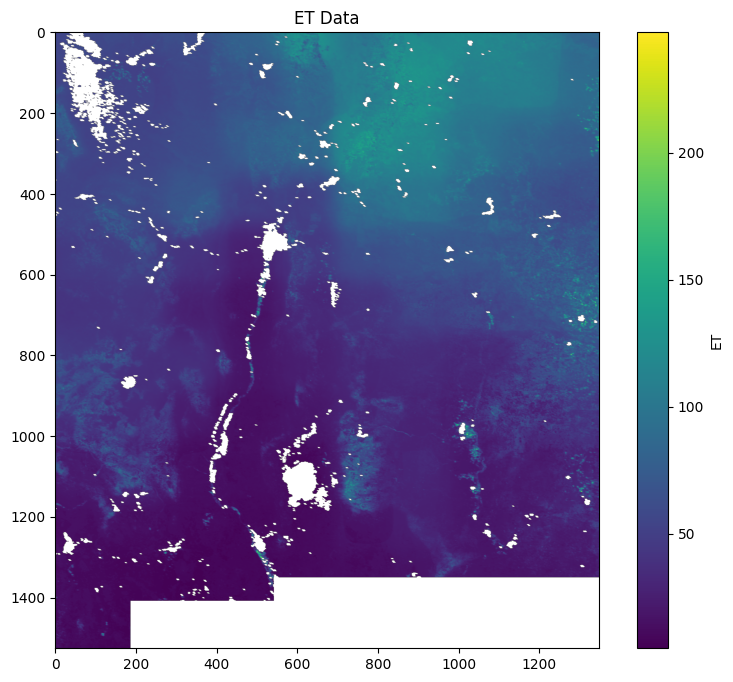

In [275]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(new_mexico)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [276]:
new_mexico = np.where(new_mexico >= 32700, np.nan, new_mexico)

In [277]:
#monthly average
geometry = ''' {"type": "Polygon",
               "coordinates": [
                [[-109.05, 31.333],
                [-109.045, 36.999],
                 [-103, 36.999],
                [-103, 32.002],
                [-106.618, 32.002],
                [-106.618, 31.781],
                [-108.210, 31.781],
                [-108.210, 31.333]]]}'''

cropping_geometries = [geojson.loads(geometry)]

xds = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif')
new_mexico = xds.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico = new_mexico[0, :, :]
print(new_mexico)

xds_2 = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250509_ET.tif')
new_mexico_2 = xds_2.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico_2 = new_mexico_2[0, :, :]
new_mexico += new_mexico_2
print(new_mexico_2)

xds_3 = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250517_ET.tif')
new_mexico_3 = xds_3.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico_3 = new_mexico_3[0, :, :]
new_mexico += new_mexico_3
print(new_mexico_3)

xds_4 = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250525_ET.tif')
new_mexico_4 = xds_4.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico_4 = new_mexico_4[0, :, :]
new_mexico += new_mexico_4
print(new_mexico_4)
print(new_mexico)

<xarray.DataArray (y: 1526, x: 1347)> Size: 8MB
array([[3.2700000e+04, 5.6702312e+01, 5.6705818e+01, ..., 8.1643105e+01,
        8.1770897e+01, 8.2248863e+01],
       [3.2700000e+04, 5.5770554e+01, 5.6228333e+01, ..., 8.2565765e+01,
        8.2621658e+01, 8.3737350e+01],
       [3.2700000e+04, 5.5254257e+01, 5.5906826e+01, ..., 8.2248817e+01,
        8.2425995e+01, 8.2982559e+01],
       ...,
       [1.3702225e+01, 1.3607969e+01, 1.4792874e+01, ..., 3.2700000e+04,
        3.2700000e+04, 3.2700000e+04],
       [1.5758725e+01, 1.4838384e+01, 1.3789731e+01, ..., 3.2700000e+04,
        3.2700000e+04, 3.2700000e+04],
       [1.5607399e+01, 1.7527592e+01, 1.7061396e+01, ..., 3.2700000e+04,
        3.2700000e+04, 3.2700000e+04]], shape=(1526, 1347), dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 11kB -1.214e+07 -1.214e+07 ... -1.147e+07
  * y            (y) float64 12kB 4.439e+06 4.438e+06 ... 3.677e+06 3.676e+06
    spatial_ref  int64 8B 0
Attributes:
  

In [54]:
new_mexico = np.where(new_mexico >= 400, np.nan, new_mexico)

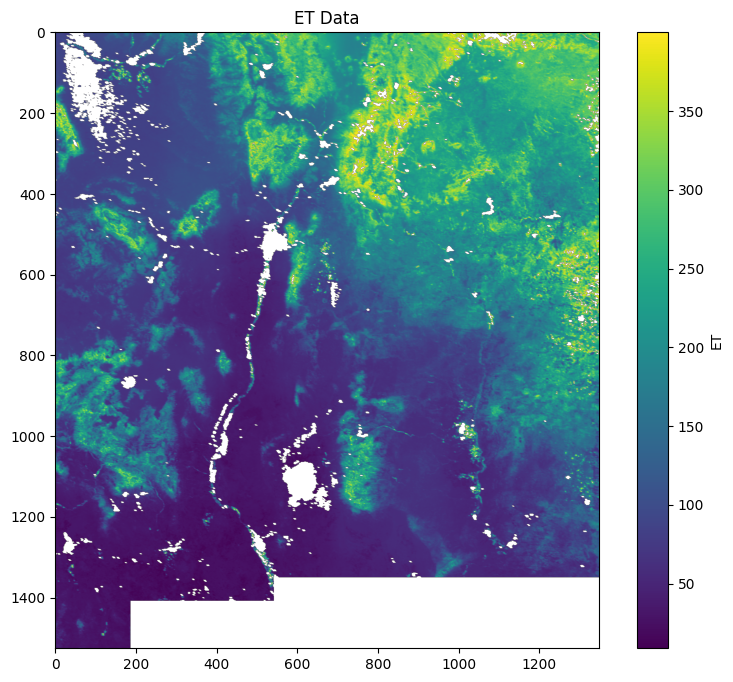

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(new_mexico)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

Choose a year and month (format YYYYMM) 202204
Choose an ET threshold (I would recommend a threshold between 50 and 150) 95


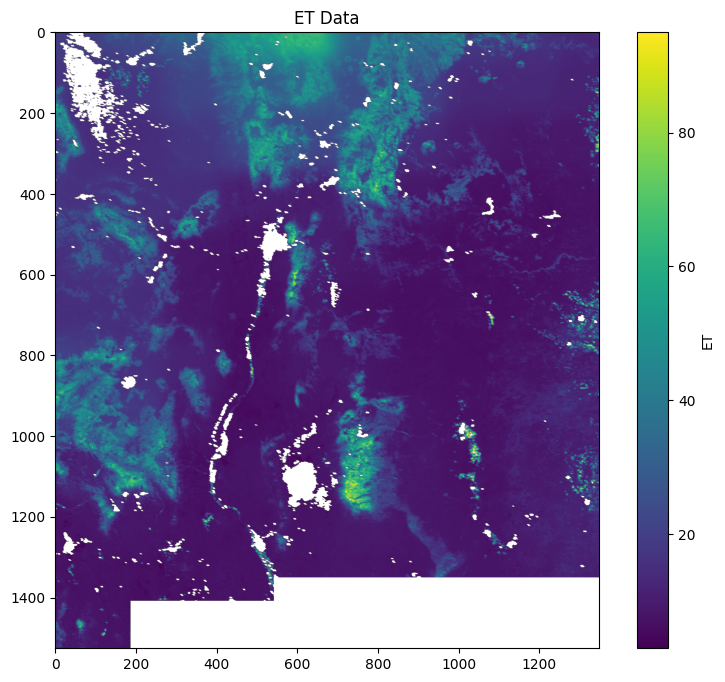

In [278]:
# monthly average
geometry = ''' {"type": "Polygon",
               "coordinates": [
                [[-109.05, 31.333],
                [-109.045, 36.999],
                [-103, 36.999],
                [-103, 32.002],
                [-106.618, 32.002],
                [-106.618, 31.781],
                [-108.210, 31.781],
                [-108.210, 31.333]]]}'''

cropping_geometries = [geojson.loads(geometry)]

xds = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif')
new_mexico = xds.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico = new_mexico[0, :, :]
new_mexico = new_mexico * 0.00000001

monthly_files = []

month = int(input("Choose a year and month (format YYYYMM)"))
str_month = str(month)

for filename in all_files:
    if str_month in filename and "_ET" in filename:
        monthly_files.append(filename)

monthly_files

for file in monthly_files:
    xds = rioxarray.open_rasterio('/Applications/MODIS_S3_downloads/' + file)
    new_mexico_2 = xds.rio.clip(geometries=cropping_geometries, crs=4326)
    new_mexico_2 = new_mexico_2[0, :, :]
    new_mexico += new_mexico_2

new_mexico /= len(monthly_files)
#print(new_mexico)

new_mexico = np.where(new_mexico >= 32700, np.nan, new_mexico)
threshold = int(input("Choose an ET threshold (I would recommend a threshold between 50 and 150)"))
new_mexico = np.where(new_mexico >= threshold, np.nan, new_mexico)

'''pet_files = []

for filename in all_files:
    if "202405" in filename and "PET" in filename:
        pet_files.append(filename)

pet_data = np.zeros((2725, 8496))

for file in pet_files:
    test_path = "/Applications/MODIS_S3_downloads/" + file
    with rasterio.open(test_path) as src:
        pet_data += src.read(1)
        pet_data = np.where(pet_data >= 32700, np.nan, pet_data)
        #print(data)

pet_data /= len(pet_files)
print(pet_data)'''

#each ET or PET file is an 8 day average
'''esi_data = data/pet_data
esi_data = np.where(esi_data >= 0.1, np.nan, esi_data)
print(esi_data)'''

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(new_mexico)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [279]:
#one file
geometry = ''' {"type": "Polygon",
               "coordinates": [
                [[-109.05, 31.333],
                [-109.045, 36.999],
                [-103, 36.999],
                [-103, 32.002],
                [-106.618, 32.002],
                [-106.618, 31.781],
                [-108.210, 31.781],
                [-108.210, 31.333]]]}'''

cropping_geometries = [geojson.loads(geometry)]

xds = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif')
new_mexico = xds.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico = new_mexico[0, :, :]
new_mexico = new_mexico * 0.00000001

'''month = int(input("Choose a year and month (format YYYYMM)"))
str_month = str(month)

for filename in all_files:
    if str_month in filename and "_ET" in filename:
        monthly_files.append(filename)

monthly_files'''


xds = rioxarray.open_rasterio('/Applications/MODIS_S3_downloads/MOD16A2_MERGED_20241210_ET.tif')
new_mexico_2 = xds.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico_2 = new_mexico_2[0, :, :]
new_mexico += new_mexico_2

pixels = 0

for i in range(1526):
    for j in range(1347):
        if new_mexico[i][j] < 30:
            pixels += 1

print(pixels)
            

#new_mexico /= len(monthly_files)
#print(new_mexico)

new_mexico = np.where(new_mexico >= 32700, np.nan, new_mexico)
threshold = int(input("Choose an ET threshold (I would recommend a threshold between 50 and 150)"))
new_mexico = np.where(new_mexico >= threshold, np.nan, new_mexico)

'''pet_files = []

for filename in all_files:
    if "202405" in filename and "PET" in filename:
        pet_files.append(filename)

pet_data = np.zeros((2725, 8496))

for file in pet_files:
    test_path = "/Applications/MODIS_S3_downloads/" + file
    with rasterio.open(test_path) as src:
        pet_data += src.read(1)
        pet_data = np.where(pet_data >= 32700, np.nan, pet_data)
        #print(data)

pet_data /= len(pet_files)
print(pet_data)'''

#each ET or PET file is an 8 day average
'''esi_data = data/pet_data
esi_data = np.where(esi_data >= 0.1, np.nan, esi_data)
print(esi_data)'''

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(new_mexico)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

KeyboardInterrupt: 

In [58]:
new_mexico = xds.rio.clip(geometries=cropping_geometries, crs=4326)

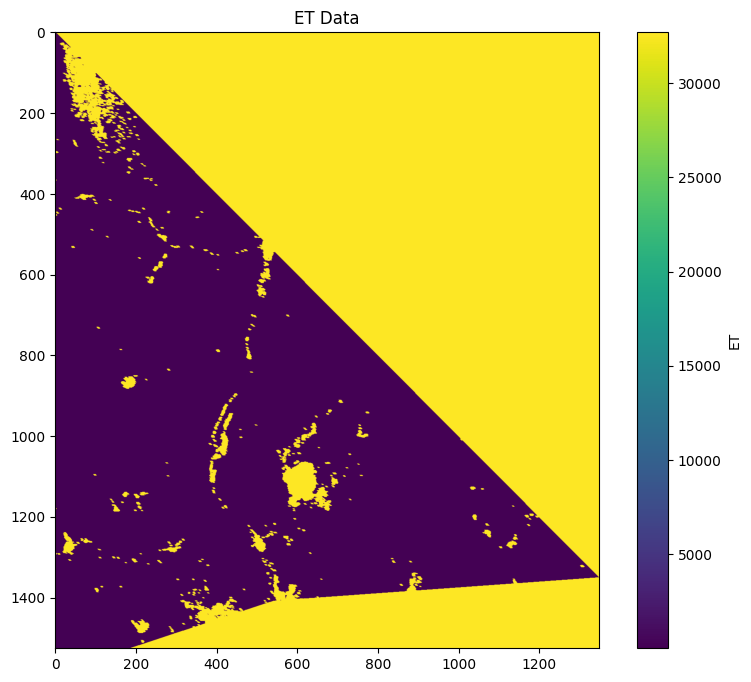

In [140]:
geometry = ''' {"type": "Polygon",
               "coordinates": [
                [ [-109.05, 31.333],
                [-109.045, 36.999],
                [-103, 32.002],
                [-106.618, 31.781],
                [-108.210, 31.333]]]}'''

cropping_geometries = [geojson.loads(geometry)]

#xds = rioxarray.open_rasterio('/Applications/MODIS_S3_downloads/nm_et_in_drought_dec10.tif')
xds = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif')
#dec10 = xds.rio.write_crs(4326, inplace=True)
dec10 = xds.rio.clip(geometries=cropping_geometries, crs=4326)
dec10 = dec10[0, :, :]

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(dec10)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

In [211]:
geometry = '''{"type": "Polygon",
                "coordinates": [ [ [ -109.046914, 34.016184 ], [ -109.046885, 34.016184 ], [ -109.046885, 34.021104 ], [ -109.046884, 34.021104 ], [ -109.046884, 34.021288 ], [ -109.046883, 34.021288 ], [ -109.046883, 34.021511 ], [ -109.046883, 34.021511 ], [ -109.046883, 34.021556 ], [ -109.046882, 34.021556 ], [ -109.046882, 34.021735 ], [ -109.046818, 34.021735 ], [ -109.046818, 34.041719 ], [ -109.046834, 34.041719 ], [ -109.046834, 34.044874 ], [ -109.046836, 34.044874 ], [ -109.046836, 34.045353 ], [ -109.046836, 34.045353 ], [ -109.046836, 34.045399 ], [ -109.046892, 34.045399 ], [ -109.046892, 34.05584 ],  [ -109.046892,  34.05584 ], [ -109.046892, 34.055903 ], [ -109.046906, 34.055903 ], [ -109.046906, 34.058498 ], [ -109.04696, 34.058498 ], [ -109.04696, 34.068968 ],  [ -109.046907, 34.068968 ], [ -109.046907, 34.07682 ],  [ -109.04691,  34.07682 ], [ -109.04691, 34.078497 ],  [ -109.046922, 34.078497 ], [ -109.046922, 34.084462 ], [ -109.046867, 34.084462 ], [ -109.046867, 34.087248 ], [ -109.046867, 34.087248 ], [ -109.046867, 34.0873 ], [ -109.046886, 34.0873 ], [ -109.046886, 34.0941 ], [ -109.046888, 34.0941 ], [ -109.046888, 34.096078 ], [ -109.046892, 34.096078 ], [ -109.046892, 34.099208 ], [ -109.046892, 34.099208 ], [ -109.046892, 34.099414 ], [ -109.046894, 34.099414 ], [ -109.046894, 34.100956 ], [ -109.046894, 34.100956 ], [ -109.046894, 34.10102 ],  [ -109.046907,  34.10102 ], [ -109.046907, 34.111336 ], [ -109.046907, 34.111336 ], [ -109.046907, 34.111379 ], [ -109.046873, 34.111379 ], [ -109.046873, 34.125048 ], [ -109.046836, 34.125048 ], [ -109.046836, 34.136041 ], [ -109.046836, 34.136041 ], [ -109.046836, 34.136127 ], [ -109.046827, 34.136127 ], [ -109.046827, 34.139808 ], [ -109.046826, 34.139808 ], [ -109.046826, 34.14035 ],  [ -109.046792,  34.14035 ], [ -109.046792, 34.151825 ], [ -109.046801, 34.151825 ], [ -109.046801, 34.160527 ], [ -109.046808, 34.160527 ], [ -109.046808, 34.162183 ], [ -109.046809, 34.162183 ], [ -109.046809, 34.162525 ], [ -109.04681, 34.162525 ], [ -109.04681, 34.162673 ],  [ -109.046794, 34.162673 ], [ -109.046794, 34.162989 ], [ -109.046794, 34.162989 ], [ -109.046794, 34.163026 ], [ -109.046783, 34.163026 ], [ -109.046783, 34.166941 ], [ -109.046765, 34.166941 ], [ -109.046765, 34.173793 ], [ -109.046765, 34.173793 ], [ -109.046765, 34.17382 ],  [ -109.046717,  34.17382 ], [ -109.046717, 34.180661 ], [ -109.046716, 34.180661 ], [ -109.046716, 34.180759 ], [ -109.046646, 34.180759 ], [ -109.046646, 34.191164 ], [ -109.046752, 34.191164 ], [ -109.046752, 34.2071 ], [ -109.046758, 34.2071 ], [ -109.046758, 34.207938 ], [ -109.046768, 34.207938 ], [ -109.046768, 34.209308 ], [ -109.04675, 34.209308 ], [ -109.04675, 34.212472 ],  [ -109.046664, 34.212472 ], [ -109.046664, 34.250046 ], [ -109.046623, 34.250046 ], [ -109.046623, 34.259464 ], [ -109.046606, 34.259464 ], [ -109.046606, 34.263342 ], [ -109.046528, 34.263342 ], [ -109.046528, 34.282972 ], [ -109.046538, 34.282972 ], [ -109.046538, 34.283179 ], [ -109.046537, 34.283179 ], [ -109.046537, 34.283639 ], [ -109.046527, 34.283639 ], [ -109.046527, 34.283844 ], [ -109.046528, 34.283844 ], [ -109.046528, 34.297645 ], [ -109.046528, 34.297645 ], [ -109.046528, 34.298189 ], [ -109.046522, 34.298189 ], [ -109.046522, 34.300215 ], [ -109.046522, 34.300215 ], [ -109.046522, 34.300241 ], [ -109.046518, 34.300241 ], [ -109.046518, 34.301513 ], [ -109.046502, 34.301513 ], [ -109.046502, 34.307189 ], [ -109.046472, 34.307189 ], [ -109.046472, 34.317584 ], [ -109.046469, 34.317584 ], [ -109.046469, 34.318954 ], [ -109.04648, 34.318954 ], [ -109.04648, 34.320498 ],  [ -109.046516, 34.320498 ], [ -109.046516, 34.325673 ], [ -109.046514, 34.325673 ], [ -109.046514, 34.330866 ], [ -109.046511, 34.330866 ], [ -109.046511, 34.336691 ], [ -109.04651, 34.336691 ], [ -109.04651, 34.338161 ],  [ -109.04651, 34.338161 ], [ -109.04651, 34.338205 ],  [ -109.04651, 34.338205 ], [ -109.04651, 34.35781 ], [ -109.04651,  34.35781 ], [ -109.04651, 34.357851 ],  [ -109.04651, 34.357851 ], [ -109.04651, 34.362116 ],  [ -109.04651, 34.362116 ], [ -109.04651, 34.367671 ],  [ -109.046511, 34.367671 ], [ -109.046511, 34.37241 ],  [ -109.046533,  34.37241 ], [ -109.046533, 34.373995 ], [ -109.046548, 34.373995 ], [ -109.046548, 34.375045 ], [ -109.046561, 34.375045 ], [ -109.046561, 34.379369 ], [ -109.046561, 34.379369 ], [ -109.046561, 34.379479 ], [ -109.046534, 34.379479 ], [ -109.046534, 34.386665 ], [ -109.046521, 34.386665 ], [ -109.046521, 34.387319 ], [ -109.046484, 34.387319 ], [ -109.046484, 34.389303 ], [ -109.046478, 34.389303 ], [ -109.046478, 34.389637 ], [ -109.046459, 34.389637 ], [ -109.046459, 34.390762 ], [ -109.046447, 34.390762 ], [ -109.046447, 34.393529 ], [ -109.04644,, 34.393529 ], [ -109.04644, 34.395403 ],  [ -109.04644,, 34.395403 ], [ -109.04644, 34.395447 ],  [ -109.046381, 34.395447 ], [ -109.046381, 34.4098 ], [ -109.046343, , 34.4098 ], [ -109.046343, 34.435647 ], [ -109.046327, 34.435647 ], [ -109.046327, 34.445575 ], [ -109.046309, 34.445575 ], [ -109.046309, 34.476611 ], [ -109.046305, 34.476611 ], [ -109.046305, 34.47752 ],  [ -109.046303,  34.47752 ], [ -109.046303, 34.478287 ], [ -109.046223, 34.478287 ], [ -109.046223, 34.500042 ], [ -109.046181, 34.500042 ], [ -109.046181, 34.517763 ], [ -109.046175, 34.517763 ], [ -109.046175, 34.520102 ], [ -109.046182, 34.520102 ], [ -109.046182, 34.522379 ], [ -109.046182, 34.522379 ], [ -109.046182, 34.522393 ], [ -109.046182, 34.522393 ], [ -109.046182, 34.522405 ], [ -109.046182, 34.522405 ], [ -109.046182, 34.522454 ], [ -109.046183, 34.522454 ], [ -109.046183, 34.522578 ], [ -109.046183, 34.522578 ], [ -109.046183, 34.52265 ],  [ -109.046211,  34.52265 ], [ -109.046211, 34.52701 ],  [ -109.04622,,  34.52701 ], [ -109.04622, 34.529482 ],  [ -109.046233, 34.529482 ], [ -109.046233, 34.532657 ], [ -109.046234, 34.532657 ], [ -109.046234, 34.533183 ], [ -109.046234, 34.533183 ], [ -109.046234, 34.533254 ], [ -109.046234, 34.533254 ], [ -109.046234, 34.53353 ],  [ -109.046236,  34.53353 ], [ -109.046236, 34.533935 ], [ -109.046241, 34.533935 ], [ -109.046241, 34.535555 ], [ -109.046205, 34.535555 ], [ -109.046205, 34.554297 ], [ -109.046198, 34.554297 ], [ -109.046198, 34.557539 ], [ -109.046174, 34.557539 ], [ -109.046174, 34.570284 ], [ -109.046168, 34.570284 ], [ -109.046168, 34.572995 ], [ -109.046164, 34.572995 ], [ -109.046164, 34.575116 ], [ -109.046164, 34.575116 ], [ -109.046164, 34.575397 ], [ -109.046122, 34.575397 ], [ -109.046122, 34.579291 ], [ -109.046113, 34.579291 ], [ -109.046113, 34.580488 ], [ -109.046111, 34.580488 ], [ -109.046111, 34.580829 ], [ -109.046112, 34.580829 ], [ -109.046112, 34.580981 ], [ -109.046102, 34.580981 ], [ -109.046102, 34.582476 ], [ -109.046097, 34.582476 ], [ -109.046097, 34.58321 ],  [ -109.046088,  34.58321 ], [ -109.046088, 34.584675 ], [ -109.046083, 34.584675 ], [ -109.046083, 34.585493 ], [ -109.046073, 34.585493 ], [ -109.046073, 34.586963 ], [ -109.046068, 34.586963 ], [ -109.046068, 34.587764 ], [ -109.046059, 34.587764 ], [ -109.046059, 34.58924 ],  [ -109.046053,  34.58924 ], [ -109.046053, 34.590088 ], [ -109.046044, 34.590088 ], [ -109.046044, 34.59148 ],  [ -109.046038,  34.59148 ], [ -109.046038, 34.5924 ], [ [ -109.046028, , 34.5924 ], [ -109.046028, 34.593926 ], [ -109.046027, 34.593926 ], [ -109.046027, 34.594713 ], [ -109.046025, 34.594713 ], [ -109.046025, 34.596205 ], [ -109.046024, 34.596205 ], [ -109.046024, 34.597036 ], [ -109.046022, 34.597036 ], [ -109.046022, 34.598512 ], [ -109.046021, 34.598512 ], [ -109.046021, 34.599351 ], [ -109.046019, 34.599351 ], [ -109.046019, 34.600673 ], [ -109.046017, 34.600673 ], [ -109.046017, 34.601677 ], [ -109.046019, 34.601677 ], [ -109.046019, 34.601991 ], [ -109.046013, 34.601991 ], [ -109.046013, 34.60224 ],  [ -109.046014,  34.60224 ], [ -109.046014, 34.602259 ], [ -109.046015, 34.602259 ], [ -109.046015, 34.603465 ], [ -109.046011, 34.603465 ], [ -109.046011, 34.604282 ], [ -109.046013, 34.604282 ], [ -109.046013, 34.604407 ], [ -109.046013, 34.604407 ], [ -109.046013, 34.604569 ], [ -109.046012, 34.604569 ], [ -109.046012, 34.604654 ], [ -109.046011, 34.604654 ], [ -109.046011, 34.605956 ], [ -109.045998, 34.605956 ], [ -109.045998, 34.60775 ],  [ -109.046008,  34.60775 ], [ -109.046008, 34.608295 ], [ -109.046007, 34.608295 ], [ -109.046007, 34.609064 ], [ -109.046006, 34.609064 ], [ -109.046006, 34.609254 ], [ -109.046005, 34.609254 ], [ -109.046005, 34.609335 ], [ -109.045995, 34.609335 ], [ -109.045995, 34.609885 ], [ -109.045997, 34.609885 ], [ -109.045997, 34.609922 ], [ -109.046005, 34.609922 ], [ -109.046005, 34.610077 ], [ -109.046006, 34.610077 ], [ -109.046006, 34.610175 ], [ -109.046006, 34.610175 ], [ -109.046006, 34.610675 ], [ -109.046006, 34.610675 ], [ -109.046006, 34.610841 ], [ -109.046007, 34.610841 ], [ -109.046007, 34.611104 ], [ -109.046007, 34.611104 ], [ -109.046007, 34.611302 ], [ -109.046007, 34.611302 ], [ -109.046007, 34.611563 ], [ -109.046008, 34.611563 ], [ -109.046008, 34.612572 ], [ -109.046008, 34.612572 ], [ -109.046008, 34.612717 ], [ -109.046014, 34.612717 ], [ -109.046014, 34.618015 ], [ -109.046018, 34.618015 ], [ -109.046018, 34.620867 ], [ -109.046019, 34.620867 ], [ -109.046019, 34.621739 ], [ -109.046032, 34.621739 ], [ -109.046032, 34.62504 ],  [ -109.046027,  34.62504 ], [ -109.046027, 34.626101 ], [ -109.046039, 34.626101 ], [ -109.046039, 34.629995 ], [ -109.046052, 34.629995 ], [ -109.046052, 34.632715 ], [ -109.046053, 34.632715 ], [ -109.046053, 34.633028 ], [ -109.046054, 34.633028 ], [ -109.046054, 34.633114 ], [ -109.046054, 34.633114 ], [ -109.046054, 34.633177 ], [ -109.046055, 34.633177 ], [ -109.046055, 34.633318 ], [ -109.046054, 34.633318 ], [ -109.046054, 34.634943 ], [ -109.046068, 34.634943 ], [ -109.046068, 34.639996 ], [ -109.046071, 34.639996 ], [ -109.046071, 34.643837 ], [ -109.046087, 34.643837 ], [ -109.046087, 34.645748 ], [ -109.046075, 34.645748 ], [ -109.046075, 34.647954 ], [ -109.046075, 34.647954 ], [ -109.046075, 34.648026 ], [ -109.046075, 34.648026 ], [ -109.046075, 34.64821 ],  [ -109.046076,  34.64821 ], [ -109.046076, 34.649415 ], [ -109.046076, 34.649415 ], [ -109.046076, 34.649458 ], [ -109.046077, 34.649458 ], [ -109.046077, 34.649967 ], [ -109.046077, 34.649967 ], [ -109.046077, 34.650274 ], [ -109.046078, 34.650274 ], [ -109.046078, 34.651464 ], [ -109.046078, 34.651464 ], [ -109.046078, 34.651477 ], [ -109.046079, 34.651477 ], [ -109.046079, 34.651862 ], [ -109.04608,, 34.651862 ], [ -109.04608, 34.653469 ],  [ -109.046086, 34.653469 ], [ -109.046086, 34.653646 ], [ -109.04608,, 34.653646 ], [ -109.04608, 34.654068 ],  [ -109.046071, 34.654068 ], [ -109.046071, 34.655686 ], [ -109.04608,, 34.655686 ], [ -109.04608, 34.65631 ], [ [ -109.046085,  34.65631 ], [ -109.046085, 34.657564 ], [ -109.046059, 34.657564 ], [ -109.046059, 34.666347 ], [ -109.046044, 34.666347 ], [ -109.046044, 34.672455 ], [ -109.04604,, 34.672455 ], [ -109.04604, 34.672726 ],  [ -109.046037, 34.672726 ], [ -109.046037, 34.673062 ], [ -109.046034, 34.673062 ], [ -109.046034, 34.673406 ], [ -109.046031, 34.673406 ], [ -109.046031, 34.673775 ], [ -109.046028, 34.673775 ], [ -109.046028, 34.674143 ], [ -109.046025, 34.674143 ], [ -109.046025, 34.674514 ], [ -109.046022, 34.674514 ], [ -109.046022, 34.674872 ], [ -109.046019, 34.674872 ], [ -109.046019, 34.675245 ], [ -109.046016, 34.675245 ], [ -109.046016, 34.675608 ], [ -109.046012, 34.675608 ], [ -109.046012, 34.67597 ],  [ -109.046009,  34.67597 ], [ -109.046009, 34.676349 ], [ -109.046006, 34.676349 ], [ -109.046006, 34.676694 ], [ -109.046003, 34.676694 ], [ -109.046003, 34.677092 ], [ -109.046, 34.677092 ], [ -109.046, 34.677395 ], [ -109.045997, 34.677395 ], [ -109.045997, 34.677827 ], [ -109.045994, 34.677827 ], [ -109.045994, 34.678147 ], [ -109.04599, 34.678147 ], [ -109.04599, 34.678575 ],  [ -109.045988, 34.678575 ], [ -109.045988, 34.678892 ], [ -109.045984, 34.678892 ], [ -109.045984, 34.679311 ], [ -109.045981, 34.679311 ], [ -109.045981, 34.679622 ], [ -109.045979, 34.679622 ], [ -109.045979, 34.679939 ], [ -109.045978, 34.679939 ], [ -109.045978, 34.680048 ], [ -109.045975, 34.680048 ], [ -109.045975, 34.680352 ], [ -109.045974, 34.680352 ], [ -109.045974, 34.680479 ], [ -109.045971, 34.680479 ], [ -109.045971, 34.680772 ], [ -109.04597, 34.680772 ], [ -109.04597, 34.680909 ],  [ -109.045968, 34.680909 ], [ -109.045968, 34.681202 ], [ -109.045967, 34.681202 ], [ -109.045967, 34.681333 ], [ -109.045964, 34.681333 ], [ -109.045964, 34.681614 ], [ -109.04596, 34.681614 ], [ -109.04596, 34.682044 ],  [ -109.045961, 34.682044 ], [ -109.045961, 34.68206 ],  [ -109.045957,  34.68206 ], [ -109.045957, 34.682435 ], [ -109.045959, 34.682435 ], [ -109.045959, 34.683094 ], [ -109.045962, 34.683094 ], [ -109.045962, 34.683909 ], [ -109.045965, 34.683909 ], [ -109.045965, 34.684737 ], [ -109.045968, 34.684737 ], [ -109.045968, 34.685534 ], [ -109.045971, 34.685534 ], [ -109.045971, 34.686389 ], [ -109.045972, 34.686389 ], [ -109.045972, 34.686739 ], [ -109.045977, 34.686739 ], [ -109.045977, 34.688063 ], [ -109.045978, 34.688063 ], [ -109.045978, 34.688389 ], [ -109.045982, 34.688389 ], [ -109.045982, 34.689662 ], [ -109.045984, 34.689662 ], [ -109.045984, 34.690095 ], [ -109.045988, 34.690095 ], [ -109.045988, 34.691259 ], [ -109.04599,, 34.691259 ], [ -109.04599, 34.691781 ],  [ -109.045993, 34.691781 ], [ -109.045993, 34.692851 ], [ -109.045997, 34.692851 ], [ -109.045997, 34.693793 ], [ -109.046001, 34.693793 ], [ -109.046001, 34.6949 ], [ [ -109.046004, , 34.6949 ], [ -109.046004, 34.695896 ], [ -109.046006, 34.695896 ], [ -109.046006, 34.696485 ], [ -109.046008, 34.696485 ], [ -109.046008, 34.696905 ], [ -109.046011, 34.696905 ], [ -109.046011, 34.697791 ], [ -109.046012, 34.697791 ], [ -109.046012, 34.697866 ], [ -109.046012, 34.697866 ], [ -109.046012, 34.697991 ], [ -109.046012, 34.697991 ], [ -109.046012, 34.698083 ], [ -109.046013, 34.698083 ], [ -109.046013, 34.69819 ],  [ -109.046017,  34.69819 ], [ -109.046017, 34.699102 ], [ -109.046017, 34.699102 ], [ -109.046017, 34.699247 ], [ -109.046019, 34.699247 ], [ -109.046019, 34.699468 ], [ -109.046019, 34.699468 ], [ -109.046019, 34.699504 ], [ -109.046019, 34.699504 ], [ -109.046019, 34.699589 ], [ -109.046019, 34.699589 ], [ -109.046019, 34.69963 ],  [ -109.04602,  34.69963 ], [ -109.04602, 34.699705 ],  [ -109.04602, 34.699705 ], [ -109.04602, 34.699744 ],  [ -109.046021, 34.699744 ], [ -109.046021, 34.699822 ], [ -109.046022, 34.699822 ], [ -109.046022, 34.699873 ], [ -109.046026, 34.699873 ], [ -109.046026, 34.700093 ], [ -109.046027, 34.700093 ], [ -109.046027, 34.701908 ], [ -109.046031, 34.701908 ], [ -109.046031, 34.709448 ], [ -109.046032, 34.709448 ], [ -109.046032, 34.709728 ], [ -109.046032, 34.709728 ], [ -109.046032, 34.71077 ],  [ -109.046034,  34.71077 ], [ -109.046034, 34.71106 ],  [ -109.046033,  34.71106 ], [ -109.046033, 34.711236 ], [ -109.046034, 34.711236 ], [ -109.046034, 34.71258 ],  [ -109.046035,  34.71258 ], [ -109.046035, 34.712639 ], [ -109.046047, 34.712639 ], [ -109.046047, 34.71552 ],  [ -109.04605,  34.71552 ], [ -109.04605, 34.716181 ],  [ -109.04605, 34.716181 ], [ -109.04605, 34.716864 ],  [ -109.046053, 34.716864 ], [ -109.046053, 34.717967 ], [ -109.046057, 34.717967 ], [ -109.046057, 34.720113 ], [ -109.046075, 34.720113 ], [ -109.046075, 34.730033 ], [ -109.046076, 34.730033 ], [ -109.046076, 34.730423 ], [ -109.046071, 34.730423 ], [ -109.046071, 34.730869 ], [ -109.04607,, 34.730869 ], [ -109.04607, 34.730941 ],  [ -109.046069, 34.730941 ], [ -109.046069, 34.731273 ], [ -109.046069, 34.731273 ], [ -109.046069, 34.7317 ], [ -109.046068, 34.7317 ], [ -109.046068, 34.732072 ], [ -109.046068, 34.732072 ], [ -109.046068, 34.732314 ], [ -109.046067, 34.732314 ], [ -109.046067, 34.732978 ], [ -109.046067, 34.732978 ], [ -109.046067, 34.7333 ], [ [ -109.046067, 34.7333 ], [ -109.046067, 34.733511 ], [ -109.046066, 34.733511 ], [ -109.046066, 34.733922 ], [ -109.046066, 34.733922 ], [ -109.046066, 34.73437 ],  [ -109.046065,  34.73437 ], [ -109.046065, 34.734817 ], [ -109.046065, 34.734817 ], [ -109.046065, 34.735306 ], [ -109.046064, 34.735306 ], [ -109.046064, 34.735768 ], [ -109.046063, 34.735768 ], [ -109.046063, 34.736271 ], [ -109.046063, 34.736271 ], [ -109.046063, 34.736785 ], [ -109.046062, 34.736785 ], [ -109.046062, 34.737325 ], [ -109.046062, 34.737325 ], [ -109.046062, 34.737817 ], [ -109.046061, 34.737817 ], [ -109.046061, 34.738336 ], [ -109.04606,, 34.738336 ], [ -109.04606, 34.738853 ],  [ -109.046059, 34.738853 ], [ -109.046059, 34.740008 ], [ -109.046053, 34.740008 ], [ -109.046053, 34.740912 ], [ -109.046045, 34.740912 ], [ -109.046045, 34.742074 ], [ -109.046039, 34.742074 ], [ -109.046039, 34.74301 ],  [ -109.04603,,  34.74301 ], [ -109.04603, 34.744272 ],  [ -109.046024, 34.744272 ], [ -109.046024, 34.745044 ], [ -109.046019, 34.745044 ], [ -109.046019, 34.745751 ], [ -109.046016, 34.745751 ], [ -109.046016, 34.746291 ], [ -109.046008, 34.746291 ], [ -109.046008, 34.747409 ], [ -109.046003, 34.747409 ], [ -109.046003, 34.748121 ], [ -109.045998, 34.748121 ], [ -109.045998, 34.748876 ], [ -109.04599,, 34.748876 ], [ -109.04599, 34.750041 ],  [ -109.04598, 34.750041 ], [ -109.04598, 34.751348 ],  [ -109.04598, 34.751348 ], [ -109.04598, 34.751368 ],  [ -109.046114, 34.751368 ], [ -109.046114, 34.751503 ], [ -109.046113, 34.751503 ], [ -109.046113, 34.751655 ], [ -109.046114, 34.751655 ], [ -109.046114, 34.752238 ], [ -109.046114, 34.752238 ], [ -109.046114, 34.752381 ], [ -109.046108, 34.752381 ], [ -109.046108, 34.754751 ], [ -109.046107, 34.754751 ], [ -109.046107, 34.754864 ], [ -109.046105, 34.754864 ], [ -109.046105, 34.756999 ], [ -109.046104, 34.756999 ], [ -109.046104, 34.757086 ], [ -109.046095, 34.757086 ], [ -109.046095, 34.764224 ], [ -109.046092, 34.764224 ], [ -109.046092, 34.764525 ], [ -109.046089, 34.764525 ], [ -109.046089, 34.768838 ], [ -109.046087, 34.768838 ], [ -109.046087, 34.770963 ], [ -109.046086, 34.770963 ], [ -109.046086, 34.771016 ], [ -109.045961, 34.771016 ], [ -109.045961, 34.773489 ], [ -109.045712, 34.773489 ], [ -109.045712, 34.778458 ], [ -109.045474, 34.778458 ], [ -109.045474, 34.783215 ], [ -109.045446, 34.783215 ], [ -109.045446, 34.783764 ], [ -109.045446, 34.783764 ], [ -109.045446, 34.783779 ], [ -109.045363, 34.783779 ], [ -109.045363, 34.785406 ], [ -109.045503, 34.785406 ], [ -109.045503, 34.788196 ], [ -109.045621, 34.788196 ], [ -109.045621, 34.790578 ], [ -109.045694, 34.790578 ], [ -109.045694, 34.792033 ], [ -109.04588,, 34.792033 ], [ -109.04588, 34.79562 ], [ [ -109.045872,  34.79562 ], [ -109.045872, 34.795631 ], [ -109.046104, 34.795631 ], [ -109.046104, 34.799981 ], [ -109.045626, 34.799981 ], [ -109.045626, 34.814226 ], [ -109.045673, 34.814226 ], [ -109.045673, 34.815677 ], [ -109.0457, , 34.815677 ], [ -109.0457, 34.81658 ], [  [ -109.045737,  34.81658 ], [ -109.045737, 34.818361 ], [ -109.046044, 34.818361 ], [ -109.046044, 34.827708 ], [ -109.046072, 34.827708 ], [ -109.046072, 34.828566 ], [ -109.046063, 34.828566 ], [ -109.046063, 34.839751 ], [ -109.04606,, 34.839751 ], [ -109.04606, 34.842099 ],  [ -109.046061, 34.842099 ], [ -109.046061, 34.8422 ], [ -109.046058, , 34.8422 ], [ -109.046058, 34.845998 ], [ -109.046069, 34.845998 ], [ -109.046069, 34.846537 ], [ -109.046069, 34.846537 ], [ -109.046069, 34.846672 ], [ -109.046071, 34.846672 ], [ -109.046071, 34.846805 ], [ -109.04607,, 34.846805 ], [ -109.04607, 34.855945 ],  [ -109.04607,, 34.855945 ], [ -109.04607, 34.856019 ],  [ -109.046069, 34.856019 ], [ -109.046069, 34.857895 ], [ -109.046066, 34.857895 ], [ -109.046066, 34.867126 ], [ -109.046066, 34.867126 ], [ -109.046066, 34.867295 ], [ -109.046064, 34.867295 ], [ -109.046064, 34.870578 ], [ -109.046067, 34.870578 ], [ -109.046067, 34.870733 ], [ -109.046067, 34.870733 ], [ -109.046067, 34.870834 ], [ -109.046071, 34.870834 ], [ -109.046071, 34.871054 ], [ -109.04611,, 34.871054 ], [ -109.04611, 34.873498 ],  [ -109.046136, 34.873498 ], [ -109.046136, 34.875006 ], [ -109.04613,, 34.875006 ], [ -109.04613, 34.876073 ],  [ -109.045999, 34.876073 ], [ -109.045999, 34.87625 ],  [ -109.04602,,  34.87625 ], [ -109.04602, 34.888264 ],  [ -109.04602,, 34.888264 ], [ -109.04602, 34.888282 ],  [ -109.046033, 34.888282 ], [ -109.046033, 34.896202 ], [ -109.046032, 34.896202 ], [ -109.046032, 34.896478 ], [ -109.046015, 34.896478 ], [ -109.046015, 34.902464 ], [ -109.046006, 34.902464 ], [ -109.046006, 34.904161 ], [ -109.046005, 34.904161 ], [ -109.046005, 34.905686 ], [ -109.045988, 34.905686 ], [ -109.045988, 34.910548 ], [ -109.045989, 34.910548 ], [ -109.045989, 34.910698 ], [ -109.045989, 34.910698 ], [ -109.045989, 34.910836 ], [ -109.045989, 34.910836 ], [ -109.045989, 34.910972 ], [ -109.045989, 34.910972 ], [ -109.045989, 34.911126 ], [ -109.045989, 34.911126 ], [ -109.045989, 34.91126 ],  [ -109.045989,  34.91126 ], [ -109.045989, 34.911348 ], [ -109.045989, 34.911348 ], [ -109.045989, 34.911479 ], [ -109.045989, 34.911479 ], [ -109.045989, 34.911556 ], [ -109.045989, 34.911556 ], [ -109.045989, 34.911842 ], [ -109.04599,, 34.911842 ], [ -109.04599, 34.912664 ],  [ -109.04599,, 34.912664 ], [ -109.04599, 34.912886 ],  [ -109.04599,, 34.912886 ], [ -109.04599, 34.913766 ],  [ -109.045991, 34.913766 ], [ -109.045991, 34.913876 ], [ -109.04599,, 34.913876 ], [ -109.04599, 34.914372 ],  [ -109.045991, 34.914372 ], [ -109.045991, 34.914986 ], [ -109.045991, 34.914986 ], [ -109.045991, 34.915338 ], [ -109.045991, 34.915338 ], [ -109.045991, 34.915802 ], [ -109.045991, 34.915802 ], [ -109.045991, 34.915976 ], [ -109.045991, 34.915976 ], [ -109.045991, 34.91601 ],  [ -109.045991,  34.91601 ], [ -109.045991, 34.91624 ],  [ -109.045991,  34.91624 ], [ -109.045991, 34.916948 ], [ -109.04599,, 34.916948 ], [ -109.04599, 34.917018 ],  [ -109.045991, 34.917018 ], [ -109.045991, 34.917301 ], [ -109.045991, 34.917301 ], [ -109.045991, 34.918758 ], [ -109.045991, 34.918758 ], [ -109.045991, 34.919647 ], [ -109.045991, 34.919647 ], [ -109.045991, 34.920668 ], [ -109.045991, 34.920668 ], [ -109.045991, 34.922085 ], [ -109.045991, 34.922085 ], [ -109.045991, 34.923031 ], [ -109.045987, 34.923031 ], [ -109.045987, 34.92421 ],  [ -109.045991,  34.92421 ], [ -109.045991, 34.925177 ], [ -109.045991, 34.925177 ], [ -109.045991, 34.926877 ], [ -109.04599,, 34.926877 ], [ -109.04599, 34.928684 ],  [ -109.045991, 34.928684 ], [ -109.045991, 34.93246 ],  [ -109.04599,,  34.93246 ], [ -109.04599, 34.936449 ],  [ -109.045991, 34.936449 ], [ -109.045991, 34.93716 ],  [ -109.045989,  34.93716 ], [ -109.045989, 34.939555 ], [ -109.045991, 34.939555 ], [ -109.045991, 34.942939 ], [ -109.045988, 34.942939 ], [ -109.045988, 34.945078 ], [ -109.045991, 34.945078 ], [ -109.045991, 34.945578 ], [ -109.045996, 34.945578 ], [ -109.045996, 34.947922 ], [ -109.045985, 34.947922 ], [ -109.045985, 34.94922 ],  [ -109.045993,  34.94922 ], [ -109.045993, 34.949551 ], [ -109.045994, 34.949551 ], [ -109.045994, 34.954481 ], [ -109.045994, 34.954481 ], [ -109.045994, 34.954645 ], [ -109.045994, 34.954645 ], [ -109.045994, 34.955361 ], [ -109.045995, 34.955361 ], [ -109.045995, 34.955814 ], [ -109.045996, 34.955814 ], [ -109.045996, 34.959708 ], [ -109.045996, 34.959708 ], [ -109.045996, 34.959727 ], [ -109.045996, 34.959727 ], [ -109.045996, 34.959819 ], [ -109.045996, 34.959819 ], [ -109.045996, 34.959969 ], [ -109.045998, 34.959969 ], [ -109.045998, 34.966032 ], [ -109.045998, 34.966032 ], [ -109.045998, 34.966186 ], [ -109.045999, 34.966186 ], [ -109.045999, 34.970485 ], [ -109.046, 3, 34.970485 ], [ -109.046, 34.975633 ], [  [ -109.045999, 34.975633 ], [ -109.045999, 34.987285 ], [ -109.046, 3, 34.987285 ], [ -109.046, 34.990601 ], [  [ -109.046, 3, 34.990601 ], [ -109.046, 34.992367 ], [  [ -109.045999, 34.992367 ], [ -109.045999, 34.993873 ], [ -109.045999, 34.993873 ], [ -109.045999, 34.99394 ],  [ -109.045996,  34.99394 ], [ -109.045996, 35.019172 ], [ -109.045997, 35.019172 ], [ -109.045997, 35.020031 ], [ -109.046024, 35.020031 ], [ -109.046024, 35.05195 ],  [ -109.046016,  35.05195 ], [ -109.046016, 35.056581 ], [ -109.045958, 35.056581 ], [ -109.045958, 35.073822 ], [ -109.045974, 35.073822 ], [ -109.045974, 35.121841 ], [ -109.045974, 35.121841 ], [ -109.045974, 35.140464 ], [ -109.045979, 35.140464 ], [ -109.045979, 35.150442 ], [ -109.045977, 35.150442 ], [ -109.045977, 35.150628 ], [ -109.046001, 35.150628 ], [ -109.046001, 35.166891 ], [ -109.046007, 35.166891 ], [ -109.046007, 35.174613 ], [ -109.046009, 35.174613 ], [ -109.046009, 35.175508 ], [ -109.046009, 35.175508 ], [ -109.046009, 35.175611 ], [ -109.046013, 35.175611 ], [ -109.046013, 35.177107 ], [ -109.046016, 35.177107 ], [ -109.046016, 35.178209 ], [ -109.046017, 35.178209 ], [ -109.046017, 35.178773 ], [ -109.046016, 35.178773 ], [ -109.046016, 35.181176 ], [ -109.04601,, 35.181176 ], [ -109.04601, 35.18144 ], [ [ -109.046018,  35.18144 ], [ -109.046018, 35.183133 ], [ -109.046024, 35.183133 ], [ -109.046024, 35.190102 ], [ -109.045948, 35.190102 ], [ -109.045948, 35.206399 ], [ -109.045972, 35.206399 ], [ -109.045972, 35.214327 ], [ -109.046, 3, 35.214327 ], [ -109.046, 35.219611 ], [  [ -109.046006, 35.219611 ], [ -109.046006, 35.220989 ], [ -109.046003, 35.220989 ], [ -109.046003, 35.221277 ], [ -109.046027, 35.221277 ], [ -109.046027, 35.227293 ], [ -109.046058, 35.227293 ], [ -109.046058, 35.234622 ], [ -109.04609,, 35.234622 ], [ -109.04609, 35.241654 ],  [ -109.046089, 35.241654 ], [ -109.046089, 35.241689 ], [ -109.046089, 35.241689 ], [ -109.046089, 35.241708 ], [ -109.046089, 35.241708 ], [ -109.046089, 35.242744 ], [ -109.046112, 35.242744 ], [ -109.046112, 35.247419 ], [ -109.046097, 35.247419 ], [ -109.046097, 35.248854 ], [ -109.046084, 35.248854 ], [ -109.046084, 35.249986 ], [ -109.046095, 35.249986 ], [ -109.046095, 35.251797 ], [ -109.046095, 35.251797 ], [ -109.046095, 35.251861 ], [ -109.046095, 35.251861 ], [ -109.046095, 35.251925 ], [ -109.046123, 35.251925 ], [ -109.046123, 35.256192 ], [ -109.046124, 35.256192 ], [ -109.046124, 35.257806 ], [ -109.046128, 35.257806 ], [ -109.046128, 35.261417 ], [ -109.046128, 35.261417 ], [ -109.046128, 35.261631 ], [ -109.046129, 35.261631 ], [ -109.046129, 35.262373 ], [ -109.04613,, 35.262373 ], [ -109.04613, 35.263552 ],  [ -109.046139, 35.263552 ], [ -109.046139, 35.270747 ], [ -109.046141, 35.270747 ], [ -109.046141, 35.273427 ], [ -109.046146, 35.273427 ], [ -109.046146, 35.277412 ], [ -109.046223, 35.277412 ], [ -109.046223, 35.28241 ],  [ -109.046325,  35.28241 ], [ -109.046325, 35.288818 ], [ -109.046347, 35.288818 ], [ -109.046347, 35.292339 ], [ -109.046387, 35.292339 ], [ -109.046387, 35.298814 ], [ -109.04641,, 35.298814 ], [ -109.04641, 35.302176 ],  [ -109.046438, 35.302176 ], [ -109.046438, 35.306973 ], [ -109.04644,, 35.306973 ], [ -109.04644, 35.30729 ], [ [ -109.046487,  35.30729 ], [ -109.046487, 35.314789 ], [ -109.046488, 35.314789 ], [ -109.046488, 35.314911 ], [ -109.04649,, 35.314911 ], [ -109.04649, 35.315134 ],  [ -109.046491, 35.315134 ], [ -109.046491, 35.315304 ], [ -109.046503, 35.315304 ], [ -109.046503, 35.317093 ], [ -109.046506, 35.317093 ], [ -109.046506, 35.317597 ], [ -109.046565, 35.317597 ], [ -109.046565, 35.326997 ], [ -109.046587, 35.326997 ], [ -109.046587, 35.330478 ], [ -109.046621, 35.330478 ], [ -109.046621, 35.335953 ], [ -109.046623, 35.335953 ], [ -109.046623, 35.336347 ], [ -109.046663, 35.336347 ], [ -109.046663, 35.342652 ], [ -109.046717, 35.342652 ], [ -109.046717, 35.351206 ], [ -109.046717, 35.351206 ], [ -109.046717, 35.351271 ], [ -109.046731, 35.351271 ], [ -109.046731, 35.353428 ], [ -109.046731, 35.353428 ], [ -109.046731, 35.353442 ], [ -109.046735, 35.353442 ], [ -109.046735, 35.355245 ], [ -109.046743, 35.355245 ], [ -109.046743, 35.355433 ], [ -109.046773, 35.355433 ], [ -109.046773, 35.360089 ], [ -109.046778, 35.360089 ], [ -109.046778, 35.360943 ], [ -109.046782, 35.360943 ], [ -109.046782, 35.361447 ], [ -109.046783, 35.361447 ], [ -109.046783, 35.361626 ], [ -109.046784, 35.361626 ], [ -109.046784, 35.361796 ], [ -109.046788, 35.361796 ], [ -109.046788, 35.36244 ],  [ -109.046789,  35.36244 ], [ -109.046789, 35.362579 ], [ -109.04679,, 35.362579 ], [ -109.04679, 35.362681 ],  [ -109.04679,, 35.362681 ], [ -109.04679, 35.362751 ],  [ -109.046791, 35.362751 ], [ -109.046791, 35.362986 ], [ -109.046792, 35.362986 ], [ -109.046792, 35.363128 ], [ -109.046793, 35.363128 ], [ -109.046793, 35.36322 ],  [ -109.046794,  35.36322 ], [ -109.046794, 35.363322 ], [ -109.046794, 35.363322 ], [ -109.046794, 35.363474 ], [ -109.046794, 35.363474 ], [ -109.046794, 35.363607 ], [ -109.046794, 35.363607 ], [ -109.046794, 35.363668 ], [ -109.046794, 35.363668 ], [ -109.046794, 35.36371 ],  [ -109.046794,  35.36371 ], [ -109.046794, 35.363758 ], [ -109.046793, 35.363758 ], [ -109.046793, 35.36673 ],  [ -109.046809,  35.36673 ], [ -109.046809, 35.369509 ], [ -109.046868, 35.369509 ], [ -109.046868, 35.379535 ], [ -109.046867, 35.379535 ], [ -109.046867, 35.379786 ], [ -109.046891, 35.379786 ], [ -109.046891, 35.383189 ], [ -109.046935, 35.383189 ], [ -109.046935, 35.390469 ], [ -109.046954, 35.390469 ], [ -109.046954, 35.393396 ], [ -109.046954, 35.393396 ], [ -109.046954, 35.393407 ], [ -109.046954, 35.393407 ], [ -109.046954, 35.393427 ], [ -109.046946, 35.393427 ], [ -109.046946, 35.398005 ], [ -109.046946, 35.398005 ], [ -109.046946, 35.398018 ], [ -109.046946, 35.398018 ], [ -109.046946, 35.398041 ], [ -109.046947, 35.398041 ], [ -109.046947, 35.398196 ], [ -109.046937, 35.398196 ], [ -109.046937, 35.399514 ], [ -109.046925, 35.399514 ], [ -109.046925, 35.402835 ], [ -109.046925, 35.402835 ], [ -109.046925, 35.403155 ], [ -109.046924, 35.403155 ], [ -109.046924, 35.403461 ], [ -109.04691,, 35.403461 ], [ -109.04691, 35.406751 ],  [ -109.04691,, 35.406751 ], [ -109.04691, 35.406773 ],  [ -109.046905, 35.406773 ], [ -109.046905, 35.408027 ], [ -109.046889, 35.408027 ], [ -109.046889, 35.410708 ], [ -109.046857, 35.410708 ], [ -109.046857, 35.419142 ], [ -109.046833, 35.419142 ], [ -109.046833, 35.423337 ], [ -109.046834, 35.423337 ], [ -109.046834, 35.423656 ], [ -109.046811, 35.423656 ], [ -109.046811, 35.428677 ], [ -109.046798, 35.428677 ], [ -109.046798, 35.431761 ], [ -109.04677,, 35.431761 ], [ -109.04677, 35.437464 ],  [ -109.046766, 35.437464 ], [ -109.046766, 35.438669 ], [ -109.046765, 35.438669 ], [ -109.046765, 35.438781 ], [ -109.046727, 35.438781 ], [ -109.046727, 35.448493 ], [ -109.046727, 35.448493 ], [ -109.046727, 35.448506 ], [ -109.046718, 35.448506 ], [ -109.046718, 35.450768 ], [ -109.046711, 35.450768 ], [ -109.046711, 35.458507 ], [ -109.046709, 35.458507 ], [ -109.046709, 35.458584 ], [ -109.046707, 35.458584 ], [ -109.046707, 35.462672 ], [ -109.046706, 35.462672 ], [ -109.046706, 35.465739 ], [ -109.046677, 35.465739 ], [ -109.046677, 35.471749 ], [ -109.046677, 35.471749 ], [ -109.046677, 35.471862 ], [ -109.046638, 35.471862 ], [ -109.046638, 35.47951 ],  [ -109.046633,  35.47951 ], [ -109.046633, 35.480911 ], [ -109.046603, 35.480911 ], [ -109.046603, 35.486231 ], [ -109.046599, 35.486231 ], [ -109.046599, 35.486881 ], [ -109.04658,, 35.486881 ], [ -109.04658, 35.490628 ],  [ -109.046561, 35.490628 ], [ -109.046561, 35.494143 ], [ -109.046557, 35.494143 ], [ -109.046557, 35.495034 ], [ -109.04655,, 35.495034 ], [ -109.04655, 35.497467 ],  [ -109.046548, 35.497467 ], [ -109.046548, 35.498216 ], [ -109.046547, 35.498216 ], [ -109.046547, 35.498944 ], [ -109.046545, 35.498944 ], [ -109.046545, 35.499773 ], [ -109.046543, 35.499773 ], [ -109.046543, 35.500698 ], [ -109.04654,, 35.500698 ], [ -109.04654, 35.501851 ],  [ -109.046539, 35.501851 ], [ -109.046539, 35.502391 ], [ -109.046538, 35.502391 ], [ -109.046538, 35.50291 ],  [ -109.046538,  35.50291 ], [ -109.046538, 35.502925 ], [ -109.046538, 35.502925 ], [ -109.046538, 35.502977 ], [ -109.046537, 35.502977 ], [ -109.046537, 35.503107 ], [ -109.046537, 35.503107 ], [ -109.046537, 35.503241 ], [ -109.046537, 35.503241 ], [ -109.046537, 35.503329 ], [ -109.046537, 35.503329 ], [ -109.046537, 35.503418 ], [ -109.046536, 35.503418 ], [ -109.046536, 35.503461 ], [ -109.046536, 35.503461 ], [ -109.046536, 35.503504 ], [ -109.046535, 35.503504 ], [ -109.046535, 35.505215 ], [ -109.046533, 35.505215 ], [ -109.046533, 35.508407 ], [ -109.046532, 35.508407 ], [ -109.046532, 35.510554 ], [ -109.046529, 35.510554 ], [ -109.046529, 35.514907 ], [ -109.046524, 35.514907 ], [ -109.046524, 35.522485 ], [ -109.046523, 35.522485 ], [ -109.046523, 35.523433 ], [ -109.046499, 35.523433 ], [ -109.046499, 35.536369 ], [ -109.04649,, 35.536369 ], [ -109.04649, 35.541335 ],  [ -109.046482, 35.541335 ], [ -109.046482, 35.546199 ], [ -109.046481, 35.546199 ], [ -109.046481, 35.546326 ], [ -109.046509, 35.546326 ], [ -109.046509, 35.54644 ],  [ -109.04648,,  35.54644 ], [ -109.04648, 35.551126 ],  [ -109.046471, 35.551126 ], [ -109.046471, 35.552574 ], [ -109.04647,, 35.552574 ], [ -109.04647, 35.55274 ], [ [ -109.046468,  35.55274 ], [ -109.046468, 35.552993 ], [ -109.046452, 35.552993 ], [ -109.046452, 35.555719 ], [ -109.046434, 35.555719 ], [ -109.046434, 35.558615 ], [ -109.046434, 35.558615 ], [ -109.046434, 35.558665 ], [ -109.046431, 35.558665 ], [ -109.046431, 35.559925 ], [ -109.046427, 35.559925 ], [ -109.046427, 35.56176 ],  [ -109.046414,  35.56176 ], [ -109.046414, 35.567654 ], [ -109.046413, 35.567654 ], [ -109.046413, 35.568013 ], [ -109.046409, 35.568013 ], [ -109.046409, 35.569996 ], [ -109.046395, 35.569996 ], [ -109.046395, 35.575983 ], [ -109.046394, 35.575983 ], [ -109.046394, 35.576411 ], [ -109.046382, 35.576411 ], [ -109.046382, 35.581683 ], [ -109.046377, 35.581683 ], [ -109.046377, 35.584104 ], [ -109.046358, 35.584104 ], [ -109.046358, 35.592638 ], [ -109.046353, 35.592638 ], [ -109.046353, 35.594928 ], [ -109.04635,, 35.594928 ], [ -109.04635, 35.596212 ],  [ -109.046349, 35.596212 ], [ -109.046349, 35.596816 ], [ -109.046349, 35.596816 ], [ -109.046349, 35.596918 ], [ -109.046314, 35.596918 ], [ -109.046314, 35.606441 ], [ -109.046327, 35.606441 ], [ -109.046327, 35.606451 ], [ -109.046327, 35.606451 ], [ -109.046327, 35.607368 ], [ -109.046326, 35.607368 ], [ -109.046326, 35.607451 ], [ -109.046326, 35.607451 ], [ -109.046326, 35.607486 ], [ -109.046315, 35.607486 ], [ -109.046315, 35.61 ], [ - [ -109.046284, 15, 35.61 ], [ -109.046284, 35.61419 ],  [ -109.046235,  35.61419 ], [ -109.046235, 35.614343 ], [ -109.046236, 35.614343 ], [ -109.046236, 35.614418 ], [ -109.046248, 35.614418 ], [ -109.046248, 35.615617 ], [ -109.04625,, 35.615617 ], [ -109.04625, 35.615814 ],  [ -109.046251, 35.615814 ], [ -109.046251, 35.615922 ], [ -109.046251, 35.615922 ], [ -109.046251, 35.615989 ], [ -109.046252, 35.615989 ], [ -109.046252, 35.616034 ], [ -109.046271, 35.616034 ], [ -109.046271, 35.616378 ], [ -109.046271, 35.616378 ], [ -109.046271, 35.616495 ], [ -109.046272, 35.616495 ], [ -109.046272, 35.618087 ], [ -109.046294, 35.618087 ], [ -109.046294, 35.620296 ], [ -109.046322, 35.620296 ], [ -109.046322, 35.623173 ], [ -109.046323, 35.623173 ], [ -109.046323, 35.623257 ], [ -109.046323, 35.623257 ], [ -109.046323, 35.623285 ], [ -109.046323, 35.623285 ], [ -109.046323, 35.62331 ],  [ -109.046328,  35.62331 ], [ -109.046328, 35.623811 ], [ -109.046347, 35.623811 ], [ -109.046347, 35.628894 ], [ -109.04635,, 35.628894 ], [ -109.04635, 35.630307 ],  [ -109.046353, 35.630307 ], [ -109.046353, 35.632502 ], [ -109.046358, 35.632502 ], [ -109.046358, 35.635507 ], [ -109.046364, 35.635507 ], [ -109.046364, 35.639486 ], [ -109.046358, 35.639486 ], [ -109.046358, 35.640646 ], [ -109.04629,, 35.640646 ], [ -109.04629, 35.650977 ],  [ -109.046279, 35.650977 ], [ -109.046279, 35.65274 ],  [ -109.046227,  35.65274 ], [ -109.046227, 35.659587 ], [ -109.046227, 35.659587 ], [ -109.046227, 35.659732 ], [ -109.04622,, 35.659732 ], [ -109.04622, 35.660596 ],  [ -109.046215, 35.660596 ], [ -109.046215, 35.661254 ], [ -109.046214, 35.661254 ], [ -109.046214, 35.661432 ], [ -109.046208, 35.661432 ], [ -109.046208, 35.662183 ], [ -109.046206, 35.662183 ], [ -109.046206, 35.662482 ], [ -109.046198, 35.662482 ], [ -109.046198, 35.663442 ], [ -109.046197, 35.663442 ], [ -109.046197, 35.663563 ], [ -109.046182, 35.663563 ], [ -109.046182, 35.665552 ], [ -109.046181, 35.665552 ], [ -109.046181, 35.665661 ], [ -109.046183, 35.665661 ], [ -109.046183, 35.666261 ], [ -109.046165, 35.666261 ], [ -109.046165, 35.667732 ], [ -109.046202, 35.667732 ], [ -109.046202, 35.673974 ], [ -109.046236, 35.673974 ], [ -109.046236, 35.67853 ],  [ -109.046261,  35.67853 ], [ -109.046261, 35.683537 ], [ -109.046265, 35.683537 ], [ -109.046265, 35.688765 ], [ -109.046267, 35.688765 ], [ -109.046267, 35.691377 ], [ -109.046268, 35.691377 ], [ -109.046268, 35.691546 ], [ -109.046271, 35.691546 ], [ -109.046271, 35.695098 ], [ -109.04627,, 35.695098 ], [ -109.04627, 35.69519 ], [ [ -109.046271,  35.69519 ], [ -109.046271, 35.696056 ], [ -109.046271, 35.696056 ], [ -109.046271, 35.696366 ], [ -109.046271, 35.696366 ], [ -109.046271, 35.696514 ], [ -109.046271, 35.696514 ], [ -109.046271, 35.696617 ], [ -109.046274, 35.696617 ], [ -109.046274, 35.699889 ], [ -109.046274, 35.699889 ], [ -109.046274, 35.70018 ],  [ -109.046275,  35.70018 ], [ -109.046275, 35.700211 ], [ -109.046277, 35.700211 ], [ -109.046277, 35.70246 ],  [ -109.046281,  35.70246 ], [ -109.046281, 35.707963 ], [ -109.046283, 35.707963 ], [ -109.046283, 35.709291 ], [ -109.046286, 35.709291 ], [ -109.046286, 35.71262 ],  [ -109.046286,  35.71262 ], [ -109.046286, 35.71357 ],  [ -109.046288,  35.71357 ], [ -109.046288, 35.715252 ], [ -109.046288, 35.715252 ], [ -109.046288, 35.715619 ], [ -109.046291, 35.715619 ], [ -109.046291, 35.718814 ], [ -109.046294, 35.718814 ], [ -109.046294, 35.720532 ], [ -109.046297, 35.720532 ], [ -109.046297, 35.725139 ], [ -109.046301, 35.725139 ], [ -109.046301, 35.72843 ],  [ -109.046299,  35.72843 ], [ -109.046299, 35.732443 ], [ -109.0463, , 35.732443 ], [ -109.0463, 35.73314 ], [  [ -109.046303,  35.73314 ], [ -109.046303, 35.734311 ], [ -109.046303, 35.734311 ], [ -109.046303, 35.734576 ], [ -109.046314, 35.734576 ], [ -109.046314, 35.739944 ], [ -109.046355, 35.739944 ], [ -109.046355, 35.744911 ], [ -109.046359, 35.744911 ], [ -109.046359, 35.746043 ], [ -109.046361, 35.746043 ], [ -109.046361, 35.7463 ], [ [ -109.046368, , 35.7463 ], [ -109.046368, 35.746497 ], [ -109.046368, 35.746497 ], [ -109.046368, 35.747132 ], [ -109.046425, 35.747132 ], [ -109.046425, 35.755494 ], [ -109.046421, 35.755494 ], [ -109.046421, 35.755702 ], [ -109.046415, 35.755702 ], [ -109.046415, 35.756346 ], [ -109.046416, 35.756346 ], [ -109.046416, 35.756584 ], [ -109.046412, 35.756584 ], [ -109.046412, 35.756677 ], [ -109.046411, 35.756677 ], [ -109.046411, 35.756813 ], [ -109.046408, 35.756813 ], [ -109.046408, 35.757234 ], [ -109.046365, 35.757234 ], [ -109.046365, 35.762973 ], [ -109.04634,, 35.762973 ], [ -109.04634, 35.765257 ],  [ -109.046335, 35.765257 ], [ -109.046335, 35.769953 ], [ -109.046335, 35.769953 ], [ -109.046335, 35.769972 ], [ -109.04662,, 35.769972 ], [ -109.04662, 35.777164 ],  [ -109.046328, 35.777164 ], [ -109.046328, 35.777211 ], [ -109.046327, 35.777211 ], [ -109.046327, 35.777296 ], [ -109.046329, 35.777296 ], [ -109.046329, 35.777529 ], [ -109.046633, 35.777529 ], [ -109.046633, 35.777489 ], [ -109.046634, 35.777489 ], [ -109.046634, 35.777521 ], [ -109.046879, 35.777521 ], [ -109.046879, 35.783723 ], [ -109.046796, 35.783723 ], [ -109.046796, 35.802696 ], [ -109.046762, 35.802696 ], [ -109.046762, 35.804649 ], [ -109.046746, 35.804649 ], [ -109.046746, 35.805336 ], [ -109.046739, 35.805336 ], [ -109.046739, 35.805988 ], [ -109.046736, 35.805988 ], [ -109.046736, 35.806128 ], [ -109.046735, 35.806128 ], [ -109.046735, 35.806166 ], [ -109.046706, 35.806166 ], [ -109.046706, 35.808837 ], [ -109.046697, 35.808837 ], [ -109.046697, 35.809577 ], [ -109.046687, 35.809577 ], [ -109.046687, 35.810426 ], [ -109.046671, 35.810426 ], [ -109.046671, 35.811869 ], [ -109.046631, 35.811869 ], [ -109.046631, 35.815365 ], [ -109.046623, 35.815365 ], [ -109.046623, 35.816084 ], [ -109.046622, 35.816084 ], [ -109.046622, 35.816127 ], [ -109.046559, 35.816127 ], [ -109.046559, 35.821627 ], [ -109.046525, 35.821627 ], [ -109.046525, 35.824609 ], [ -109.046525, 35.824609 ], [ -109.046525, 35.824623 ], [ -109.046481, 35.824623 ], [ -109.046481, 35.828685 ], [ -109.046457, 35.828685 ], [ -109.046457, 35.830541 ], [ -109.046457, 35.830541 ], [ -109.046457, 35.830698 ], [ -109.046399, 35.830698 ], [ -109.046399, 35.835865 ], [ -109.046395, 35.835865 ], [ -109.046395, 35.83625 ],  [ -109.046388,  35.83625 ], [ -109.046388, 35.836909 ], [ -109.046376, 35.836909 ], [ -109.046376, 35.837907 ], [ -109.046255, 35.837907 ], [ -109.046255, 35.848869 ], [ -109.04624,, 35.848869 ], [ -109.04624, 35.850149 ],  [ -109.046233, 35.850149 ], [ -109.046233, 35.850808 ], [ -109.046226, 35.850808 ], [ -109.046226, 35.851126 ], [ -109.046142, 35.851126 ], [ -109.046142, 35.858966 ], [ -109.04613,, 35.858966 ], [ -109.04613, 35.860005 ],  [ -109.046129, 35.860005 ], [ -109.046129, 35.860083 ], [ -109.046119, 35.860083 ], [ -109.046119, 35.860958 ], [ -109.046073, 35.860958 ], [ -109.046073, 35.865102 ], [ -109.046065, 35.865102 ], [ -109.046065, 35.865805 ], [ -109.046059, 35.865805 ], [ -109.046059, 35.86639 ],  [ -109.046059,  35.86639 ], [ -109.046059, 35.866401 ], [ -109.04601,, 35.866401 ], [ -109.04601, 35.870711 ],  [ -109.046004, 35.870711 ], [ -109.046004, 35.874392 ], [ -109.046004, 35.874392 ], [ -109.046004, 35.875423 ], [ -109.046003, 35.875423 ], [ -109.046003, 35.875495 ], [ -109.046, 3, 35.875495 ], [ -109.046, 35.877938 ], [  [ -109.045999, 35.877938 ], [ -109.045999, 35.878389 ], [ -109.045998, 35.878389 ], [ -109.045998, 35.879136 ], [ -109.045997, 35.879136 ], [ -109.045997, 35.879653 ], [ -109.045997, 35.879653 ], [ -109.045997, 35.879824 ], [ -109.045996, 35.879824 ], [ -109.045996, 35.880997 ], [ -109.045992, 35.880997 ], [ -109.045992, 35.883574 ], [ -109.045989, 35.883574 ], [ -109.045989, 35.885365 ], [ -109.04599,, 35.885365 ], [ -109.04599, 35.886612 ],  [ -109.04599,, 35.886612 ], [ -109.04599, 35.888386 ],  [ -109.045987, 35.888386 ], [ -109.045987, 35.888778 ], [ -109.045992, 35.888778 ], [ -109.045992, 35.89299 ],  [ -109.045992,  35.89299 ], [ -109.045992, 35.896663 ], [ -109.045995, 35.896663 ], [ -109.045995, 35.906179 ], [ -109.045994, 35.906179 ], [ -109.045994, 35.906993 ], [ -109.045995, 35.906993 ], [ -109.045995, 35.909317 ], [ -109.045996, 35.909317 ], [ -109.045996, 35.912372 ], [ -109.045996, 35.912372 ], [ -109.045996, 35.913738 ], [ -109.045993, 35.913738 ], [ -109.045993, 35.91401 ],  [ -109.045999,  35.91401 ], [ -109.045999, 35.919926 ], [ -109.045999, 35.919926 ], [ -109.045999, 35.92059 ],  [ -109.046, 3,  35.92059 ], [ -109.046, 35.923012 ], [  [ -109.046, 3, 35.923012 ], [ -109.046, 35.924088 ], [  [ -109.046, 3, 35.924088 ], [ -109.046, 35.924132 ], [  [ -109.046001, 35.924132 ], [ -109.046001, 35.925702 ], [ -109.046001, 35.925702 ], [ -109.046001, 35.925803 ], [ -109.046001, 35.925803 ], [ -109.046001, 35.925872 ], [ -109.046001, 35.925872 ], [ -109.046001, 35.926357 ], [ -109.046002, 35.926357 ], [ -109.046002, 35.929678 ], [ -109.046003, 35.929678 ], [ -109.046003, 35.930879 ], [ -109.046003, 35.930879 ], [ -109.046003, 35.932177 ], [ -109.046, 3, 35.932177 ], [ -109.046, 35.935825 ], [  [ -109.046005, 35.935825 ], [ -109.046005, 35.93647 ],  [ -109.046005,  35.93647 ], [ -109.046005, 35.936639 ], [ -109.046007, 35.936639 ], [ -109.046007, 35.937433 ], [ -109.046009, 35.937433 ], [ -109.046009, 35.945533 ], [ -109.046011, 35.945533 ], [ -109.046011, 35.952672 ], [ -109.046012, 35.952672 ], [ -109.046012, 35.952994 ], [ -109.046012, 35.952994 ], [ -109.046012, 35.955077 ], [ -109.046012, 35.955077 ], [ -109.046012, 35.955966 ], [ -109.046016, 35.955966 ], [ -109.046016, 35.959236 ], [ -109.046019, 35.959236 ], [ -109.046019, 35.960468 ], [ -109.046023, 35.960468 ], [ -109.046023, 35.962557 ], [ -109.046032, 35.962557 ], [ -109.046032, 35.966835 ], [ -109.046041, 35.966835 ], [ -109.046041, 35.971263 ], [ -109.046043, 35.971263 ], [ -109.046043, 35.971696 ], [ -109.046046, 35.971696 ], [ -109.046046, 35.973005 ], [ -109.046045, 35.973005 ], [ -109.046045, 35.97318 ],  [ -109.046051,  35.97318 ], [ -109.046051, 35.974839 ], [ -109.046052, 35.974839 ], [ -109.046052, 35.975269 ], [ -109.046055, 35.975269 ], [ -109.046055, 35.976587 ], [ -109.046056, 35.976587 ], [ -109.046056, 35.976644 ], [ -109.046057, 35.976644 ], [ -109.046057, 35.977096 ], [ -109.046057, 35.977096 ], [ -109.046057, 35.97738 ],  [ -109.046058,  35.97738 ], [ -109.046058, 35.977599 ], [ -109.046073, 35.977599 ], [ -109.046073, 35.983452 ], [ -109.04608,, 35.983452 ], [ -109.04608, 35.988704 ],  [ -109.046078, 35.988704 ], [ -109.046078, 35.990213 ], [ -109.046078, 35.990213 ], [ -109.046078, 35.990519 ], [ -109.046078, 35.990519 ], [ -109.046078, 35.99054 ],  [ -109.046078,  35.99054 ], [ -109.046078, 35.990621 ], [ -109.046075, 35.990621 ], [ -109.046075, 35.994045 ], [ -109.046067, 35.994045 ], [ -109.046067, 36.001998 ], [ -109.046067, 36.001998 ], [ -109.046067, 36.002353 ], [ -109.046067, 36.002353 ], [ -109.046067, 36.002701 ], [ -109.046058, 36.002701 ], [ -109.046058, 36.004828 ], [ -109.046058, 36.004828 ], [ -109.046058, 36.00507 ],  [ -109.046059,  36.00507 ], [ -109.046059, 36.005197 ], [ -109.046059, 36.005197 ], [ -109.046059, 36.005318 ], [ -109.046081, 36.005318 ], [ -109.046081, 36.010332 ], [ -109.046075, 36.010332 ], [ -109.046075, 36.011359 ], [ -109.046075, 36.011359 ], [ -109.046075, 36.011441 ], [ -109.046076, 36.011441 ], [ -109.046076, 36.011863 ], [ -109.04608,, 36.011863 ], [ -109.04608, 36.01333 ], [ [ -109.046081,  36.01333 ], [ -109.046081, 36.01359 ],  [ -109.04609,,  36.01359 ], [ -109.04609, 36.0172 ], [  [ -109.046096, , 36.0172 ], [ -109.046096, 36.021202 ], [ -109.046101, 36.021202 ], [ -109.046101, 36.022986 ], [ -109.046111, 36.022986 ], [ -109.046111, 36.028014 ], [ -109.046111, 36.028014 ], [ -109.046111, 36.028108 ], [ -109.046111, 36.028108 ], [ -109.046111, 36.028199 ], [ -109.046116, 36.028199 ], [ -109.046116, 36.031064 ], [ -109.046139, 36.031064 ], [ -109.046139, 36.031241 ], [ -109.046117, 36.031241 ], [ -109.046117, 36.031429 ], [ -109.046133, 36.031429 ], [ -109.046133, 36.034335 ], [ -109.04613,, 36.034335 ], [ -109.04613, 36.038289 ],  [ -109.046139, 36.038289 ], [ -109.046139, 36.043228 ], [ -109.04615,, 36.043228 ], [ -109.04615, 36.048937 ],  [ -109.046151, 36.048937 ], [ -109.046151, 36.049265 ], [ -109.046157, 36.049265 ], [ -109.046157, 36.050773 ], [ -109.046155, 36.050773 ], [ -109.046155, 36.051465 ], [ -109.046168, 36.051465 ], [ -109.046168, 36.05845 ],  [ -109.046168,  36.05845 ], [ -109.046168, 36.058605 ], [ -109.046178, 36.058605 ], [ -109.046178, 36.063549 ], [ -109.046181, 36.063549 ], [ -109.046181, 36.063713 ], [ -109.046182, 36.063713 ], [ -109.046182, 36.063798 ], [ -109.04618,, 36.063798 ], [ -109.04618, 36.064758 ],  [ -109.046182, 36.064758 ], [ -109.046182, 36.065677 ], [ -109.046192, 36.065677 ], [ -109.046192, 36.071183 ], [ -109.046192, 36.071183 ], [ -109.046192, 36.071195 ], [ -109.046193, 36.071195 ], [ -109.046193, 36.071789 ], [ -109.046195, 36.071789 ], [ -109.046195, 36.072638 ], [ -109.046196, 36.072638 ], [ -109.046196, 36.07334 ],  [ -109.0462, ,  36.07334 ], [ -109.0462, 36.074577 ], [ [ -109.046218, 36.074577 ], [ -109.046218, 36.079645 ], [ -109.046203, 36.079645 ], [ -109.046203, 36.079916 ], [ -109.046182, 36.079916 ], [ -109.046182, 36.080783 ], [ -109.046193, 36.080783 ], [ -109.046193, 36.081432 ], [ -109.046181, 36.081432 ], [ -109.046181, 36.087769 ], [ -109.046181, 36.087769 ], [ -109.046181, 36.087783 ], [ -109.046178, 36.087783 ], [ -109.046178, 36.089564 ], [ -109.046178, 36.089564 ], [ -109.046178, 36.089699 ], [ -109.046173, 36.089699 ], [ -109.046173, 36.091519 ], [ -109.046169, 36.091519 ], [ -109.046169, 36.093457 ], [ -109.046151, 36.093457 ], [ -109.046151, 36.099341 ], [ -109.046142, 36.099341 ], [ -109.046142, 36.102088 ], [ -109.046141, 36.102088 ], [ -109.046141, 36.111516 ], [ -109.046124, 36.111516 ], [ -109.046124, 36.11167 ],  [ -109.046124,  36.11167 ], [ -109.046124, 36.111916 ], [ -109.046115, 36.111916 ], [ -109.046115, 36.112031 ], [ -109.046123, 36.112031 ], [ -109.046123, 36.11258 ],  [ -109.046123,  36.11258 ], [ -109.046123, 36.112696 ], [ -109.046116, 36.112696 ], [ -109.046116, 36.116772 ], [ -109.046115, 36.116772 ], [ -109.046115, 36.117017 ], [ -109.046115, 36.117017 ], [ -109.046115, 36.117064 ], [ -109.046115, 36.117064 ], [ -109.046115, 36.11736 ],  [ -109.046115,  36.11736 ], [ -109.046115, 36.133449 ], [ -109.046112, 36.133449 ], [ -109.046112, 36.136662 ], [ -109.046112, 36.136662 ], [ -109.046112, 36.136758 ], [ -109.046112, 36.136758 ], [ -109.046112, 36.136843 ], [ -109.046111, 36.136843 ], [ -109.046111, 36.138105 ], [ -109.046111, 36.138105 ], [ -109.046111, 36.138413 ], [ -109.04611,, 36.138413 ], [ -109.04611, 36.139292 ],  [ -109.046109, 36.139292 ], [ -109.046109, 36.139307 ], [ -109.04611,, 36.139307 ], [ -109.04611, 36.139334 ],  [ -109.046109, 36.139334 ], [ -109.046109, 36.139764 ], [ -109.046109, 36.139764 ], [ -109.046109, 36.140176 ], [ -109.046109, 36.140176 ], [ -109.046109, 36.140252 ], [ -109.046109, 36.140252 ], [ -109.046109, 36.140297 ], [ -109.046108, 36.140297 ], [ -109.046108, 36.140682 ], [ -109.046108, 36.140682 ], [ -109.046108, 36.141021 ], [ -109.046108, 36.141021 ], [ -109.046108, 36.141289 ], [ -109.046108, 36.141289 ], [ -109.046108, 36.141539 ], [ -109.046107, 36.141539 ], [ -109.046107, 36.141583 ], [ -109.046103, 36.141583 ], [ -109.046103, 36.145869 ], [ -109.0461, , 36.145869 ], [ -109.0461, 36.148726 ], [ [ -109.046088, 36.148726 ], [ -109.046088, 36.16025 ],  [ -109.046086,  36.16025 ], [ -109.046086, 36.162229 ], [ -109.046086, 36.162229 ], [ -109.046086, 36.16226 ],  [ -109.046053,  36.16226 ], [ -109.046053, 36.171481 ], [ -109.046041, 36.171481 ], [ -109.046041, 36.174852 ], [ -109.046041, 36.174852 ], [ -109.046041, 36.174875 ], [ -109.046025, 36.174875 ], [ -109.046025, 36.181673 ], [ -109.046019, 36.181673 ], [ -109.046019, 36.18321 ],  [ -109.046016,  36.18321 ], [ -109.046016, 36.184752 ], [ -109.046009, 36.184752 ], [ -109.046009, 36.184874 ], [ -109.046012, 36.184874 ], [ -109.046012, 36.187245 ], [ -109.045877, 36.187245 ], [ -109.045877, 36.188719 ], [ -109.045901, 36.188719 ], [ -109.045901, 36.188934 ], [ -109.045928, 36.188934 ], [ -109.045928, 36.189138 ], [ -109.045984, 36.189138 ], [ -109.045984, 36.189563 ], [ -109.045984, 36.189563 ], [ -109.045984, 36.189884 ], [ -109.045985, 36.189884 ], [ -109.045985, 36.19085 ],  [ -109.045986,  36.19085 ], [ -109.045986, 36.191172 ], [ -109.045986, 36.191172 ], [ -109.045986, 36.191249 ], [ -109.045987, 36.191249 ], [ -109.045987, 36.192126 ], [ -109.045987, 36.192126 ], [ -109.045987, 36.192214 ], [ -109.045988, 36.192214 ], [ -109.045988, 36.193664 ], [ -109.045991, 36.193664 ], [ -109.045991, 36.198017 ], [ -109.045984, 36.198017 ], [ -109.045984, 36.199459 ], [ -109.045994, 36.199459 ], [ -109.045994, 36.199469 ], [ -109.045994, 36.199469 ], [ -109.045994, 36.199815 ], [ -109.045994, 36.199815 ], [ -109.045994, 36.199914 ], [ -109.045997, 36.199914 ], [ -109.045997, 36.203988 ], [ -109.045998, 36.203988 ], [ -109.045998, 36.204116 ], [ -109.046004, 36.204116 ], [ -109.046004, 36.211694 ], [ -109.046007, 36.211694 ], [ -109.046007, 36.212388 ], [ -109.046005, 36.212388 ], [ -109.046005, 36.212518 ], [ -109.046001, 36.212518 ], [ -109.046001, 36.212672 ], [ -109.045973, 36.212672 ], [ -109.045973, 36.213714 ], [ -109.045935, 36.213714 ], [ -109.045935, 36.215104 ], [ -109.045935, 36.215104 ], [ -109.045935, 36.215382 ], [ -109.045935, 36.215382 ], [ -109.045935, 36.222392 ], [ -109.045935, 36.222392 ], [ -109.045935, 36.224248 ], [ -109.045935, 36.224248 ], [ -109.045935, 36.226604 ], [ -109.045935, 36.226604 ], [ -109.045935, 36.226698 ], [ -109.045935, 36.226698 ], [ -109.045935, 36.226987 ], [ -109.045934, 36.226987 ], [ -109.045934, 36.227609 ], [ -109.045933, 36.227609 ], [ -109.045933, 36.228761 ], [ -109.045928, 36.228761 ], [ -109.045928, 36.231138 ], [ -109.045928, 36.231138 ], [ -109.045928, 36.231152 ], [ -109.045923, 36.231152 ], [ -109.045923, 36.233102 ], [ -109.045923, 36.233102 ], [ -109.045923, 36.233117 ], [ -109.045912, 36.233117 ], [ -109.045912, 36.238379 ], [ -109.045907, 36.238379 ], [ -109.045907, 36.241224 ], [ -109.045907, 36.241224 ], [ -109.045907, 36.241293 ], [ -109.045905, 36.241293 ], [ -109.045905, 36.24235 ],  [ -109.045897,  36.24235 ], [ -109.045897, 36.245559 ], [ -109.045899, 36.245559 ], [ -109.045899, 36.245682 ], [ -109.045891, 36.245682 ], [ -109.045891, 36.247363 ], [ -109.045892, 36.247363 ], [ -109.045892, 36.249333 ], [ -109.045891, 36.249333 ], [ -109.045891, 36.249973 ], [ -109.04589,, 36.249973 ], [ -109.04589, 36.250652 ],  [ -109.045886, 36.250652 ], [ -109.045886, 36.253244 ], [ -109.045879, 36.253244 ], [ -109.045879, 36.257263 ], [ -109.045878, 36.257263 ], [ -109.045878, 36.257881 ], [ -109.045877, 36.257881 ], [ -109.045877, 36.258974 ], [ -109.045877, 36.258974 ], [ -109.045877, 36.259072 ], [ -109.045876, 36.259072 ], [ -109.045876, 36.259558 ], [ -109.045875, 36.259558 ], [ -109.045875, 36.259945 ], [ -109.045874, 36.259945 ], [ -109.045874, 36.260511 ], [ -109.045869, 36.260511 ], [ -109.045869, 36.264113 ], [ -109.045868, 36.264113 ], [ -109.045868, 36.264211 ], [ -109.045866, 36.264211 ], [ -109.045866, 36.26591 ],  [ -109.045863,  36.26591 ], [ -109.045863, 36.267459 ], [ -109.045861, 36.267459 ], [ -109.045861, 36.26898 ],  [ -109.045861,  36.26898 ], [ -109.045861, 36.269334 ], [ -109.045859, 36.269334 ], [ -109.045859, 36.270233 ], [ -109.045859, 36.270233 ], [ -109.045859, 36.2704 ], [ [ -109.045851, , 36.2704 ], [ -109.045851, 36.275734 ], [ -109.045846, 36.275734 ], [ -109.045846, 36.278636 ], [ -109.045845, 36.278636 ], [ -109.045845, 36.279663 ], [ -109.045844, 36.279663 ], [ -109.045844, 36.279962 ], [ -109.045841, 36.279962 ], [ -109.045841, 36.280119 ], [ -109.045841, 36.280119 ], [ -109.045841, 36.281962 ], [ -109.045826, 36.281962 ], [ -109.045826, 36.291371 ], [ -109.045826, 36.291371 ], [ -109.045826, 36.291455 ], [ -109.045825, 36.291455 ], [ -109.045825, 36.292188 ], [ -109.045828, 36.292188 ], [ -109.045828, 36.292204 ], [ -109.045825, 36.292204 ], [ -109.045825, 36.292343 ], [ -109.045822, 36.292343 ], [ -109.045822, 36.293708 ], [ -109.045821, 36.293708 ], [ -109.045821, 36.29441 ],  [ -109.045821,  36.29441 ], [ -109.045821, 36.294443 ], [ -109.045821, 36.294443 ], [ -109.045821, 36.294477 ], [ -109.04582,, 36.294477 ], [ -109.04582, 36.294944 ],  [ -109.04582,, 36.294944 ], [ -109.04582, 36.294965 ],  [ -109.04582,, 36.294965 ], [ -109.04582, 36.295348 ],  [ -109.045818, 36.295348 ], [ -109.045818, 36.296837 ], [ -109.045813, 36.296837 ], [ -109.045813, 36.299283 ], [ -109.045812, 36.299283 ], [ -109.045812, 36.300107 ], [ -109.045812, 36.300107 ], [ -109.045812, 36.300174 ], [ -109.04581,, 36.300174 ], [ -109.04581, 36.300958 ],  [ -109.045802, 36.300958 ], [ -109.045802, 36.306501 ], [ -109.0458, , 36.306501 ], [ -109.0458, 36.307947 ], [ [ -109.045799, 36.307947 ], [ -109.045799, 36.308187 ], [ -109.045799, 36.308187 ], [ -109.045799, 36.308219 ], [ -109.045804, 36.308219 ], [ -109.045804, 36.308705 ], [ -109.045806, 36.308705 ], [ -109.045806, 36.308878 ], [ -109.045815, 36.308878 ], [ -109.045815, 36.311053 ], [ -109.045784, 36.311053 ], [ -109.045784, 36.314918 ], [ -109.045784, 36.314918 ], [ -109.045784, 36.314988 ], [ -109.045796, 36.314988 ], [ -109.045796, 36.320767 ], [ -109.045796, 36.320767 ], [ -109.045796, 36.321177 ], [ -109.045798, 36.321177 ], [ -109.045798, 36.322407 ], [ -109.045799, 36.322407 ], [ -109.045799, 36.322818 ], [ -109.045799, 36.322818 ], [ -109.045799, 36.322946 ], [ -109.045811, 36.322946 ], [ -109.045811, 36.328954 ], [ -109.045809, 36.328954 ], [ -109.045809, 36.333875 ], [ -109.045778, 36.333875 ], [ -109.045778, 36.345503 ], [ -109.045771, 36.345503 ], [ -109.045771, 36.345664 ], [ -109.045732, 36.345664 ], [ -109.045732, 36.34656 ],  [ -109.045729,  36.34656 ], [ -109.045729, 36.346639 ], [ -109.045728, 36.346639 ], [ -109.045728, 36.346834 ], [ -109.045727, 36.346834 ], [ -109.045727, 36.34742 ],  [ -109.045727,  36.34742 ], [ -109.045727, 36.347616 ], [ -109.045737, 36.347616 ], [ -109.045737, 36.347811 ], [ -109.045767, 36.347811 ], [ -109.045767, 36.348398 ], [ -109.045777, 36.348398 ], [ -109.045777, 36.348594 ], [ -109.045756, 36.348594 ], [ -109.045756, 36.350241 ], [ -109.045749, 36.350241 ], [ -109.045749, 36.351514 ], [ -109.045734, 36.351514 ], [ -109.045734, 36.354547 ], [ -109.045754, 36.354547 ], [ -109.045754, 36.360207 ], [ -109.045765, 36.360207 ], [ -109.045765, 36.363291 ], [ -109.045766, 36.363291 ], [ -109.045766, 36.363389 ], [ -109.045763, 36.363389 ], [ -109.045763, 36.373736 ], [ -109.045766, 36.373736 ], [ -109.045766, 36.374782 ], [ -109.045762, 36.374782 ], [ -109.045762, 36.374944 ], [ -109.045766, 36.374944 ], [ -109.045766, 36.375029 ], [ -109.045762, 36.375029 ], [ -109.045762, 36.375102 ], [ -109.045762, 36.375102 ], [ -109.045762, 36.375265 ], [ -109.045756, 36.375265 ], [ -109.045756, 36.381679 ], [ -109.045759, 36.381679 ], [ -109.045759, 36.382906 ], [ -109.045759, 36.382906 ], [ -109.045759, 36.383004 ], [ -109.045759, 36.383004 ], [ -109.045759, 36.383097 ], [ -109.045764, 36.383097 ], [ -109.045764, 36.390849 ], [ -109.045764, 36.390849 ], [ -109.045764, 36.390942 ], [ -109.045766, 36.390942 ], [ -109.045766, 36.39344 ],  [ -109.045766,  36.39344 ], [ -109.045766, 36.393914 ], [ -109.045765, 36.393914 ], [ -109.045765, 36.395675 ], [ -109.045763, 36.395675 ], [ -109.045763, 36.39768 ],  [ -109.045759,  36.39768 ], [ -109.045759, 36.400088 ], [ -109.045758, 36.400088 ], [ -109.045758, 36.401374 ], [ -109.045754, 36.401374 ], [ -109.045754, 36.405119 ], [ -109.045752, 36.405119 ], [ -109.045752, 36.406734 ], [ -109.045752, 36.406734 ], [ -109.045752, 36.406807 ], [ -109.045751, 36.406807 ], [ -109.045751, 36.40744 ],  [ -109.045746,  36.40744 ], [ -109.045746, 36.410037 ], [ -109.045737, 36.410037 ], [ -109.045737, 36.413331 ], [ -109.045732, 36.413331 ], [ -109.045732, 36.414946 ], [ -109.045728, 36.414946 ], [ -109.045728, 36.41633 ],  [ -109.045709,  36.41633 ], [ -109.045709, 36.423108 ], [ -109.045709, 36.423108 ], [ -109.045709, 36.423163 ], [ -109.045709, 36.423163 ], [ -109.045709, 36.42528 ],  [ -109.045714,  36.42528 ], [ -109.045714, 36.43778 ],  [ -109.045714,  36.43778 ], [ -109.045714, 36.437847 ], [ -109.045705, 36.437847 ], [ -109.045705, 36.445727 ], [ -109.045701, 36.445727 ], [ -109.045701, 36.448695 ], [ -109.045692, 36.448695 ], [ -109.045692, 36.454201 ], [ -109.045692, 36.454201 ], [ -109.045692, 36.454251 ], [ -109.045693, 36.454251 ], [ -109.045693, 36.454404 ], [ -109.04569,, 36.454404 ], [ -109.04569, 36.455336 ],  [ -109.045683, 36.455336 ], [ -109.045683, 36.45757 ],  [ -109.045678,  36.45757 ], [ -109.045678, 36.459643 ], [ -109.045677, 36.459643 ], [ -109.045677, 36.459981 ], [ -109.045669, 36.459981 ], [ -109.045669, 36.463046 ], [ -109.045662, 36.463046 ], [ -109.045662, 36.465628 ], [ -109.045662, 36.465628 ], [ -109.045662, 36.465706 ], [ -109.045681, 36.465706 ], [ -109.045681, 36.468186 ], [ -109.045661, 36.468186 ], [ -109.045661, 36.469355 ], [ -109.045661, 36.469355 ], [ -109.045661, 36.469924 ], [ -109.045661, 36.469924 ], [ -109.045661, 36.473169 ], [ -109.045661, 36.473169 ], [ -109.045661, 36.473251 ], [ -109.045661, 36.473251 ], [ -109.045661, 36.473307 ], [ -109.045662, 36.473307 ], [ -109.045662, 36.475511 ], [ -109.045662, 36.475511 ], [ -109.045662, 36.476511 ], [ -109.045662, 36.476511 ], [ -109.045662, 36.478214 ], [ -109.045662, 36.478214 ], [ -109.045662, 36.478259 ], [ -109.045662, 36.478259 ], [ -109.045662, 36.478323 ], [ -109.045663, 36.478323 ], [ -109.045663, 36.48065 ],  [ -109.045662,  36.48065 ], [ -109.045662, 36.480912 ], [ -109.04566,, 36.480912 ], [ -109.04566, 36.482035 ],  [ -109.045659, 36.482035 ], [ -109.045659, 36.482402 ], [ -109.045658, 36.482402 ], [ -109.045658, 36.482683 ], [ -109.045658, 36.482683 ], [ -109.045658, 36.482723 ], [ -109.045658, 36.482723 ], [ -109.045658, 36.482755 ], [ -109.045658, 36.482755 ], [ -109.045658, 36.482955 ], [ -109.045657, 36.482955 ], [ -109.045657, 36.483093 ], [ -109.045659, 36.483093 ], [ -109.045659, 36.483388 ], [ -109.045657, 36.483388 ]]]'''

cropping_geometries = [geojson.loads(geometry)]

xds = rioxarray.open_rasterio('/Applications/MODIS_S3_downloads/MOD16A2_MERGED_20241210_ET.tif')
#xds.rio.write_crs(4326, inplace=True)
new_mexico = xds.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico = new_mexico[0, :, :]

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(new_mexico)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

JSONDecodeError: Expecting value: line 2 column 4756 (char 4775)

In [69]:
test_path = '/Applications/MODIS_S3_downloads/rasterized_nm_drought_data.tif'

with rasterio.open(test_path) as src:
    data = src.read(1)
    data = np.where(data >= 32700, np.nan, data)
    #print(data)

data = test_path.rio.write_crs(4326, inplace=True)


AttributeError: 'str' object has no attribute 'rio'

In [142]:
text = ''' {"type": "Polygon",
               "coordinates": [ 
               [ [ -109.046914, 34.016184 ], [ -109.046885, 34.021104 ], [ -109.046884, 34.021288 ], [ -109.046883, 34.021511 ], [ -109.046883, 34.021556 ], [ -109.046882, 34.021735 ], [ -109.046818, 34.041719 ], [ -109.046834, 34.044874 ], [ -109.046836, 34.045353 ], [ -109.046836, 34.045399 ], [ -109.046892, 34.05584 ], [ -109.046892, 34.055903 ], [ -109.046906, 34.058498 ], [ -109.04696, 34.068968 ], [ -109.046907, 34.07682 ], [ -109.04691, 34.078497 ], [ -109.046922, 34.084462 ], [ -109.046867, 34.087248 ], [ -109.046867, 34.0873 ], [ -109.046886, 34.0941 ], [ -109.046888, 34.096078 ], [ -109.046892, 34.099208 ], [ -109.046892, 34.099414 ], [ -109.046894, 34.100956 ], [ -109.046894, 34.10102 ], [ -109.046907, 34.111336 ], [ -109.046907, 34.111379 ], [ -109.046873, 34.125048 ], [ -109.046836, 34.136041 ], [ -109.046836, 34.136127 ], [ -109.046827, 34.139808 ], [ -109.046826, 34.14035 ], [ -109.046792, 34.151825 ], [ -109.046801, 34.160527 ], [ -109.046808, 34.162183 ], [ -109.046809, 34.162525 ], [ -109.04681, 34.162673 ], [ -109.046794, 34.162989 ], [ -109.046794, 34.163026 ], [ -109.046783, 34.166941 ], [ -109.046765, 34.173793 ], [ -109.046765, 34.17382 ], [ -109.046717, 34.180661 ], [ -109.046716, 34.180759 ], [ -109.046646, 34.191164 ], [ -109.046752, 34.2071 ], [ -109.046758, 34.207938 ], [ -109.046768, 34.209308 ], [ -109.04675, 34.212472 ], [ -109.046664, 34.250046 ], [ -109.046623, 34.259464 ], [ -109.046606, 34.263342 ], [ -109.046528, 34.282972 ], [ -109.046538, 34.283179 ], [ -109.046537, 34.283639 ], [ -109.046527, 34.283844 ], [ -109.046528, 34.297645 ], [ -109.046528, 34.298189 ], [ -109.046522, 34.300215 ], [ -109.046522, 34.300241 ], [ -109.046518, 34.301513 ], [ -109.046502, 34.307189 ], [ -109.046472, 34.317584 ], [ -109.046469, 34.318954 ], [ -109.04648, 34.320498 ], [ -109.046516, 34.325673 ], [ -109.046514, 34.330866 ], [ -109.046511, 34.336691 ], [ -109.04651, 34.338161 ], [ -109.04651, 34.338205 ], [ -109.04651, 34.35781 ], [ -109.04651, 34.357851 ], [ -109.04651, 34.362116 ], [ -109.04651, 34.367671 ], [ -109.046511, 34.37241 ], [ -109.046533, 34.373995 ], [ -109.046548, 34.375045 ], [ -109.046561, 34.379369 ], [ -109.046561, 34.379479 ], [ -109.046534, 34.386665 ], [ -109.046521, 34.387319 ], [ -109.046484, 34.389303 ], [ -109.046478, 34.389637 ], [ -109.046459, 34.390762 ], [ -109.046447, 34.393529 ], [ -109.04644, 34.395403 ], [ -109.04644, 34.395447 ], [ -109.046381, 34.4098 ], [ -109.046343, 34.435647 ], [ -109.046327, 34.445575 ], [ -109.046309, 34.476611 ], [ -109.046305, 34.47752 ], [ -109.046303, 34.478287 ], [ -109.046223, 34.500042 ], [ -109.046181, 34.517763 ], [ -109.046175, 34.520102 ], [ -109.046182, 34.522379 ], [ -109.046182, 34.522393 ], [ -109.046182, 34.522405 ], [ -109.046182, 34.522454 ], [ -109.046183, 34.522578 ], [ -109.046183, 34.52265 ], [ -109.046211, 34.52701 ], [ -109.04622, 34.529482 ], [ -109.046233, 34.532657 ], [ -109.046234, 34.533183 ], [ -109.046234, 34.533254 ], [ -109.046234, 34.53353 ], [ -109.046236, 34.533935 ], [ -109.046241, 34.535555 ], [ -109.046205, 34.554297 ], [ -109.046198, 34.557539 ], [ -109.046174, 34.570284 ], [ -109.046168, 34.572995 ], [ -109.046164, 34.575116 ], [ -109.046164, 34.575397 ], [ -109.046122, 34.579291 ], [ -109.046113, 34.580488 ], [ -109.046111, 34.580829 ], [ -109.046112, 34.580981 ], [ -109.046102, 34.582476 ], [ -109.046097, 34.58321 ], [ -109.046088, 34.584675 ], [ -109.046083, 34.585493 ], [ -109.046073, 34.586963 ], [ -109.046068, 34.587764 ], [ -109.046059, 34.58924 ], [ -109.046053, 34.590088 ], [ -109.046044, 34.59148 ], [ -109.046038, 34.5924 ], [ -109.046028, 34.593926 ], [ -109.046027, 34.594713 ], [ -109.046025, 34.596205 ], [ -109.046024, 34.597036 ], [ -109.046022, 34.598512 ], [ -109.046021, 34.599351 ], [ -109.046019, 34.600673 ], [ -109.046017, 34.601677 ], [ -109.046019, 34.601991 ], [ -109.046013, 34.60224 ], [ -109.046014, 34.602259 ], [ -109.046015, 34.603465 ], [ -109.046011, 34.604282 ], [ -109.046013, 34.604407 ], [ -109.046013, 34.604569 ], [ -109.046012, 34.604654 ], [ -109.046011, 34.605956 ], [ -109.045998, 34.60775 ], [ -109.046008, 34.608295 ], [ -109.046007, 34.609064 ], [ -109.046006, 34.609254 ], [ -109.046005, 34.609335 ], [ -109.045995, 34.609885 ], [ -109.045997, 34.609922 ], [ -109.046005, 34.610077 ], [ -109.046006, 34.610175 ], [ -109.046006, 34.610675 ], [ -109.046006, 34.610841 ], [ -109.046007, 34.611104 ], [ -109.046007, 34.611302 ], [ -109.046007, 34.611563 ], [ -109.046008, 34.612572 ], [ -109.046008, 34.612717 ], [ -109.046014, 34.618015 ], [ -109.046018, 34.620867 ], [ -109.046019, 34.621739 ], [ -109.046032, 34.62504 ], [ -109.046027, 34.626101 ], [ -109.046039, 34.629995 ], [ -109.046052, 34.632715 ], [ -109.046053, 34.633028 ], [ -109.046054, 34.633114 ], [ -109.046054, 34.633177 ], [ -109.046055, 34.633318 ], [ -109.046054, 34.634943 ], [ -109.046068, 34.639996 ], [ -109.046071, 34.643837 ], [ -109.046087, 34.645748 ], [ -109.046075, 34.647954 ], [ -109.046075, 34.648026 ], [ -109.046075, 34.64821 ], [ -109.046076, 34.649415 ], [ -109.046076, 34.649458 ], [ -109.046077, 34.649967 ], [ -109.046077, 34.650274 ], [ -109.046078, 34.651464 ], [ -109.046078, 34.651477 ], [ -109.046079, 34.651862 ], [ -109.04608, 34.653469 ], [ -109.046086, 34.653646 ], [ -109.04608, 34.654068 ], [ -109.046071, 34.655686 ], [ -109.04608, 34.65631 ], [ -109.046085, 34.657564 ], [ -109.046059, 34.666347 ], [ -109.046044, 34.672455 ], [ -109.04604, 34.672726 ], [ -109.046037, 34.673062 ], [ -109.046034, 34.673406 ], [ -109.046031, 34.673775 ], [ -109.046028, 34.674143 ], [ -109.046025, 34.674514 ], [ -109.046022, 34.674872 ], [ -109.046019, 34.675245 ], [ -109.046016, 34.675608 ], [ -109.046012, 34.67597 ], [ -109.046009, 34.676349 ], [ -109.046006, 34.676694 ], [ -109.046003, 34.677092 ], [ -109.046, 34.677395 ], [ -109.045997, 34.677827 ], [ -109.045994, 34.678147 ], [ -109.04599, 34.678575 ], [ -109.045988, 34.678892 ], [ -109.045984, 34.679311 ], [ -109.045981, 34.679622 ], [ -109.045979, 34.679939 ], [ -109.045978, 34.680048 ], [ -109.045975, 34.680352 ], [ -109.045974, 34.680479 ], [ -109.045971, 34.680772 ], [ -109.04597, 34.680909 ], [ -109.045968, 34.681202 ], [ -109.045967, 34.681333 ], [ -109.045964, 34.681614 ], [ -109.04596, 34.682044 ], [ -109.045961, 34.68206 ], [ -109.045957, 34.682435 ], [ -109.045959, 34.683094 ], [ -109.045962, 34.683909 ], [ -109.045965, 34.684737 ], [ -109.045968, 34.685534 ], [ -109.045971, 34.686389 ], [ -109.045972, 34.686739 ], [ -109.045977, 34.688063 ], [ -109.045978, 34.688389 ], [ -109.045982, 34.689662 ], [ -109.045984, 34.690095 ], [ -109.045988, 34.691259 ], [ -109.04599, 34.691781 ], [ -109.045993, 34.692851 ], [ -109.045997, 34.693793 ], [ -109.046001, 34.6949 ], [ -109.046004, 34.695896 ], [ -109.046006, 34.696485 ], [ -109.046008, 34.696905 ], [ -109.046011, 34.697791 ], [ -109.046012, 34.697866 ], [ -109.046012, 34.697991 ], [ -109.046012, 34.698083 ], [ -109.046013, 34.69819 ], [ -109.046017, 34.699102 ], [ -109.046017, 34.699247 ], [ -109.046019, 34.699468 ], [ -109.046019, 34.699504 ], [ -109.046019, 34.699589 ], [ -109.046019, 34.69963 ], [ -109.04602, 34.699705 ], [ -109.04602, 34.699744 ], [ -109.046021, 34.699822 ], [ -109.046022, 34.699873 ], [ -109.046026, 34.700093 ], [ -109.046027, 34.701908 ], [ -109.046031, 34.709448 ], [ -109.046032, 34.709728 ], [ -109.046032, 34.71077 ], [ -109.046034, 34.71106 ], [ -109.046033, 34.711236 ], [ -109.046034, 34.71258 ], [ -109.046035, 34.712639 ], [ -109.046047, 34.71552 ], [ -109.04605, 34.716181 ], [ -109.04605, 34.716864 ], [ -109.046053, 34.717967 ], [ -109.046057, 34.720113 ], [ -109.046075, 34.730033 ], [ -109.046076, 34.730423 ], [ -109.046071, 34.730869 ], [ -109.04607, 34.730941 ], [ -109.046069, 34.731273 ], [ -109.046069, 34.7317 ], [ -109.046068, 34.732072 ], [ -109.046068, 34.732314 ], [ -109.046067, 34.732978 ], [ -109.046067, 34.7333 ], [ -109.046067, 34.733511 ], [ -109.046066, 34.733922 ], [ -109.046066, 34.73437 ], [ -109.046065, 34.734817 ], [ -109.046065, 34.735306 ], [ -109.046064, 34.735768 ], [ -109.046063, 34.736271 ], [ -109.046063, 34.736785 ], [ -109.046062, 34.737325 ], [ -109.046062, 34.737817 ], [ -109.046061, 34.738336 ], [ -109.04606, 34.738853 ], [ -109.046059, 34.740008 ], [ -109.046053, 34.740912 ], [ -109.046045, 34.742074 ], [ -109.046039, 34.74301 ], [ -109.04603, 34.744272 ], [ -109.046024, 34.745044 ], [ -109.046019, 34.745751 ], [ -109.046016, 34.746291 ], [ -109.046008, 34.747409 ], [ -109.046003, 34.748121 ], [ -109.045998, 34.748876 ], [ -109.04599, 34.750041 ], [ -109.04598, 34.751348 ], [ -109.04598, 34.751368 ], [ -109.046114, 34.751503 ], [ -109.046113, 34.751655 ], [ -109.046114, 34.752238 ], [ -109.046114, 34.752381 ], [ -109.046108, 34.754751 ], [ -109.046107, 34.754864 ], [ -109.046105, 34.756999 ], [ -109.046104, 34.757086 ], [ -109.046095, 34.764224 ], [ -109.046092, 34.764525 ], [ -109.046089, 34.768838 ], [ -109.046087, 34.770963 ], [ -109.046086, 34.771016 ], [ -109.045961, 34.773489 ], [ -109.045712, 34.778458 ], [ -109.045474, 34.783215 ], [ -109.045446, 34.783764 ], [ -109.045446, 34.783779 ], [ -109.045363, 34.785406 ], [ -109.045503, 34.788196 ], [ -109.045621, 34.790578 ], [ -109.045694, 34.792033 ], [ -109.04588, 34.79562 ], [ -109.045872, 34.795631 ], [ -109.046104, 34.799981 ], [ -109.045626, 34.814226 ], [ -109.045673, 34.815677 ], [ -109.0457, 34.81658 ], [ -109.045737, 34.818361 ], [ -109.046044, 34.827708 ], [ -109.046072, 34.828566 ], [ -109.046063, 34.839751 ], [ -109.04606, 34.842099 ], [ -109.046061, 34.8422 ], [ -109.046058, 34.845998 ], [ -109.046069, 34.846537 ], [ -109.046069, 34.846672 ], [ -109.046071, 34.846805 ], [ -109.04607, 34.855945 ], [ -109.04607, 34.856019 ], [ -109.046069, 34.857895 ], [ -109.046066, 34.867126 ], [ -109.046066, 34.867295 ], [ -109.046064, 34.870578 ], [ -109.046067, 34.870733 ], [ -109.046067, 34.870834 ], [ -109.046071, 34.871054 ], [ -109.04611, 34.873498 ], [ -109.046136, 34.875006 ], [ -109.04613, 34.876073 ], [ -109.045999, 34.87625 ], [ -109.04602, 34.888264 ], [ -109.04602, 34.888282 ], [ -109.046033, 34.896202 ], [ -109.046032, 34.896478 ], [ -109.046015, 34.902464 ], [ -109.046006, 34.904161 ], [ -109.046005, 34.905686 ], [ -109.045988, 34.910548 ], [ -109.045989, 34.910698 ], [ -109.045989, 34.910836 ], [ -109.045989, 34.910972 ], [ -109.045989, 34.911126 ], [ -109.045989, 34.91126 ], [ -109.045989, 34.911348 ], [ -109.045989, 34.911479 ], [ -109.045989, 34.911556 ], [ -109.045989, 34.911842 ], [ -109.04599, 34.912664 ], [ -109.04599, 34.912886 ], [ -109.04599, 34.913766 ], [ -109.045991, 34.913876 ], [ -109.04599, 34.914372 ], [ -109.045991, 34.914986 ], [ -109.045991, 34.915338 ], [ -109.045991, 34.915802 ], [ -109.045991, 34.915976 ], [ -109.045991, 34.91601 ], [ -109.045991, 34.91624 ], [ -109.045991, 34.916948 ], [ -109.04599, 34.917018 ], [ -109.045991, 34.917301 ], [ -109.045991, 34.918758 ], [ -109.045991, 34.919647 ], [ -109.045991, 34.920668 ], [ -109.045991, 34.922085 ], [ -109.045991, 34.923031 ], [ -109.045987, 34.92421 ], [ -109.045991, 34.925177 ], [ -109.045991, 34.926877 ], [ -109.04599, 34.928684 ], [ -109.045991, 34.93246 ], [ -109.04599, 34.936449 ], [ -109.045991, 34.93716 ], [ -109.045989, 34.939555 ], [ -109.045991, 34.942939 ], [ -109.045988, 34.945078 ], [ -109.045991, 34.945578 ], [ -109.045996, 34.947922 ], [ -109.045985, 34.94922 ], [ -109.045993, 34.949551 ], [ -109.045994, 34.954481 ], [ -109.045994, 34.954645 ], [ -109.045994, 34.955361 ], [ -109.045995, 34.955814 ], [ -109.045996, 34.959708 ], [ -109.045996, 34.959727 ], [ -109.045996, 34.959819 ], [ -109.045996, 34.959969 ], [ -109.045998, 34.966032 ], [ -109.045998, 34.966186 ], [ -109.045999, 34.970485 ], [ -109.046, 34.975633 ], [ -109.045999, 34.987285 ], [ -109.046, 34.990601 ], [ -109.046, 34.992367 ], [ -109.045999, 34.993873 ], [ -109.045999, 34.99394 ], [ -109.045996, 35.019172 ], [ -109.045997, 35.020031 ], [ -109.046024, 35.05195 ], [ -109.046016, 35.056581 ], [ -109.045958, 35.073822 ], [ -109.045974, 35.121841 ], [ -109.045974, 35.140464 ], [ -109.045979, 35.150442 ], [ -109.045977, 35.150628 ], [ -109.046001, 35.166891 ], [ -109.046007, 35.174613 ], [ -109.046009, 35.175508 ], [ -109.046009, 35.175611 ], [ -109.046013, 35.177107 ], [ -109.046016, 35.178209 ], [ -109.046017, 35.178773 ], [ -109.046016, 35.181176 ], [ -109.04601, 35.18144 ], [ -109.046018, 35.183133 ], [ -109.046024, 35.190102 ], [ -109.045948, 35.206399 ], [ -109.045972, 35.214327 ], [ -109.046, 35.219611 ], [ -109.046006, 35.220989 ], [ -109.046003, 35.221277 ], [ -109.046027, 35.227293 ], [ -109.046058, 35.234622 ], [ -109.04609, 35.241654 ], [ -109.046089, 35.241689 ], [ -109.046089, 35.241708 ], [ -109.046089, 35.242744 ], [ -109.046112, 35.247419 ], [ -109.046097, 35.248854 ], [ -109.046084, 35.249986 ], [ -109.046095, 35.251797 ], [ -109.046095, 35.251861 ], [ -109.046095, 35.251925 ], [ -109.046123, 35.256192 ], [ -109.046124, 35.257806 ], [ -109.046128, 35.261417 ], [ -109.046128, 35.261631 ], [ -109.046129, 35.262373 ], [ -109.04613, 35.263552 ], [ -109.046139, 35.270747 ], [ -109.046141, 35.273427 ], [ -109.046146, 35.277412 ], [ -109.046223, 35.28241 ], [ -109.046325, 35.288818 ], [ -109.046347, 35.292339 ], [ -109.046387, 35.298814 ], [ -109.04641, 35.302176 ], [ -109.046438, 35.306973 ], [ -109.04644, 35.30729 ], [ -109.046487, 35.314789 ], [ -109.046488, 35.314911 ], [ -109.04649, 35.315134 ], [ -109.046491, 35.315304 ], [ -109.046503, 35.317093 ], [ -109.046506, 35.317597 ], [ -109.046565, 35.326997 ], [ -109.046587, 35.330478 ], [ -109.046621, 35.335953 ], [ -109.046623, 35.336347 ], [ -109.046663, 35.342652 ], [ -109.046717, 35.351206 ], [ -109.046717, 35.351271 ], [ -109.046731, 35.353428 ], [ -109.046731, 35.353442 ], [ -109.046735, 35.355245 ], [ -109.046743, 35.355433 ], [ -109.046773, 35.360089 ], [ -109.046778, 35.360943 ], [ -109.046782, 35.361447 ], [ -109.046783, 35.361626 ], [ -109.046784, 35.361796 ], [ -109.046788, 35.36244 ], [ -109.046789, 35.362579 ], [ -109.04679, 35.362681 ], [ -109.04679, 35.362751 ], [ -109.046791, 35.362986 ], [ -109.046792, 35.363128 ], [ -109.046793, 35.36322 ], [ -109.046794, 35.363322 ], [ -109.046794, 35.363474 ], [ -109.046794, 35.363607 ], [ -109.046794, 35.363668 ], [ -109.046794, 35.36371 ], [ -109.046794, 35.363758 ], [ -109.046793, 35.36673 ], [ -109.046809, 35.369509 ], [ -109.046868, 35.379535 ], [ -109.046867, 35.379786 ], [ -109.046891, 35.383189 ], [ -109.046935, 35.390469 ], [ -109.046954, 35.393396 ], [ -109.046954, 35.393407 ], [ -109.046954, 35.393427 ], [ -109.046946, 35.398005 ], [ -109.046946, 35.398018 ], [ -109.046946, 35.398041 ], [ -109.046947, 35.398196 ], [ -109.046937, 35.399514 ], [ -109.046925, 35.402835 ], [ -109.046925, 35.403155 ], [ -109.046924, 35.403461 ], [ -109.04691, 35.406751 ], [ -109.04691, 35.406773 ], [ -109.046905, 35.408027 ], [ -109.046889, 35.410708 ], [ -109.046857, 35.419142 ], [ -109.046833, 35.423337 ], [ -109.046834, 35.423656 ], [ -109.046811, 35.428677 ], [ -109.046798, 35.431761 ], [ -109.04677, 35.437464 ], [ -109.046766, 35.438669 ], [ -109.046765, 35.438781 ], [ -109.046727, 35.448493 ], [ -109.046727, 35.448506 ], [ -109.046718, 35.450768 ], [ -109.046711, 35.458507 ], [ -109.046709, 35.458584 ], [ -109.046707, 35.462672 ], [ -109.046706, 35.465739 ], [ -109.046677, 35.471749 ], [ -109.046677, 35.471862 ], [ -109.046638, 35.47951 ], [ -109.046633, 35.480911 ], [ -109.046603, 35.486231 ], [ -109.046599, 35.486881 ], [ -109.04658, 35.490628 ], [ -109.046561, 35.494143 ], [ -109.046557, 35.495034 ], [ -109.04655, 35.497467 ], [ -109.046548, 35.498216 ], [ -109.046547, 35.498944 ], [ -109.046545, 35.499773 ], [ -109.046543, 35.500698 ], [ -109.04654, 35.501851 ], [ -109.046539, 35.502391 ], [ -109.046538, 35.50291 ], [ -109.046538, 35.502925 ], [ -109.046538, 35.502977 ], [ -109.046537, 35.503107 ], [ -109.046537, 35.503241 ], [ -109.046537, 35.503329 ], [ -109.046537, 35.503418 ], [ -109.046536, 35.503461 ], [ -109.046536, 35.503504 ], [ -109.046535, 35.505215 ], [ -109.046533, 35.508407 ], [ -109.046532, 35.510554 ], [ -109.046529, 35.514907 ], [ -109.046524, 35.522485 ], [ -109.046523, 35.523433 ], [ -109.046499, 35.536369 ], [ -109.04649, 35.541335 ], [ -109.046482, 35.546199 ], [ -109.046481, 35.546326 ], [ -109.046509, 35.54644 ], [ -109.04648, 35.551126 ], [ -109.046471, 35.552574 ], [ -109.04647, 35.55274 ], [ -109.046468, 35.552993 ], [ -109.046452, 35.555719 ], [ -109.046434, 35.558615 ], [ -109.046434, 35.558665 ], [ -109.046431, 35.559925 ], [ -109.046427, 35.56176 ], [ -109.046414, 35.567654 ], [ -109.046413, 35.568013 ], [ -109.046409, 35.569996 ], [ -109.046395, 35.575983 ], [ -109.046394, 35.576411 ], [ -109.046382, 35.581683 ], [ -109.046377, 35.584104 ], [ -109.046358, 35.592638 ], [ -109.046353, 35.594928 ], [ -109.04635, 35.596212 ], [ -109.046349, 35.596816 ], [ -109.046349, 35.596918 ], [ -109.046314, 35.606441 ], [ -109.046327, 35.606451 ], [ -109.046327, 35.607368 ], [ -109.046326, 35.607451 ], [ -109.046326, 35.607486 ], [ -109.046315, 35.61 ], [ -109.046284, 35.61419 ], [ -109.046235, 35.614343 ], [ -109.046236, 35.614418 ], [ -109.046248, 35.615617 ], [ -109.04625, 35.615814 ], [ -109.046251, 35.615922 ], [ -109.046251, 35.615989 ], [ -109.046252, 35.616034 ], [ -109.046271, 35.616378 ], [ -109.046271, 35.616495 ], [ -109.046272, 35.618087 ], [ -109.046294, 35.620296 ], [ -109.046322, 35.623173 ], [ -109.046323, 35.623257 ], [ -109.046323, 35.623285 ], [ -109.046323, 35.62331 ], [ -109.046328, 35.623811 ], [ -109.046347, 35.628894 ], [ -109.04635, 35.630307 ], [ -109.046353, 35.632502 ], [ -109.046358, 35.635507 ], [ -109.046364, 35.639486 ], [ -109.046358, 35.640646 ], [ -109.04629, 35.650977 ], [ -109.046279, 35.65274 ], [ -109.046227, 35.659587 ], [ -109.046227, 35.659732 ], [ -109.04622, 35.660596 ], [ -109.046215, 35.661254 ], [ -109.046214, 35.661432 ], [ -109.046208, 35.662183 ], [ -109.046206, 35.662482 ], [ -109.046198, 35.663442 ], [ -109.046197, 35.663563 ], [ -109.046182, 35.665552 ], [ -109.046181, 35.665661 ], [ -109.046183, 35.666261 ], [ -109.046165, 35.667732 ], [ -109.046202, 35.673974 ], [ -109.046236, 35.67853 ], [ -109.046261, 35.683537 ], [ -109.046265, 35.688765 ], [ -109.046267, 35.691377 ], [ -109.046268, 35.691546 ], [ -109.046271, 35.695098 ], [ -109.04627, 35.69519 ], [ -109.046271, 35.696056 ], [ -109.046271, 35.696366 ], [ -109.046271, 35.696514 ], [ -109.046271, 35.696617 ], [ -109.046274, 35.699889 ], [ -109.046274, 35.70018 ], [ -109.046275, 35.700211 ], [ -109.046277, 35.70246 ], [ -109.046281, 35.707963 ], [ -109.046283, 35.709291 ], [ -109.046286, 35.71262 ], [ -109.046286, 35.71357 ], [ -109.046288, 35.715252 ], [ -109.046288, 35.715619 ], [ -109.046291, 35.718814 ], [ -109.046294, 35.720532 ], [ -109.046297, 35.725139 ], [ -109.046301, 35.72843 ], [ -109.046299, 35.732443 ], [ -109.0463, 35.73314 ], [ -109.046303, 35.734311 ], [ -109.046303, 35.734576 ], [ -109.046314, 35.739944 ], [ -109.046355, 35.744911 ], [ -109.046359, 35.746043 ], [ -109.046361, 35.7463 ], [ -109.046368, 35.746497 ], [ -109.046368, 35.747132 ], [ -109.046425, 35.755494 ], [ -109.046421, 35.755702 ], [ -109.046415, 35.756346 ], [ -109.046416, 35.756584 ], [ -109.046412, 35.756677 ], [ -109.046411, 35.756813 ], [ -109.046408, 35.757234 ], [ -109.046365, 35.762973 ], [ -109.04634, 35.765257 ], [ -109.046335, 35.769953 ], [ -109.046335, 35.769972 ], [ -109.04662, 35.777164 ], [ -109.046328, 35.777211 ], [ -109.046327, 35.777296 ], [ -109.046329, 35.777529 ], [ -109.046633, 35.777489 ], [ -109.046634, 35.777521 ], [ -109.046879, 35.783723 ], [ -109.046796, 35.802696 ], [ -109.046762, 35.804649 ], [ -109.046746, 35.805336 ], [ -109.046739, 35.805988 ], [ -109.046736, 35.806128 ], [ -109.046735, 35.806166 ], [ -109.046706, 35.808837 ], [ -109.046697, 35.809577 ], [ -109.046687, 35.810426 ], [ -109.046671, 35.811869 ], [ -109.046631, 35.815365 ], [ -109.046623, 35.816084 ], [ -109.046622, 35.816127 ], [ -109.046559, 35.821627 ], [ -109.046525, 35.824609 ], [ -109.046525, 35.824623 ], [ -109.046481, 35.828685 ], [ -109.046457, 35.830541 ], [ -109.046457, 35.830698 ], [ -109.046399, 35.835865 ], [ -109.046395, 35.83625 ], [ -109.046388, 35.836909 ], [ -109.046376, 35.837907 ], [ -109.046255, 35.848869 ], [ -109.04624, 35.850149 ], [ -109.046233, 35.850808 ], [ -109.046226, 35.851126 ], [ -109.046142, 35.858966 ], [ -109.04613, 35.860005 ], [ -109.046129, 35.860083 ], [ -109.046119, 35.860958 ], [ -109.046073, 35.865102 ], [ -109.046065, 35.865805 ], [ -109.046059, 35.86639 ], [ -109.046059, 35.866401 ], [ -109.04601, 35.870711 ], [ -109.046004, 35.874392 ], [ -109.046004, 35.875423 ], [ -109.046003, 35.875495 ], [ -109.046, 35.877938 ], [ -109.045999, 35.878389 ], [ -109.045998, 35.879136 ], [ -109.045997, 35.879653 ], [ -109.045997, 35.879824 ], [ -109.045996, 35.880997 ], [ -109.045992, 35.883574 ], [ -109.045989, 35.885365 ], [ -109.04599, 35.886612 ], [ -109.04599, 35.888386 ], [ -109.045987, 35.888778 ], [ -109.045992, 35.89299 ], [ -109.045992, 35.896663 ], [ -109.045995, 35.906179 ], [ -109.045994, 35.906993 ], [ -109.045995, 35.909317 ], [ -109.045996, 35.912372 ], [ -109.045996, 35.913738 ], [ -109.045993, 35.91401 ], [ -109.045999, 35.919926 ], [ -109.045999, 35.92059 ], [ -109.046, 35.923012 ], [ -109.046, 35.924088 ], [ -109.046, 35.924132 ], [ -109.046001, 35.925702 ], [ -109.046001, 35.925803 ], [ -109.046001, 35.925872 ], [ -109.046001, 35.926357 ], [ -109.046002, 35.929678 ], [ -109.046003, 35.930879 ], [ -109.046003, 35.932177 ], [ -109.046, 35.935825 ], [ -109.046005, 35.93647 ], [ -109.046005, 35.936639 ], [ -109.046007, 35.937433 ], [ -109.046009, 35.945533 ], [ -109.046011, 35.952672 ], [ -109.046012, 35.952994 ], [ -109.046012, 35.955077 ], [ -109.046012, 35.955966 ], [ -109.046016, 35.959236 ], [ -109.046019, 35.960468 ], [ -109.046023, 35.962557 ], [ -109.046032, 35.966835 ], [ -109.046041, 35.971263 ], [ -109.046043, 35.971696 ], [ -109.046046, 35.973005 ], [ -109.046045, 35.97318 ], [ -109.046051, 35.974839 ], [ -109.046052, 35.975269 ], [ -109.046055, 35.976587 ], [ -109.046056, 35.976644 ], [ -109.046057, 35.977096 ], [ -109.046057, 35.97738 ], [ -109.046058, 35.977599 ], [ -109.046073, 35.983452 ], [ -109.04608, 35.988704 ], [ -109.046078, 35.990213 ], [ -109.046078, 35.990519 ], [ -109.046078, 35.99054 ], [ -109.046078, 35.990621 ], [ -109.046075, 35.994045 ], [ -109.046067, 36.001998 ], [ -109.046067, 36.002353 ], [ -109.046067, 36.002701 ], [ -109.046058, 36.004828 ], [ -109.046058, 36.00507 ], [ -109.046059, 36.005197 ], [ -109.046059, 36.005318 ], [ -109.046081, 36.010332 ], [ -109.046075, 36.011359 ], [ -109.046075, 36.011441 ], [ -109.046076, 36.011863 ], [ -109.04608, 36.01333 ], [ -109.046081, 36.01359 ], [ -109.04609, 36.0172 ], [ -109.046096, 36.021202 ], [ -109.046101, 36.022986 ], [ -109.046111, 36.028014 ], [ -109.046111, 36.028108 ], [ -109.046111, 36.028199 ], [ -109.046116, 36.031064 ], [ -109.046139, 36.031241 ], [ -109.046117, 36.031429 ], [ -109.046133, 36.034335 ], [ -109.04613, 36.038289 ], [ -109.046139, 36.043228 ], [ -109.04615, 36.048937 ], [ -109.046151, 36.049265 ], [ -109.046157, 36.050773 ], [ -109.046155, 36.051465 ], [ -109.046168, 36.05845 ], [ -109.046168, 36.058605 ], [ -109.046178, 36.063549 ], [ -109.046181, 36.063713 ], [ -109.046182, 36.063798 ], [ -109.04618, 36.064758 ], [ -109.046182, 36.065677 ], [ -109.046192, 36.071183 ], [ -109.046192, 36.071195 ], [ -109.046193, 36.071789 ], [ -109.046195, 36.072638 ], [ -109.046196, 36.07334 ], [ -109.0462, 36.074577 ], [ -109.046218, 36.079645 ], [ -109.046203, 36.079916 ], [ -109.046182, 36.080783 ], [ -109.046193, 36.081432 ], [ -109.046181, 36.087769 ], [ -109.046181, 36.087783 ], [ -109.046178, 36.089564 ], [ -109.046178, 36.089699 ], [ -109.046173, 36.091519 ], [ -109.046169, 36.093457 ], [ -109.046151, 36.099341 ], [ -109.046142, 36.102088 ], [ -109.046141, 36.111516 ], [ -109.046124, 36.11167 ], [ -109.046124, 36.111916 ], [ -109.046115, 36.112031 ], [ -109.046123, 36.11258 ], [ -109.046123, 36.112696 ], [ -109.046116, 36.116772 ], [ -109.046115, 36.117017 ], [ -109.046115, 36.117064 ], [ -109.046115, 36.11736 ], [ -109.046115, 36.133449 ], [ -109.046112, 36.136662 ], [ -109.046112, 36.136758 ], [ -109.046112, 36.136843 ], [ -109.046111, 36.138105 ], [ -109.046111, 36.138413 ], [ -109.04611, 36.139292 ], [ -109.046109, 36.139307 ], [ -109.04611, 36.139334 ], [ -109.046109, 36.139764 ], [ -109.046109, 36.140176 ], [ -109.046109, 36.140252 ], [ -109.046109, 36.140297 ], [ -109.046108, 36.140682 ], [ -109.046108, 36.141021 ], [ -109.046108, 36.141289 ], [ -109.046108, 36.141539 ], [ -109.046107, 36.141583 ], [ -109.046103, 36.145869 ], [ -109.0461, 36.148726 ], [ -109.046088, 36.16025 ], [ -109.046086, 36.162229 ], [ -109.046086, 36.16226 ], [ -109.046053, 36.171481 ], [ -109.046041, 36.174852 ], [ -109.046041, 36.174875 ], [ -109.046025, 36.181673 ], [ -109.046019, 36.18321 ], [ -109.046016, 36.184752 ], [ -109.046009, 36.184874 ], [ -109.046012, 36.187245 ], [ -109.045877, 36.188719 ], [ -109.045901, 36.188934 ], [ -109.045928, 36.189138 ], [ -109.045984, 36.189563 ], [ -109.045984, 36.189884 ], [ -109.045985, 36.19085 ], [ -109.045986, 36.191172 ], [ -109.045986, 36.191249 ], [ -109.045987, 36.192126 ], [ -109.045987, 36.192214 ], [ -109.045988, 36.193664 ], [ -109.045991, 36.198017 ], [ -109.045984, 36.199459 ], [ -109.045994, 36.199469 ], [ -109.045994, 36.199815 ], [ -109.045994, 36.199914 ], [ -109.045997, 36.203988 ], [ -109.045998, 36.204116 ], [ -109.046004, 36.211694 ], [ -109.046007, 36.212388 ], [ -109.046005, 36.212518 ], [ -109.046001, 36.212672 ], [ -109.045973, 36.213714 ], [ -109.045935, 36.215104 ], [ -109.045935, 36.215382 ], [ -109.045935, 36.222392 ], [ -109.045935, 36.224248 ], [ -109.045935, 36.226604 ], [ -109.045935, 36.226698 ], [ -109.045935, 36.226987 ], [ -109.045934, 36.227609 ], [ -109.045933, 36.228761 ], [ -109.045928, 36.231138 ], [ -109.045928, 36.231152 ], [ -109.045923, 36.233102 ], [ -109.045923, 36.233117 ], [ -109.045912, 36.238379 ], [ -109.045907, 36.241224 ], [ -109.045907, 36.241293 ], [ -109.045905, 36.24235 ], [ -109.045897, 36.245559 ], [ -109.045899, 36.245682 ], [ -109.045891, 36.247363 ], [ -109.045892, 36.249333 ], [ -109.045891, 36.249973 ], [ -109.04589, 36.250652 ], [ -109.045886, 36.253244 ], [ -109.045879, 36.257263 ], [ -109.045878, 36.257881 ], [ -109.045877, 36.258974 ], [ -109.045877, 36.259072 ], [ -109.045876, 36.259558 ], [ -109.045875, 36.259945 ], [ -109.045874, 36.260511 ], [ -109.045869, 36.264113 ], [ -109.045868, 36.264211 ], [ -109.045866, 36.26591 ], [ -109.045863, 36.267459 ], [ -109.045861, 36.26898 ], [ -109.045861, 36.269334 ], [ -109.045859, 36.270233 ], [ -109.045859, 36.2704 ], [ -109.045851, 36.275734 ], [ -109.045846, 36.278636 ], [ -109.045845, 36.279663 ], [ -109.045844, 36.279962 ], [ -109.045841, 36.280119 ], [ -109.045841, 36.281962 ], [ -109.045826, 36.291371 ], [ -109.045826, 36.291455 ], [ -109.045825, 36.292188 ], [ -109.045828, 36.292204 ], [ -109.045825, 36.292343 ], [ -109.045822, 36.293708 ], [ -109.045821, 36.29441 ], [ -109.045821, 36.294443 ], [ -109.045821, 36.294477 ], [ -109.04582, 36.294944 ], [ -109.04582, 36.294965 ], [ -109.04582, 36.295348 ], [ -109.045818, 36.296837 ], [ -109.045813, 36.299283 ], [ -109.045812, 36.300107 ], [ -109.045812, 36.300174 ], [ -109.04581, 36.300958 ], [ -109.045802, 36.306501 ], [ -109.0458, 36.307947 ], [ -109.045799, 36.308187 ], [ -109.045799, 36.308219 ], [ -109.045804, 36.308705 ], [ -109.045806, 36.308878 ], [ -109.045815, 36.311053 ], [ -109.045784, 36.314918 ], [ -109.045784, 36.314988 ], [ -109.045796, 36.320767 ], [ -109.045796, 36.321177 ], [ -109.045798, 36.322407 ], [ -109.045799, 36.322818 ], [ -109.045799, 36.322946 ], [ -109.045811, 36.328954 ], [ -109.045809, 36.333875 ], [ -109.045778, 36.345503 ], [ -109.045771, 36.345664 ], [ -109.045732, 36.34656 ], [ -109.045729, 36.346639 ], [ -109.045728, 36.346834 ], [ -109.045727, 36.34742 ], [ -109.045727, 36.347616 ], [ -109.045737, 36.347811 ], [ -109.045767, 36.348398 ], [ -109.045777, 36.348594 ], [ -109.045756, 36.350241 ], [ -109.045749, 36.351514 ], [ -109.045734, 36.354547 ], [ -109.045754, 36.360207 ], [ -109.045765, 36.363291 ], [ -109.045766, 36.363389 ], [ -109.045763, 36.373736 ], [ -109.045766, 36.374782 ], [ -109.045762, 36.374944 ], [ -109.045766, 36.375029 ], [ -109.045762, 36.375102 ], [ -109.045762, 36.375265 ], [ -109.045756, 36.381679 ], [ -109.045759, 36.382906 ], [ -109.045759, 36.383004 ], [ -109.045759, 36.383097 ], [ -109.045764, 36.390849 ], [ -109.045764, 36.390942 ], [ -109.045766, 36.39344 ], [ -109.045766, 36.393914 ], [ -109.045765, 36.395675 ], [ -109.045763, 36.39768 ], [ -109.045759, 36.400088 ], [ -109.045758, 36.401374 ], [ -109.045754, 36.405119 ], [ -109.045752, 36.406734 ], [ -109.045752, 36.406807 ], [ -109.045751, 36.40744 ], [ -109.045746, 36.410037 ], [ -109.045737, 36.413331 ], [ -109.045732, 36.414946 ], [ -109.045728, 36.41633 ], [ -109.045709, 36.423108 ], [ -109.045709, 36.423163 ], [ -109.045709, 36.42528 ], [ -109.045714, 36.43778 ], [ -109.045714, 36.437847 ], [ -109.045705, 36.445727 ], [ -109.045701, 36.448695 ], [ -109.045692, 36.454201 ], [ -109.045692, 36.454251 ], [ -109.045693, 36.454404 ], [ -109.04569, 36.455336 ], [ -109.045683, 36.45757 ], [ -109.045678, 36.459643 ], [ -109.045677, 36.459981 ], [ -109.045669, 36.463046 ], [ -109.045662, 36.465628 ], [ -109.045662, 36.465706 ], [ -109.045681, 36.468186 ], [ -109.045661, 36.469355 ], [ -109.045661, 36.469924 ], [ -109.045661, 36.473169 ], [ -109.045661, 36.473251 ], [ -109.045661, 36.473307 ], [ -109.045662, 36.475511 ], [ -109.045662, 36.476511 ], [ -109.045662, 36.478214 ], [ -109.045662, 36.478259 ], [ -109.045662, 36.478323 ], [ -109.045663, 36.48065 ], [ -109.045662, 36.480912 ], [ -109.04566, 36.482035 ], [ -109.045659, 36.482402 ], [ -109.045658, 36.482683 ], [ -109.045658, 36.482723 ], [ -109.045658, 36.482755 ], [ -109.045658, 36.482955 ], [ -109.045657, 36.483093 ], [ -109.045659, 36.483388 ], [ -109.045657103838167, 36.483949263902403 ], [ -109.045040547661785, 36.483931139294235 ], [ -109.003897260163001, 36.482703979255561 ], [ -108.979100469511863, 36.409112336454122 ], [ -108.941995932227243, 36.298708973176154 ], [ -108.897250088356344, 36.212971593982495 ], [ -108.828000760980544, 36.158486222512629 ], [ -108.760758821288491, 36.079913204702493 ], [ -108.743554820298044, 36.006266639767311 ], [ -108.739033760974394, 35.986888137733295 ], [ -108.806869553373886, 35.893728346258953 ], [ -108.898493636674232, 35.83606826536446 ], [ -108.903261139100792, 35.759226545498883 ], [ -108.872952706349906, 35.686214876356708 ], [ -108.824391049531116, 35.610416445942192 ], [ -108.850448874669667, 35.483537615712052 ], [ -108.929882148600612, 35.452113769422645 ], [ -108.92824494338673, 35.450308459173826 ], [ -108.872037226881986, 35.118595697171166 ], [ -108.744027185921027, 34.959617888035844 ], [ -108.7236249947603, 34.93420394197824 ], [ -108.701243055594645, 34.799354276317409 ], [ -108.574457807937677, 34.583182597329923 ], [ -108.5612493286567, 34.560581216644344 ], [ -108.397318660403172, 34.52570759050662 ], [ -108.278861222692271, 34.481040790347421 ], [ -108.195075266847311, 34.432622896194154 ], [ -108.151380955827491, 34.359812987777431 ], [ -108.058690182658353, 34.327750204326982 ], [ -107.947186843486506, 34.267614934045575 ], [ -107.848065317780822, 34.268270046010272 ], [ -107.756118074426041, 34.277651157820642 ], [ -107.721399563100206, 34.331946829893987 ], [ -107.696488991431778, 34.370848760378522 ], [ -107.603246754609742, 34.472194797249109 ], [ -107.554830985910428, 34.573561109304919 ], [ -107.554099482159984, 34.58376588458222 ], [ -107.544877045498509, 34.71218187120806 ], [ -107.603197278627789, 34.87974811371506 ], [ -107.690800814584165, 34.933557348356914 ], [ -107.739073820946302, 35.018076195768266 ], [ -107.76095645048278, 35.217812435228332 ], [ -107.764134228057458, 35.306282227307015 ], [ -107.767338149243258, 35.395265966216733 ], [ -107.734252403628446, 35.584333297080867 ], [ -107.75612737899533, 35.646532623765921 ], [ -107.987742404017879, 35.666076872934291 ], [ -108.406399168726324, 35.715827136962552 ], [ -108.560087609001229, 35.799498870614634 ], [ -108.434796689287637, 35.96250570190989 ], [ -108.268582486709761, 35.950062761058447 ], [ -108.051843391658721, 35.900863198225039 ], [ -107.795035573374761, 35.92673544615193 ], [ -107.5977087907536, 35.952177882407334 ], [ -107.392901905985909, 35.977999196071153 ], [ -107.305617015490483, 35.944866718949477 ], [ -107.242768090510651, 35.920951787216964 ], [ -107.145026518760218, 35.867859328845896 ], [ -106.945844904353706, 35.848979183630135 ], [ -106.79890222815439, 35.898150929656353 ], [ -106.705201810788637, 35.945892017620878 ], [ -106.608186716795544, 35.98671090435267 ], [ -106.554483924309736, 36.002172643624554 ], [ -106.537292256781853, 36.007115866352443 ], [ -106.45763538201065, 36.023671537079906 ], [ -106.3567253161618, 36.015882295891515 ], [ -106.202035882177341, 36.006703742170977 ], [ -106.123418037392796, 35.997990626317666 ], [ -106.064550182488688, 35.993132429956681 ], [ -106.032326925570473, 35.990460543007131 ], [ -105.987446008626208, 35.955044542492409 ], [ -105.955264327224043, 35.931021816698269 ], [ -105.896185855476702, 35.837074963919356 ], [ -105.856185763610085, 35.770026789810252 ], [ -105.851031132262619, 35.724660077179728 ], [ -105.852752801579229, 35.657987482044312 ], [ -105.843056416347068, 35.5946399825499 ], [ -105.809756412479402, 35.55464152626552 ], [ -105.782603832107696, 35.523630129797532 ], [ -105.753244246807284, 35.495409948897787 ], [ -105.715049168082189, 35.466252633346933 ], [ -105.711956654531122, 35.463890327084314 ], [ -105.679177667036072, 35.424055632395131 ], [ -105.667509091547615, 35.37867916667831 ], [ -105.664198927446975, 35.340931292968108 ], [ -105.662541115264673, 35.291164658490075 ], [ -105.658737910654054, 35.240146429324362 ], [ -105.64644531843939, 35.184833252916903 ], [ -105.635163572482938, 35.144407226051442 ], [ -105.628092545020081, 35.134267041801138 ], [ -105.630212528335392, 35.052210283642964 ], [ -105.632589952064535, 35.04298115523639 ], [ -105.658324632688618, 34.942928818919626 ], [ -105.689869132868068, 34.844035901525537 ], [ -105.701769913365027, 34.746753057743007 ], [ -105.730175264479328, 34.658780231156612 ], [ -105.759319017512098, 34.611750832826012 ], [ -105.851757040216526, 34.562933761006242 ], [ -105.916160961721516, 34.484309481275794 ], [ -105.936134305250562, 34.418365689181492 ], [ -105.957896608450184, 34.332625849653837 ], [ -106.00816910873867, 34.260427974289883 ], [ -106.01870055017686, 34.245282880207533 ], [ -106.088594184342725, 34.178517835290606 ], [ -106.151215038365464, 34.156970770654148 ], [ -106.2097228417053, 34.137535224746713 ], [ -106.305320376840271, 34.078569887232526 ], [ -106.399222523038262, 33.998708397926727 ], [ -106.479581146603707, 33.884244013658652 ], [ -106.57877654038785, 33.782251785876035 ], [ -106.641419468837896, 33.604873402486618 ], [ -106.68281056172809, 33.47750617420273 ], [ -106.708455024974413, 33.398367193631501 ], [ -106.789693266246459, 33.297722292511281 ], [ -106.894974891182827, 33.123115653963588 ], [ -106.938776524352676, 33.004374747824421 ], [ -106.913961652981087, 32.949480646566883 ], [ -106.814795190539897, 32.91600244686439 ], [ -106.606476852724825, 32.964265068692313 ], [ -106.550876692090824, 32.964474924739392 ], [ -106.365901493116013, 32.964978155637617 ], [ -106.336979661782735, 33.00225242957616 ], [ -106.27022469002732, 33.088115930080853 ], [ -106.194308268298499, 33.166452615042274 ], [ -106.117330375717657, 33.237660201138006 ], [ -106.050035896053274, 33.250751197053809 ], [ -105.997975211562576, 33.248170208608933 ], [ -105.941916174590276, 33.145823651802885 ], [ -105.903902176845932, 33.049029816697498 ], [ -105.828225224379693, 33.062733283373078 ], [ -105.751018880208676, 33.133705170521374 ], [ -105.735095143348971, 33.213692330782557 ], [ -105.72102960498674, 33.306889803570797 ], [ -105.720890256628479, 33.307811946745318 ], [ -105.707526971942571, 33.408988058060658 ], [ -105.715414459047452, 33.472624271670711 ], [ -105.758565847073228, 33.576128699148441 ], [ -105.813804952207519, 33.671434578186229 ], [ -105.836371285505024, 33.875350681212517 ], [ -105.8690607207688, 33.961825416214644 ], [ -105.857808134748325, 33.99313678618774 ], [ -105.827481310691738, 34.015838695362099 ], [ -105.771844833952272, 34.036147058432654 ], [ -105.669995221913737, 34.057212889650614 ], [ -105.596954065963189, 34.065088014310859 ], [ -105.478419181036585, 34.074871824491645 ], [ -105.383590160595517, 34.06476862421183 ], [ -105.27601997623637, 34.075236661207079 ], [ -105.165219341509982, 34.132233394597549 ], [ -105.115922537036141, 34.157529992101487 ], [ -105.049840505204088, 34.207297823112249 ], [ -104.95426110270958, 34.228990500884727 ], [ -104.893955597726901, 34.235418233637816 ], [ -104.89222388612184, 34.234868863344367 ], [ -104.844188125651357, 34.219616411142091 ], [ -104.802417996023181, 34.207660089604694 ], [ -104.80025975917286, 34.205711073940805 ], [ -104.7876903438939, 34.180253264694265 ], [ -104.693316017528417, 34.063767667538386 ], [ -104.664835481864841, 33.999416416849414 ], [ -104.635800483944578, 33.933690191269001 ], [ -104.619155528865505, 33.822592560309914 ], [ -104.643733126549634, 33.672715983938666 ], [ -104.669040618047617, 33.58875193385947 ], [ -104.676151262877369, 33.457971356281128 ], [ -104.663651788472151, 33.381071587854734 ], [ -104.604762706968245, 33.299188065043452 ], [ -104.521711370454696, 33.248301054563491 ], [ -104.325221973560986, 33.225370700538726 ], [ -104.177200281636416, 33.236051635834201 ], [ -104.101370770942964, 33.279503885848662 ], [ -103.978888898314153, 33.31664513114184 ], [ -103.901757954937892, 33.35006784766302 ], [ -103.88961860500568, 33.359578539951869 ], [ -103.861951798131258, 33.370616649304175 ], [ -103.761842044249079, 33.350369538483697 ], [ -103.610921112018403, 33.31965991092008 ], [ -103.499697028732356, 33.236663077779475 ], [ -103.435811632317879, 33.045874727937559 ], [ -103.393662949644394, 32.901173845505873 ], [ -103.360359465014767, 32.727316135825632 ], [ -103.359873991002729, 32.660734548176187 ], [ -103.258975647299067, 32.553032301224647 ], [ -103.169106573954579, 32.501649313569487 ], [ -103.111941991619986, 32.433870345589554 ], [ -103.108482506136113, 32.296815277713385 ], [ -103.067740074798508, 32.156553205168528 ], [ -103.064539315638029, 32.154626998063321 ], [ -103.064558, 32.145126 ], [ -103.064555, 32.145006 ], [ -103.064567, 32.144984 ], [ -103.06438, 32.13754 ], [ -103.064566, 32.127577 ], [ -103.064548, 32.123436 ], [ -103.064504, 32.122972 ], [ -103.06451, 32.1226 ], [ -103.064528, 32.113557 ], [ -103.064527, 32.109905 ], [ -103.064544, 32.106244 ], [ -103.06447, 32.100988 ], [ -103.064514, 32.087067 ], [ -103.064516, 32.087051 ], [ -103.064505, 32.085519 ], [ -103.064508, 32.068501 ], [ -103.064512113670517, 32.065666681016594 ], [ -103.119384733888992, 32.110638229379937 ], [ -103.419824239842796, 32.303790721808255 ], [ -103.512191967090587, 32.425189886435071 ], [ -103.522580326880984, 32.480627467566762 ], [ -103.523799425632561, 32.531060599727468 ], [ -103.522888237866965, 32.611440640662906 ], [ -103.524770417380935, 32.698762954628002 ], [ -103.540898511435799, 32.81753475094029 ], [ -103.56976685701153, 32.970232195719952 ], [ -103.560469424572133, 33.08467825201857 ], [ -103.564417035019829, 33.113891015907676 ], [ -103.607442494305502, 33.203766984041302 ], [ -103.69423866833715, 33.212223202557951 ], [ -103.763025241465144, 33.212326817834999 ], [ -103.797435095502195, 33.212363149969505 ], [ -103.908459774196686, 33.204733879105206 ], [ -103.961128628377409, 33.215346732602576 ], [ -104.056515190048529, 33.222933005929782 ], [ -104.114384579114116, 33.218838819503738 ], [ -104.189353706872438, 33.167423503060746 ], [ -104.386454448719263, 33.181978824836094 ], [ -104.480808736611579, 33.188346808035888 ], [ -104.547339540056456, 33.16732307727225 ], [ -104.617904828592231, 33.14416775249569 ], [ -104.705281331904033, 33.117898111818398 ], [ -104.762223221259958, 33.108182173719484 ], [ -104.817467470908483, 33.121779033655805 ], [ -104.849802749562102, 33.179979207727719 ], [ -104.86818425000962, 33.228541457832641 ], [ -104.899798654766713, 33.279639948173383 ], [ -104.904001816729718, 33.289386745782387 ], [ -104.937821986697372, 33.367714728700726 ], [ -104.938628091098906, 33.469389878551063 ], [ -104.949257124072673, 33.543516974128309 ], [ -104.950163614998914, 33.664788000868953 ], [ -104.951023555611656, 33.72895272447029 ], [ -104.951969264742445, 33.8127289550889 ], [ -104.964082418961098, 33.899196049918693 ], [ -104.951628306933586, 33.960808065707027 ], [ -104.90748927368648, 33.992758371910085 ], [ -104.898001881098565, 34.023807467508199 ], [ -104.989932017475482, 34.066627312490255 ], [ -105.09156337790705, 34.084259631179329 ], [ -105.154002210935317, 34.061503453403702 ], [ -105.205158605988998, 34.003891187891256 ], [ -105.248019770535478, 33.939173023847943 ], [ -105.279642610351246, 33.900927929556538 ], [ -105.320531235581583, 33.879761275803716 ], [ -105.360497600570937, 33.8811719372979 ], [ -105.390317438839233, 33.875384995084993 ], [ -105.492645039507906, 33.859803854039711 ], [ -105.509812826432182, 33.835841228180662 ], [ -105.531364102073269, 33.832759390018964 ], [ -105.578553333283722, 33.79311338191156 ], [ -105.624418805128641, 33.603562245511597 ], [ -105.665907038956149, 33.450022982729344 ], [ -105.678161151031873, 33.332074044743329 ], [ -105.679808196939788, 33.307149631606833 ], [ -105.687153074009387, 33.195797319037304 ], [ -105.759078684521313, 33.046694326743832 ], [ -105.914206403628327, 32.956778015994217 ], [ -106.055888276416368, 32.922794316199251 ], [ -106.295064703676701, 32.927283636065368 ], [ -106.37406782329596, 32.926356052875143 ], [ -106.566078363821489, 32.923873462414122 ], [ -106.672894052890044, 32.913248233135675 ], [ -106.805123693649605, 32.899952212162241 ], [ -106.947492583392147, 32.846982604337008 ], [ -107.020552390882102, 32.781014829345573 ], [ -107.094131684163401, 32.714412480609077 ], [ -107.225811060904647, 32.640828171402845 ], [ -107.297455405391034, 32.593259074731527 ], [ -107.361347389584367, 32.550747910148914 ], [ -107.561223746640479, 32.434720655406345 ], [ -107.60060887571538, 32.422424552303852 ], [ -107.601965087556394, 32.473177719686284 ], [ -107.719137859092257, 32.532787124285953 ], [ -107.903978449575689, 32.585176380232824 ], [ -107.919310649920433, 32.601700602427321 ], [ -108.013242110006502, 32.702730518253986 ], [ -107.976189794782201, 32.835750660123438 ], [ -107.868333993038874, 32.918789812903711 ], [ -107.79831552198506, 32.957681205224375 ], [ -107.698746512008682, 33.012842676740775 ], [ -107.454257735970188, 33.147577836346954 ], [ -107.347470047711155, 33.244200904877218 ], [ -107.415272523179254, 33.433151993385856 ], [ -107.470797318687389, 33.478172709601715 ], [ -107.67783369887988, 33.645328357369941 ], [ -107.711904401409271, 33.657212556634697 ], [ -107.995889711439887, 33.755731087335988 ], [ -108.295239011432059, 33.814802917510598 ], [ -108.673871093980765, 33.893095878269371 ], [ -108.960244417192428, 33.971094109645279 ], [ -109.046641356118073, 34.000149989813622 ], [ -109.047004738900227, 34.000271158518579 ], [ -109.046914, 34.016184 ] ], [ [ -105.864925940912201, 35.408935836316559 ], [ -105.910270102354119, 35.399779258484315 ], [ -105.978091519000941, 35.376221278501596 ], [ -106.020284816822596, 35.360155175555882 ], [ -106.059339940734063, 35.337208824774599 ], [ -106.176663877410888, 35.291261562678372 ], [ -106.242466715268236, 35.277527630001998 ], [ -106.298649970869931, 35.265768326010679 ], [ -106.917703503740412, 35.260389659969462 ], [ -106.973757345292498, 35.290862154845371 ], [ -106.978992413240988, 35.352845301823095 ], [ -106.946476717088146, 35.409421067606743 ], [ -106.810718972631761, 35.464985442150464 ], [ -106.644054060431358, 35.514421317637087 ], [ -106.557700962782775, 35.557863852208186 ], [ -106.500918696250025, 35.610018818627729 ], [ -106.451289062495476, 35.659721240196809 ], [ -106.452818516254808, 35.699887406716854 ], [ -106.459523234523502, 35.751720147052019 ], [ -106.476623290005662, 35.778736975353397 ], [ -106.504747768797003, 35.788724770691594 ], [ -106.54601234018844, 35.792735434638786 ], [ -106.674771190594115, 35.757403142360062 ], [ -106.783629482751877, 35.727944747024353 ], [ -106.847941796963596, 35.679240087291724 ], [ -106.926868252204628, 35.639844451121277 ], [ -107.054107486068943, 35.611930267179105 ], [ -107.161251675029305, 35.526513676798714 ], [ -107.258376274907391, 35.425324558432074 ], [ -107.302015190342701, 35.356080409206264 ], [ -107.315848078074154, 35.334100568640466 ], [ -107.322185403947145, 35.302308482998868 ], [ -107.322694660565304, 35.299752520944516 ], [ -107.307077469482792, 35.247451120769071 ], [ -107.242277044468921, 35.158440548534166 ], [ -107.131506218888745, 35.093121661591141 ], [ -107.12934396635373, 35.091844446842678 ], [ -107.003774235747983, 35.038246718252644 ], [ -106.871899388273988, 34.982377428170643 ], [ -106.66045012749673, 34.94234778734527 ], [ -106.521545127871576, 34.903438177535335 ], [ -106.499996136984663, 34.897383537858602 ], [ -106.423577898757841, 34.901374580019585 ], [ -106.21704803227135, 34.911909701386271 ], [ -106.145296360947441, 34.954667932817266 ], [ -106.145286559673764, 34.954673766754603 ], [ -106.133659363041986, 35.041412353082478 ], [ -106.13365843169538, 35.041417939075508 ], [ -106.122541554169118, 35.108011949386508 ], [ -106.097237083333198, 35.183907711224833 ], [ -106.055079546125555, 35.199416193321412 ], [ -105.973995333653718, 35.226450594289688 ], [ -105.913497775648651, 35.237279256275642 ], [ -105.837851818047582, 35.250771245517974 ], [ -105.820966344755945, 35.29140195988542 ], [ -105.826190386462443, 35.331964356788525 ], [ -105.82931207741089, 35.390525721543348 ], [ -105.864925940912201, 35.408935836316559 ] ] ], [ [ [ -106.408702856495381, 36.403654725676219 ], [ -106.454849402493821, 36.363972709455105 ], [ -106.569919841517887, 36.319956592481098 ], [ -106.622373414115174, 36.30994353076396 ], [ -106.623408061969997, 36.307425636928023 ], [ -106.863231099067022, 36.336837543669134 ], [ -107.129562435162271, 36.365767767203252 ], [ -107.369769228895649, 36.319296275435924 ], [ -107.62064803738275, 36.265657988776127 ], [ -107.674229310134109, 36.254123847051623 ], [ -107.923030863572876, 36.265151588863453 ], [ -108.149053916641137, 36.31967690861871 ], [ -108.257619478847914, 36.433592158733411 ], [ -108.199019220250932, 36.534866539432301 ], [ -108.001290666140449, 36.614428132018162 ], [ -107.905124281934278, 36.719260549832498 ], [ -107.889416269383474, 36.828102148166202 ], [ -107.821559627844863, 36.824536216824889 ], [ -107.670545406952272, 36.814405304336645 ], [ -107.598573326037524, 36.81378988356083 ], [ -107.43485008677149, 36.8122297167683 ], [ -107.21467697549997, 36.822406896830145 ], [ -106.975825618713301, 36.789256697844337 ], [ -106.778851502537407, 36.729949067624176 ], [ -106.605304029351032, 36.674205085615242 ], [ -106.466652376991505, 36.650814832332365 ], [ -106.340222505319488, 36.637245970076094 ], [ -106.341044423389434, 36.548534758685612 ], [ -106.37108641324636, 36.472868672765323 ], [ -106.408702856495381, 36.403654725676219 ], [-106.408702856495381, 34.016184]]]}'''

text[46300:46400]

'0525721543348 ], [ -105.864925940912201, 35.408935836316559 ] ] ], [ [ [ -106.408702856495381, 36.40'

In [213]:
coords = '''{"type": "Polygon",
               "coordinates": [ 
               [ [ -109.046914, 34.016184 ], [ -109.046885, 34.021104 ], [ -109.046884, 34.021288 ], [ -109.046883, 34.021511 ], [ -109.046883, 34.021556 ], [ -109.046882, 34.021735 ], [ -109.046818, 34.041719 ], [ -109.046834, 34.044874 ], [ -109.046836, 34.045353 ], [ -109.046836, 34.045399 ], [ -109.046892, 34.05584 ], [ -109.046892, 34.055903 ], [ -109.046906, 34.058498 ], [ -109.04696, 34.068968 ], [ -109.046907, 34.07682 ], [ -109.04691, 34.078497 ], [ -109.046922, 34.084462 ], [ -109.046867, 34.087248 ], [ -109.046867, 34.0873 ], [ -109.046886, 34.0941 ], [ -109.046888, 34.096078 ], [ -109.046892, 34.099208 ], [ -109.046892, 34.099414 ], [ -109.046894, 34.100956 ], [ -109.046894, 34.10102 ], [ -109.046907, 34.111336 ], [ -109.046907, 34.111379 ], [ -109.046873, 34.125048 ], [ -109.046836, 34.136041 ], [ -109.046836, 34.136127 ], [ -109.046827, 34.139808 ], [ -109.046826, 34.14035 ], [ -109.046792, 34.151825 ], [ -109.046801, 34.160527 ], [ -109.046808, 34.162183 ], [ -109.046809, 34.162525 ], [ -109.04681, 34.162673 ], [ -109.046794, 34.162989 ], [ -109.046794, 34.163026 ], [ -109.046783, 34.166941 ], [ -109.046765, 34.173793 ], [ -109.046765, 34.17382 ], [ -109.046717, 34.180661 ], [ -109.046716, 34.180759 ], [ -109.046646, 34.191164 ], [ -109.046752, 34.2071 ], [ -109.046758, 34.207938 ], [ -109.046768, 34.209308 ], [ -109.04675, 34.212472 ], [ -109.046664, 34.250046 ], [ -109.046623, 34.259464 ], [ -109.046606, 34.263342 ], [ -109.046528, 34.282972 ], [ -109.046538, 34.283179 ], [ -109.046537, 34.283639 ], [ -109.046527, 34.283844 ], [ -109.046528, 34.297645 ], [ -109.046528, 34.298189 ], [ -109.046522, 34.300215 ], [ -109.046522, 34.300241 ], [ -109.046518, 34.301513 ], [ -109.046502, 34.307189 ], [ -109.046472, 34.317584 ], [ -109.046469, 34.318954 ], [ -109.04648, 34.320498 ], [ -109.046516, 34.325673 ], [ -109.046514, 34.330866 ], [ -109.046511, 34.336691 ], [ -109.04651, 34.338161 ], [ -109.04651, 34.338205 ], [ -109.04651, 34.35781 ], [ -109.04651, 34.357851 ], [ -109.04651, 34.362116 ], [ -109.04651, 34.367671 ], [ -109.046511, 34.37241 ], [ -109.046533, 34.373995 ], [ -109.046548, 34.375045 ], [ -109.046561, 34.379369 ], [ -109.046561, 34.379479 ], [ -109.046534, 34.386665 ], [ -109.046521, 34.387319 ], [ -109.046484, 34.389303 ], [ -109.046478, 34.389637 ], [ -109.046459, 34.390762 ], [ -109.046447, 34.393529 ], [ -109.04644, 34.395403 ], [ -109.04644, 34.395447 ], [ -109.046381, 34.4098 ], [ -109.046343, 34.435647 ], [ -109.046327, 34.445575 ], [ -109.046309, 34.476611 ], [ -109.046305, 34.47752 ], [ -109.046303, 34.478287 ], [ -109.046223, 34.500042 ], [ -109.046181, 34.517763 ], [ -109.046175, 34.520102 ], [ -109.046182, 34.522379 ], [ -109.046182, 34.522393 ], [ -109.046182, 34.522405 ], [ -109.046182, 34.522454 ], [ -109.046183, 34.522578 ], [ -109.046183, 34.52265 ], [ -109.046211, 34.52701 ], [ -109.04622, 34.529482 ], [ -109.046233, 34.532657 ], [ -109.046234, 34.533183 ], [ -109.046234, 34.533254 ], [ -109.046234, 34.53353 ], [ -109.046236, 34.533935 ], [ -109.046241, 34.535555 ], [ -109.046205, 34.554297 ], [ -109.046198, 34.557539 ], [ -109.046174, 34.570284 ], [ -109.046168, 34.572995 ], [ -109.046164, 34.575116 ], [ -109.046164, 34.575397 ], [ -109.046122, 34.579291 ], [ -109.046113, 34.580488 ], [ -109.046111, 34.580829 ], [ -109.046112, 34.580981 ], [ -109.046102, 34.582476 ], [ -109.046097, 34.58321 ], [ -109.046088, 34.584675 ], [ -109.046083, 34.585493 ], [ -109.046073, 34.586963 ], [ -109.046068, 34.587764 ], [ -109.046059, 34.58924 ], [ -109.046053, 34.590088 ], [ -109.046044, 34.59148 ], [ -109.046038, 34.5924 ], [ -109.046028, 34.593926 ], [ -109.046027, 34.594713 ], [ -109.046025, 34.596205 ], [ -109.046024, 34.597036 ], [ -109.046022, 34.598512 ], [ -109.046021, 34.599351 ], [ -109.046019, 34.600673 ], [ -109.046017, 34.601677 ], [ -109.046019, 34.601991 ], [ -109.046013, 34.60224 ], [ -109.046014, 34.602259 ], [ -109.046015, 34.603465 ], [ -109.046011, 34.604282 ], [ -109.046013, 34.604407 ], [ -109.046013, 34.604569 ], [ -109.046012, 34.604654 ], [ -109.046011, 34.605956 ], [ -109.045998, 34.60775 ], [ -109.046008, 34.608295 ], [ -109.046007, 34.609064 ], [ -109.046006, 34.609254 ], [ -109.046005, 34.609335 ], [ -109.045995, 34.609885 ], [ -109.045997, 34.609922 ], [ -109.046005, 34.610077 ], [ -109.046006, 34.610175 ], [ -109.046006, 34.610675 ], [ -109.046006, 34.610841 ], [ -109.046007, 34.611104 ], [ -109.046007, 34.611302 ], [ -109.046007, 34.611563 ], [ -109.046008, 34.612572 ], [ -109.046008, 34.612717 ], [ -109.046014, 34.618015 ], [ -109.046018, 34.620867 ], [ -109.046019, 34.621739 ], [ -109.046032, 34.62504 ], [ -109.046027, 34.626101 ], [ -109.046039, 34.629995 ], [ -109.046052, 34.632715 ], [ -109.046053, 34.633028 ], [ -109.046054, 34.633114 ], [ -109.046054, 34.633177 ], [ -109.046055, 34.633318 ], [ -109.046054, 34.634943 ], [ -109.046068, 34.639996 ], [ -109.046071, 34.643837 ], [ -109.046087, 34.645748 ], [ -109.046075, 34.647954 ], [ -109.046075, 34.648026 ], [ -109.046075, 34.64821 ], [ -109.046076, 34.649415 ], [ -109.046076, 34.649458 ], [ -109.046077, 34.649967 ], [ -109.046077, 34.650274 ], [ -109.046078, 34.651464 ], [ -109.046078, 34.651477 ], [ -109.046079, 34.651862 ], [ -109.04608, 34.653469 ], [ -109.046086, 34.653646 ], [ -109.04608, 34.654068 ], [ -109.046071, 34.655686 ], [ -109.04608, 34.65631 ], [ -109.046085, 34.657564 ], [ -109.046059, 34.666347 ], [ -109.046044, 34.672455 ], [ -109.04604, 34.672726 ], [ -109.046037, 34.673062 ], [ -109.046034, 34.673406 ], [ -109.046031, 34.673775 ], [ -109.046028, 34.674143 ], [ -109.046025, 34.674514 ], [ -109.046022, 34.674872 ], [ -109.046019, 34.675245 ], [ -109.046016, 34.675608 ], [ -109.046012, 34.67597 ], [ -109.046009, 34.676349 ], [ -109.046006, 34.676694 ], [ -109.046003, 34.677092 ], [ -109.046, 34.677395 ], [ -109.045997, 34.677827 ], [ -109.045994, 34.678147 ], [ -109.04599, 34.678575 ], [ -109.045988, 34.678892 ], [ -109.045984, 34.679311 ], [ -109.045981, 34.679622 ], [ -109.045979, 34.679939 ], [ -109.045978, 34.680048 ], [ -109.045975, 34.680352 ], [ -109.045974, 34.680479 ], [ -109.045971, 34.680772 ], [ -109.04597, 34.680909 ], [ -109.045968, 34.681202 ], [ -109.045967, 34.681333 ], [ -109.045964, 34.681614 ], [ -109.04596, 34.682044 ], [ -109.045961, 34.68206 ], [ -109.045957, 34.682435 ], [ -109.045959, 34.683094 ], [ -109.045962, 34.683909 ], [ -109.045965, 34.684737 ], [ -109.045968, 34.685534 ], [ -109.045971, 34.686389 ], [ -109.045972, 34.686739 ], [ -109.045977, 34.688063 ], [ -109.045978, 34.688389 ], [ -109.045982, 34.689662 ], [ -109.045984, 34.690095 ], [ -109.045988, 34.691259 ], [ -109.04599, 34.691781 ], [ -109.045993, 34.692851 ], [ -109.045997, 34.693793 ], [ -109.046001, 34.6949 ], [ -109.046004, 34.695896 ], [ -109.046006, 34.696485 ], [ -109.046008, 34.696905 ], [ -109.046011, 34.697791 ], [ -109.046012, 34.697866 ], [ -109.046012, 34.697991 ], [ -109.046012, 34.698083 ], [ -109.046013, 34.69819 ], [ -109.046017, 34.699102 ], [ -109.046017, 34.699247 ], [ -109.046019, 34.699468 ], [ -109.046019, 34.699504 ], [ -109.046019, 34.699589 ], [ -109.046019, 34.69963 ], [ -109.04602, 34.699705 ], [ -109.04602, 34.699744 ], [ -109.046021, 34.699822 ], [ -109.046022, 34.699873 ], [ -109.046026, 34.700093 ], [ -109.046027, 34.701908 ], [ -109.046031, 34.709448 ], [ -109.046032, 34.709728 ], [ -109.046032, 34.71077 ], [ -109.046034, 34.71106 ], [ -109.046033, 34.711236 ], [ -109.046034, 34.71258 ], [ -109.046035, 34.712639 ], [ -109.046047, 34.71552 ], [ -109.04605, 34.716181 ], [ -109.04605, 34.716864 ], [ -109.046053, 34.717967 ], [ -109.046057, 34.720113 ], [ -109.046075, 34.730033 ], [ -109.046076, 34.730423 ], [ -109.046071, 34.730869 ], [ -109.04607, 34.730941 ], [ -109.046069, 34.731273 ], [ -109.046069, 34.7317 ], [ -109.046068, 34.732072 ], [ -109.046068, 34.732314 ], [ -109.046067, 34.732978 ], [ -109.046067, 34.7333 ], [ -109.046067, 34.733511 ], [ -109.046066, 34.733922 ], [ -109.046066, 34.73437 ], [ -109.046065, 34.734817 ], [ -109.046065, 34.735306 ], [ -109.046064, 34.735768 ], [ -109.046063, 34.736271 ], [ -109.046063, 34.736785 ], [ -109.046062, 34.737325 ], [ -109.046062, 34.737817 ], [ -109.046061, 34.738336 ], [ -109.04606, 34.738853 ], [ -109.046059, 34.740008 ], [ -109.046053, 34.740912 ], [ -109.046045, 34.742074 ], [ -109.046039, 34.74301 ], [ -109.04603, 34.744272 ], [ -109.046024, 34.745044 ], [ -109.046019, 34.745751 ], [ -109.046016, 34.746291 ], [ -109.046008, 34.747409 ], [ -109.046003, 34.748121 ], [ -109.045998, 34.748876 ], [ -109.04599, 34.750041 ], [ -109.04598, 34.751348 ], [ -109.04598, 34.751368 ], [ -109.046114, 34.751503 ], [ -109.046113, 34.751655 ], [ -109.046114, 34.752238 ], [ -109.046114, 34.752381 ], [ -109.046108, 34.754751 ], [ -109.046107, 34.754864 ], [ -109.046105, 34.756999 ], [ -109.046104, 34.757086 ], [ -109.046095, 34.764224 ], [ -109.046092, 34.764525 ], [ -109.046089, 34.768838 ], [ -109.046087, 34.770963 ], [ -109.046086, 34.771016 ], [ -109.045961, 34.773489 ], [ -109.045712, 34.778458 ], [ -109.045474, 34.783215 ], [ -109.045446, 34.783764 ], [ -109.045446, 34.783779 ], [ -109.045363, 34.785406 ], [ -109.045503, 34.788196 ], [ -109.045621, 34.790578 ], [ -109.045694, 34.792033 ], [ -109.04588, 34.79562 ], [ -109.045872, 34.795631 ], [ -109.046104, 34.799981 ], [ -109.045626, 34.814226 ], [ -109.045673, 34.815677 ], [ -109.0457, 34.81658 ], [ -109.045737, 34.818361 ], [ -109.046044, 34.827708 ], [ -109.046072, 34.828566 ], [ -109.046063, 34.839751 ], [ -109.04606, 34.842099 ], [ -109.046061, 34.8422 ], [ -109.046058, 34.845998 ], [ -109.046069, 34.846537 ], [ -109.046069, 34.846672 ], [ -109.046071, 34.846805 ], [ -109.04607, 34.855945 ], [ -109.04607, 34.856019 ], [ -109.046069, 34.857895 ], [ -109.046066, 34.867126 ], [ -109.046066, 34.867295 ], [ -109.046064, 34.870578 ], [ -109.046067, 34.870733 ], [ -109.046067, 34.870834 ], [ -109.046071, 34.871054 ], [ -109.04611, 34.873498 ], [ -109.046136, 34.875006 ], [ -109.04613, 34.876073 ], [ -109.045999, 34.87625 ], [ -109.04602, 34.888264 ], [ -109.04602, 34.888282 ], [ -109.046033, 34.896202 ], [ -109.046032, 34.896478 ], [ -109.046015, 34.902464 ], [ -109.046006, 34.904161 ], [ -109.046005, 34.905686 ], [ -109.045988, 34.910548 ], [ -109.045989, 34.910698 ], [ -109.045989, 34.910836 ], [ -109.045989, 34.910972 ], [ -109.045989, 34.911126 ], [ -109.045989, 34.91126 ], [ -109.045989, 34.911348 ], [ -109.045989, 34.911479 ], [ -109.045989, 34.911556 ], [ -109.045989, 34.911842 ], [ -109.04599, 34.912664 ], [ -109.04599, 34.912886 ], [ -109.04599, 34.913766 ], [ -109.045991, 34.913876 ], [ -109.04599, 34.914372 ], [ -109.045991, 34.914986 ], [ -109.045991, 34.915338 ], [ -109.045991, 34.915802 ], [ -109.045991, 34.915976 ], [ -109.045991, 34.91601 ], [ -109.045991, 34.91624 ], [ -109.045991, 34.916948 ], [ -109.04599, 34.917018 ], [ -109.045991, 34.917301 ], [ -109.045991, 34.918758 ], [ -109.045991, 34.919647 ], [ -109.045991, 34.920668 ], [ -109.045991, 34.922085 ], [ -109.045991, 34.923031 ], [ -109.045987, 34.92421 ], [ -109.045991, 34.925177 ], [ -109.045991, 34.926877 ], [ -109.04599, 34.928684 ], [ -109.045991, 34.93246 ], [ -109.04599, 34.936449 ], [ -109.045991, 34.93716 ], [ -109.045989, 34.939555 ], [ -109.045991, 34.942939 ], [ -109.045988, 34.945078 ], [ -109.045991, 34.945578 ], [ -109.045996, 34.947922 ], [ -109.045985, 34.94922 ], [ -109.045993, 34.949551 ], [ -109.045994, 34.954481 ], [ -109.045994, 34.954645 ], [ -109.045994, 34.955361 ], [ -109.045995, 34.955814 ], [ -109.045996, 34.959708 ], [ -109.045996, 34.959727 ], [ -109.045996, 34.959819 ], [ -109.045996, 34.959969 ], [ -109.045998, 34.966032 ], [ -109.045998, 34.966186 ], [ -109.045999, 34.970485 ], [ -109.046, 34.975633 ], [ -109.045999, 34.987285 ], [ -109.046, 34.990601 ], [ -109.046, 34.992367 ], [ -109.045999, 34.993873 ], [ -109.045999, 34.99394 ], [ -109.045996, 35.019172 ], [ -109.045997, 35.020031 ], [ -109.046024, 35.05195 ], [ -109.046016, 35.056581 ], [ -109.045958, 35.073822 ], [ -109.045974, 35.121841 ], [ -109.045974, 35.140464 ], [ -109.045979, 35.150442 ], [ -109.045977, 35.150628 ], [ -109.046001, 35.166891 ], [ -109.046007, 35.174613 ], [ -109.046009, 35.175508 ], [ -109.046009, 35.175611 ], [ -109.046013, 35.177107 ], [ -109.046016, 35.178209 ], [ -109.046017, 35.178773 ], [ -109.046016, 35.181176 ], [ -109.04601, 35.18144 ], [ -109.046018, 35.183133 ], [ -109.046024, 35.190102 ], [ -109.045948, 35.206399 ], [ -109.045972, 35.214327 ], [ -109.046, 35.219611 ], [ -109.046006, 35.220989 ], [ -109.046003, 35.221277 ], [ -109.046027, 35.227293 ], [ -109.046058, 35.234622 ], [ -109.04609, 35.241654 ], [ -109.046089, 35.241689 ], [ -109.046089, 35.241708 ], [ -109.046089, 35.242744 ], [ -109.046112, 35.247419 ], [ -109.046097, 35.248854 ], [ -109.046084, 35.249986 ], [ -109.046095, 35.251797 ], [ -109.046095, 35.251861 ], [ -109.046095, 35.251925 ], [ -109.046123, 35.256192 ], [ -109.046124, 35.257806 ], [ -109.046128, 35.261417 ], [ -109.046128, 35.261631 ], [ -109.046129, 35.262373 ], [ -109.04613, 35.263552 ], [ -109.046139, 35.270747 ], [ -109.046141, 35.273427 ], [ -109.046146, 35.277412 ], [ -109.046223, 35.28241 ], [ -109.046325, 35.288818 ], [ -109.046347, 35.292339 ], [ -109.046387, 35.298814 ], [ -109.04641, 35.302176 ], [ -109.046438, 35.306973 ], [ -109.04644, 35.30729 ], [ -109.046487, 35.314789 ], [ -109.046488, 35.314911 ], [ -109.04649, 35.315134 ], [ -109.046491, 35.315304 ], [ -109.046503, 35.317093 ], [ -109.046506, 35.317597 ], [ -109.046565, 35.326997 ], [ -109.046587, 35.330478 ], [ -109.046621, 35.335953 ], [ -109.046623, 35.336347 ], [ -109.046663, 35.342652 ], [ -109.046717, 35.351206 ], [ -109.046717, 35.351271 ], [ -109.046731, 35.353428 ], [ -109.046731, 35.353442 ], [ -109.046735, 35.355245 ], [ -109.046743, 35.355433 ], [ -109.046773, 35.360089 ], [ -109.046778, 35.360943 ], [ -109.046782, 35.361447 ], [ -109.046783, 35.361626 ], [ -109.046784, 35.361796 ], [ -109.046788, 35.36244 ], [ -109.046789, 35.362579 ], [ -109.04679, 35.362681 ], [ -109.04679, 35.362751 ], [ -109.046791, 35.362986 ], [ -109.046792, 35.363128 ], [ -109.046793, 35.36322 ], [ -109.046794, 35.363322 ], [ -109.046794, 35.363474 ], [ -109.046794, 35.363607 ], [ -109.046794, 35.363668 ], [ -109.046794, 35.36371 ], [ -109.046794, 35.363758 ], [ -109.046793, 35.36673 ], [ -109.046809, 35.369509 ], [ -109.046868, 35.379535 ], [ -109.046867, 35.379786 ], [ -109.046891, 35.383189 ], [ -109.046935, 35.390469 ], [ -109.046954, 35.393396 ], [ -109.046954, 35.393407 ], [ -109.046954, 35.393427 ], [ -109.046946, 35.398005 ], [ -109.046946, 35.398018 ], [ -109.046946, 35.398041 ], [ -109.046947, 35.398196 ], [ -109.046937, 35.399514 ], [ -109.046925, 35.402835 ], [ -109.046925, 35.403155 ], [ -109.046924, 35.403461 ], [ -109.04691, 35.406751 ], [ -109.04691, 35.406773 ], [ -109.046905, 35.408027 ], [ -109.046889, 35.410708 ], [ -109.046857, 35.419142 ], [ -109.046833, 35.423337 ], [ -109.046834, 35.423656 ], [ -109.046811, 35.428677 ], [ -109.046798, 35.431761 ], [ -109.04677, 35.437464 ], [ -109.046766, 35.438669 ], [ -109.046765, 35.438781 ], [ -109.046727, 35.448493 ], [ -109.046727, 35.448506 ], [ -109.046718, 35.450768 ], [ -109.046711, 35.458507 ], [ -109.046709, 35.458584 ], [ -109.046707, 35.462672 ], [ -109.046706, 35.465739 ], [ -109.046677, 35.471749 ], [ -109.046677, 35.471862 ], [ -109.046638, 35.47951 ], [ -109.046633, 35.480911 ], [ -109.046603, 35.486231 ], [ -109.046599, 35.486881 ], [ -109.04658, 35.490628 ], [ -109.046561, 35.494143 ], [ -109.046557, 35.495034 ], [ -109.04655, 35.497467 ], [ -109.046548, 35.498216 ], [ -109.046547, 35.498944 ], [ -109.046545, 35.499773 ], [ -109.046543, 35.500698 ], [ -109.04654, 35.501851 ], [ -109.046539, 35.502391 ], [ -109.046538, 35.50291 ], [ -109.046538, 35.502925 ], [ -109.046538, 35.502977 ], [ -109.046537, 35.503107 ], [ -109.046537, 35.503241 ], [ -109.046537, 35.503329 ], [ -109.046537, 35.503418 ], [ -109.046536, 35.503461 ], [ -109.046536, 35.503504 ], [ -109.046535, 35.505215 ], [ -109.046533, 35.508407 ], [ -109.046532, 35.510554 ], [ -109.046529, 35.514907 ], [ -109.046524, 35.522485 ], [ -109.046523, 35.523433 ], [ -109.046499, 35.536369 ], [ -109.04649, 35.541335 ], [ -109.046482, 35.546199 ], [ -109.046481, 35.546326 ], [ -109.046509, 35.54644 ], [ -109.04648, 35.551126 ], [ -109.046471, 35.552574 ], [ -109.04647, 35.55274 ], [ -109.046468, 35.552993 ], [ -109.046452, 35.555719 ], [ -109.046434, 35.558615 ], [ -109.046434, 35.558665 ], [ -109.046431, 35.559925 ], [ -109.046427, 35.56176 ], [ -109.046414, 35.567654 ], [ -109.046413, 35.568013 ], [ -109.046409, 35.569996 ], [ -109.046395, 35.575983 ], [ -109.046394, 35.576411 ], [ -109.046382, 35.581683 ], [ -109.046377, 35.584104 ], [ -109.046358, 35.592638 ], [ -109.046353, 35.594928 ], [ -109.04635, 35.596212 ], [ -109.046349, 35.596816 ], [ -109.046349, 35.596918 ], [ -109.046314, 35.606441 ], [ -109.046327, 35.606451 ], [ -109.046327, 35.607368 ], [ -109.046326, 35.607451 ], [ -109.046326, 35.607486 ], [ -109.046315, 35.61 ], [ -109.046284, 35.61419 ], [ -109.046235, 35.614343 ], [ -109.046236, 35.614418 ], [ -109.046248, 35.615617 ], [ -109.04625, 35.615814 ], [ -109.046251, 35.615922 ], [ -109.046251, 35.615989 ], [ -109.046252, 35.616034 ], [ -109.046271, 35.616378 ], [ -109.046271, 35.616495 ], [ -109.046272, 35.618087 ], [ -109.046294, 35.620296 ], [ -109.046322, 35.623173 ], [ -109.046323, 35.623257 ], [ -109.046323, 35.623285 ], [ -109.046323, 35.62331 ], [ -109.046328, 35.623811 ], [ -109.046347, 35.628894 ], [ -109.04635, 35.630307 ], [ -109.046353, 35.632502 ], [ -109.046358, 35.635507 ], [ -109.046364, 35.639486 ], [ -109.046358, 35.640646 ], [ -109.04629, 35.650977 ], [ -109.046279, 35.65274 ], [ -109.046227, 35.659587 ], [ -109.046227, 35.659732 ], [ -109.04622, 35.660596 ], [ -109.046215, 35.661254 ], [ -109.046214, 35.661432 ], [ -109.046208, 35.662183 ], [ -109.046206, 35.662482 ], [ -109.046198, 35.663442 ], [ -109.046197, 35.663563 ], [ -109.046182, 35.665552 ], [ -109.046181, 35.665661 ], [ -109.046183, 35.666261 ], [ -109.046165, 35.667732 ], [ -109.046202, 35.673974 ], [ -109.046236, 35.67853 ], [ -109.046261, 35.683537 ], [ -109.046265, 35.688765 ], [ -109.046267, 35.691377 ], [ -109.046268, 35.691546 ], [ -109.046271, 35.695098 ], [ -109.04627, 35.69519 ], [ -109.046271, 35.696056 ], [ -109.046271, 35.696366 ], [ -109.046271, 35.696514 ], [ -109.046271, 35.696617 ], [ -109.046274, 35.699889 ], [ -109.046274, 35.70018 ], [ -109.046275, 35.700211 ], [ -109.046277, 35.70246 ], [ -109.046281, 35.707963 ], [ -109.046283, 35.709291 ], [ -109.046286, 35.71262 ], [ -109.046286, 35.71357 ], [ -109.046288, 35.715252 ], [ -109.046288, 35.715619 ], [ -109.046291, 35.718814 ], [ -109.046294, 35.720532 ], [ -109.046297, 35.725139 ], [ -109.046301, 35.72843 ], [ -109.046299, 35.732443 ], [ -109.0463, 35.73314 ], [ -109.046303, 35.734311 ], [ -109.046303, 35.734576 ], [ -109.046314, 35.739944 ], [ -109.046355, 35.744911 ], [ -109.046359, 35.746043 ], [ -109.046361, 35.7463 ], [ -109.046368, 35.746497 ], [ -109.046368, 35.747132 ], [ -109.046425, 35.755494 ], [ -109.046421, 35.755702 ], [ -109.046415, 35.756346 ], [ -109.046416, 35.756584 ], [ -109.046412, 35.756677 ], [ -109.046411, 35.756813 ], [ -109.046408, 35.757234 ], [ -109.046365, 35.762973 ], [ -109.04634, 35.765257 ], [ -109.046335, 35.769953 ], [ -109.046335, 35.769972 ], [ -109.04662, 35.777164 ], [ -109.046328, 35.777211 ], [ -109.046327, 35.777296 ], [ -109.046329, 35.777529 ], [ -109.046633, 35.777489 ], [ -109.046634, 35.777521 ], [ -109.046879, 35.783723 ], [ -109.046796, 35.802696 ], [ -109.046762, 35.804649 ], [ -109.046746, 35.805336 ], [ -109.046739, 35.805988 ], [ -109.046736, 35.806128 ], [ -109.046735, 35.806166 ], [ -109.046706, 35.808837 ], [ -109.046697, 35.809577 ], [ -109.046687, 35.810426 ], [ -109.046671, 35.811869 ], [ -109.046631, 35.815365 ], [ -109.046623, 35.816084 ], [ -109.046622, 35.816127 ], [ -109.046559, 35.821627 ], [ -109.046525, 35.824609 ], [ -109.046525, 35.824623 ], [ -109.046481, 35.828685 ], [ -109.046457, 35.830541 ], [ -109.046457, 35.830698 ], [ -109.046399, 35.835865 ], [ -109.046395, 35.83625 ], [ -109.046388, 35.836909 ], [ -109.046376, 35.837907 ], [ -109.046255, 35.848869 ], [ -109.04624, 35.850149 ], [ -109.046233, 35.850808 ], [ -109.046226, 35.851126 ], [ -109.046142, 35.858966 ], [ -109.04613, 35.860005 ], [ -109.046129, 35.860083 ], [ -109.046119, 35.860958 ], [ -109.046073, 35.865102 ], [ -109.046065, 35.865805 ], [ -109.046059, 35.86639 ], [ -109.046059, 35.866401 ], [ -109.04601, 35.870711 ], [ -109.046004, 35.874392 ], [ -109.046004, 35.875423 ], [ -109.046003, 35.875495 ], [ -109.046, 35.877938 ], [ -109.045999, 35.878389 ], [ -109.045998, 35.879136 ], [ -109.045997, 35.879653 ], [ -109.045997, 35.879824 ], [ -109.045996, 35.880997 ], [ -109.045992, 35.883574 ], [ -109.045989, 35.885365 ], [ -109.04599, 35.886612 ], [ -109.04599, 35.888386 ], [ -109.045987, 35.888778 ], [ -109.045992, 35.89299 ], [ -109.045992, 35.896663 ], [ -109.045995, 35.906179 ], [ -109.045994, 35.906993 ], [ -109.045995, 35.909317 ], [ -109.045996, 35.912372 ], [ -109.045996, 35.913738 ], [ -109.045993, 35.91401 ], [ -109.045999, 35.919926 ], [ -109.045999, 35.92059 ], [ -109.046, 35.923012 ], [ -109.046, 35.924088 ], [ -109.046, 35.924132 ], [ -109.046001, 35.925702 ], [ -109.046001, 35.925803 ], [ -109.046001, 35.925872 ], [ -109.046001, 35.926357 ], [ -109.046002, 35.929678 ], [ -109.046003, 35.930879 ], [ -109.046003, 35.932177 ], [ -109.046, 35.935825 ], [ -109.046005, 35.93647 ], [ -109.046005, 35.936639 ], [ -109.046007, 35.937433 ], [ -109.046009, 35.945533 ], [ -109.046011, 35.952672 ], [ -109.046012, 35.952994 ], [ -109.046012, 35.955077 ], [ -109.046012, 35.955966 ], [ -109.046016, 35.959236 ], [ -109.046019, 35.960468 ], [ -109.046023, 35.962557 ], [ -109.046032, 35.966835 ], [ -109.046041, 35.971263 ], [ -109.046043, 35.971696 ], [ -109.046046, 35.973005 ], [ -109.046045, 35.97318 ], [ -109.046051, 35.974839 ], [ -109.046052, 35.975269 ], [ -109.046055, 35.976587 ], [ -109.046056, 35.976644 ], [ -109.046057, 35.977096 ], [ -109.046057, 35.97738 ], [ -109.046058, 35.977599 ], [ -109.046073, 35.983452 ], [ -109.04608, 35.988704 ], [ -109.046078, 35.990213 ], [ -109.046078, 35.990519 ], [ -109.046078, 35.99054 ], [ -109.046078, 35.990621 ], [ -109.046075, 35.994045 ], [ -109.046067, 36.001998 ], [ -109.046067, 36.002353 ], [ -109.046067, 36.002701 ], [ -109.046058, 36.004828 ], [ -109.046058, 36.00507 ], [ -109.046059, 36.005197 ], [ -109.046059, 36.005318 ], [ -109.046081, 36.010332 ], [ -109.046075, 36.011359 ], [ -109.046075, 36.011441 ], [ -109.046076, 36.011863 ], [ -109.04608, 36.01333 ], [ -109.046081, 36.01359 ], [ -109.04609, 36.0172 ], [ -109.046096, 36.021202 ], [ -109.046101, 36.022986 ], [ -109.046111, 36.028014 ], [ -109.046111, 36.028108 ], [ -109.046111, 36.028199 ], [ -109.046116, 36.031064 ], [ -109.046139, 36.031241 ], [ -109.046117, 36.031429 ], [ -109.046133, 36.034335 ], [ -109.04613, 36.038289 ], [ -109.046139, 36.043228 ], [ -109.04615, 36.048937 ], [ -109.046151, 36.049265 ], [ -109.046157, 36.050773 ], [ -109.046155, 36.051465 ], [ -109.046168, 36.05845 ], [ -109.046168, 36.058605 ], [ -109.046178, 36.063549 ], [ -109.046181, 36.063713 ], [ -109.046182, 36.063798 ], [ -109.04618, 36.064758 ], [ -109.046182, 36.065677 ], [ -109.046192, 36.071183 ], [ -109.046192, 36.071195 ], [ -109.046193, 36.071789 ], [ -109.046195, 36.072638 ], [ -109.046196, 36.07334 ], [ -109.0462, 36.074577 ], [ -109.046218, 36.079645 ], [ -109.046203, 36.079916 ], [ -109.046182, 36.080783 ], [ -109.046193, 36.081432 ], [ -109.046181, 36.087769 ], [ -109.046181, 36.087783 ], [ -109.046178, 36.089564 ], [ -109.046178, 36.089699 ], [ -109.046173, 36.091519 ], [ -109.046169, 36.093457 ], [ -109.046151, 36.099341 ], [ -109.046142, 36.102088 ], [ -109.046141, 36.111516 ], [ -109.046124, 36.11167 ], [ -109.046124, 36.111916 ], [ -109.046115, 36.112031 ], [ -109.046123, 36.11258 ], [ -109.046123, 36.112696 ], [ -109.046116, 36.116772 ], [ -109.046115, 36.117017 ], [ -109.046115, 36.117064 ], [ -109.046115, 36.11736 ], [ -109.046115, 36.133449 ], [ -109.046112, 36.136662 ], [ -109.046112, 36.136758 ], [ -109.046112, 36.136843 ], [ -109.046111, 36.138105 ], [ -109.046111, 36.138413 ], [ -109.04611, 36.139292 ], [ -109.046109, 36.139307 ], [ -109.04611, 36.139334 ], [ -109.046109, 36.139764 ], [ -109.046109, 36.140176 ], [ -109.046109, 36.140252 ], [ -109.046109, 36.140297 ], [ -109.046108, 36.140682 ], [ -109.046108, 36.141021 ], [ -109.046108, 36.141289 ], [ -109.046108, 36.141539 ], [ -109.046107, 36.141583 ], [ -109.046103, 36.145869 ], [ -109.0461, 36.148726 ], [ -109.046088, 36.16025 ], [ -109.046086, 36.162229 ], [ -109.046086, 36.16226 ], [ -109.046053, 36.171481 ], [ -109.046041, 36.174852 ], [ -109.046041, 36.174875 ], [ -109.046025, 36.181673 ], [ -109.046019, 36.18321 ], [ -109.046016, 36.184752 ], [ -109.046009, 36.184874 ], [ -109.046012, 36.187245 ], [ -109.045877, 36.188719 ], [ -109.045901, 36.188934 ], [ -109.045928, 36.189138 ], [ -109.045984, 36.189563 ], [ -109.045984, 36.189884 ], [ -109.045985, 36.19085 ], [ -109.045986, 36.191172 ], [ -109.045986, 36.191249 ], [ -109.045987, 36.192126 ], [ -109.045987, 36.192214 ], [ -109.045988, 36.193664 ], [ -109.045991, 36.198017 ], [ -109.045984, 36.199459 ], [ -109.045994, 36.199469 ], [ -109.045994, 36.199815 ], [ -109.045994, 36.199914 ], [ -109.045997, 36.203988 ], [ -109.045998, 36.204116 ], [ -109.046004, 36.211694 ], [ -109.046007, 36.212388 ], [ -109.046005, 36.212518 ], [ -109.046001, 36.212672 ], [ -109.045973, 36.213714 ], [ -109.045935, 36.215104 ], [ -109.045935, 36.215382 ], [ -109.045935, 36.222392 ], [ -109.045935, 36.224248 ], [ -109.045935, 36.226604 ], [ -109.045935, 36.226698 ], [ -109.045935, 36.226987 ], [ -109.045934, 36.227609 ], [ -109.045933, 36.228761 ], [ -109.045928, 36.231138 ], [ -109.045928, 36.231152 ], [ -109.045923, 36.233102 ], [ -109.045923, 36.233117 ], [ -109.045912, 36.238379 ], [ -109.045907, 36.241224 ], [ -109.045907, 36.241293 ], [ -109.045905, 36.24235 ], [ -109.045897, 36.245559 ], [ -109.045899, 36.245682 ], [ -109.045891, 36.247363 ], [ -109.045892, 36.249333 ], [ -109.045891, 36.249973 ], [ -109.04589, 36.250652 ], [ -109.045886, 36.253244 ], [ -109.045879, 36.257263 ], [ -109.045878, 36.257881 ], [ -109.045877, 36.258974 ], [ -109.045877, 36.259072 ], [ -109.045876, 36.259558 ], [ -109.045875, 36.259945 ], [ -109.045874, 36.260511 ], [ -109.045869, 36.264113 ], [ -109.045868, 36.264211 ], [ -109.045866, 36.26591 ], [ -109.045863, 36.267459 ], [ -109.045861, 36.26898 ], [ -109.045861, 36.269334 ], [ -109.045859, 36.270233 ], [ -109.045859, 36.2704 ], [ -109.045851, 36.275734 ], [ -109.045846, 36.278636 ], [ -109.045845, 36.279663 ], [ -109.045844, 36.279962 ], [ -109.045841, 36.280119 ], [ -109.045841, 36.281962 ], [ -109.045826, 36.291371 ], [ -109.045826, 36.291455 ], [ -109.045825, 36.292188 ], [ -109.045828, 36.292204 ], [ -109.045825, 36.292343 ], [ -109.045822, 36.293708 ], [ -109.045821, 36.29441 ], [ -109.045821, 36.294443 ], [ -109.045821, 36.294477 ], [ -109.04582, 36.294944 ], [ -109.04582, 36.294965 ], [ -109.04582, 36.295348 ], [ -109.045818, 36.296837 ], [ -109.045813, 36.299283 ], [ -109.045812, 36.300107 ], [ -109.045812, 36.300174 ], [ -109.04581, 36.300958 ], [ -109.045802, 36.306501 ], [ -109.0458, 36.307947 ], [ -109.045799, 36.308187 ], [ -109.045799, 36.308219 ], [ -109.045804, 36.308705 ], [ -109.045806, 36.308878 ], [ -109.045815, 36.311053 ], [ -109.045784, 36.314918 ], [ -109.045784, 36.314988 ], [ -109.045796, 36.320767 ], [ -109.045796, 36.321177 ], [ -109.045798, 36.322407 ], [ -109.045799, 36.322818 ], [ -109.045799, 36.322946 ], [ -109.045811, 36.328954 ], [ -109.045809, 36.333875 ], [ -109.045778, 36.345503 ], [ -109.045771, 36.345664 ], [ -109.045732, 36.34656 ], [ -109.045729, 36.346639 ], [ -109.045728, 36.346834 ], [ -109.045727, 36.34742 ], [ -109.045727, 36.347616 ], [ -109.045737, 36.347811 ], [ -109.045767, 36.348398 ], [ -109.045777, 36.348594 ], [ -109.045756, 36.350241 ], [ -109.045749, 36.351514 ], [ -109.045734, 36.354547 ], [ -109.045754, 36.360207 ], [ -109.045765, 36.363291 ], [ -109.045766, 36.363389 ], [ -109.045763, 36.373736 ], [ -109.045766, 36.374782 ], [ -109.045762, 36.374944 ], [ -109.045766, 36.375029 ], [ -109.045762, 36.375102 ], [ -109.045762, 36.375265 ], [ -109.045756, 36.381679 ], [ -109.045759, 36.382906 ], [ -109.045759, 36.383004 ], [ -109.045759, 36.383097 ], [ -109.045764, 36.390849 ], [ -109.045764, 36.390942 ], [ -109.045766, 36.39344 ], [ -109.045766, 36.393914 ], [ -109.045765, 36.395675 ], [ -109.045763, 36.39768 ], [ -109.045759, 36.400088 ], [ -109.045758, 36.401374 ], [ -109.045754, 36.405119 ], [ -109.045752, 36.406734 ], [ -109.045752, 36.406807 ], [ -109.045751, 36.40744 ], [ -109.045746, 36.410037 ], [ -109.045737, 36.413331 ], [ -109.045732, 36.414946 ], [ -109.045728, 36.41633 ], [ -109.045709, 36.423108 ], [ -109.045709, 36.423163 ], [ -109.045709, 36.42528 ], [ -109.045714, 36.43778 ], [ -109.045714, 36.437847 ], [ -109.045705, 36.445727 ], [ -109.045701, 36.448695 ], [ -109.045692, 36.454201 ], [ -109.045692, 36.454251 ], [ -109.045693, 36.454404 ], [ -109.04569, 36.455336 ], [ -109.045683, 36.45757 ], [ -109.045678, 36.459643 ], [ -109.045677, 36.459981 ], [ -109.045669, 36.463046 ], [ -109.045662, 36.465628 ], [ -109.045662, 36.465706 ], [ -109.045681, 36.468186 ], [ -109.045661, 36.469355 ], [ -109.045661, 36.469924 ], [ -109.045661, 36.473169 ], [ -109.045661, 36.473251 ], [ -109.045661, 36.473307 ], [ -109.045662, 36.475511 ], [ -109.045662, 36.476511 ], [ -109.045662, 36.478214 ], [ -109.045662, 36.478259 ], [ -109.045662, 36.478323 ], [ -109.045663, 36.48065 ], [ -109.045662, 36.480912 ], [ -109.04566, 36.482035 ], [ -109.045659, 36.482402 ], [ -109.045658, 36.482683 ], [ -109.045658, 36.482723 ], [ -109.045658, 36.482755 ], [ -109.045658, 36.482955 ], [ -109.045657, 36.483093 ], [ -109.045659, 36.483388 ], [ -109.045657103838167, 36.483949263902403 ], [ -109.045040547661785, 36.483931139294235 ], [ -109.003897260163001, 36.482703979255561 ], [ -108.979100469511863, 36.409112336454122 ], [ -108.941995932227243, 36.298708973176154 ], [ -108.897250088356344, 36.212971593982495 ], [ -108.828000760980544, 36.158486222512629 ], [ -108.760758821288491, 36.079913204702493 ], [ -108.743554820298044, 36.006266639767311 ], [ -108.739033760974394, 35.986888137733295 ], [ -108.806869553373886, 35.893728346258953 ], [ -108.898493636674232, 35.83606826536446 ], [ -108.903261139100792, 35.759226545498883 ], [ -108.872952706349906, 35.686214876356708 ], [ -108.824391049531116, 35.610416445942192 ], [ -108.850448874669667, 35.483537615712052 ], [ -108.929882148600612, 35.452113769422645 ], [ -108.92824494338673, 35.450308459173826 ], [ -108.872037226881986, 35.118595697171166 ], [ -108.744027185921027, 34.959617888035844 ], [ -108.7236249947603, 34.93420394197824 ], [ -108.701243055594645, 34.799354276317409 ], [ -108.574457807937677, 34.583182597329923 ], [ -108.5612493286567, 34.560581216644344 ], [ -108.397318660403172, 34.52570759050662 ], [ -108.278861222692271, 34.481040790347421 ], [ -108.195075266847311, 34.432622896194154 ], [ -108.151380955827491, 34.359812987777431 ], [ -108.058690182658353, 34.327750204326982 ], [ -107.947186843486506, 34.267614934045575 ], [ -107.848065317780822, 34.268270046010272 ], [ -107.756118074426041, 34.277651157820642 ], [ -107.721399563100206, 34.331946829893987 ], [ -107.696488991431778, 34.370848760378522 ], [ -107.603246754609742, 34.472194797249109 ], [ -107.554830985910428, 34.573561109304919 ], [ -107.554099482159984, 34.58376588458222 ], [ -107.544877045498509, 34.71218187120806 ], [ -107.603197278627789, 34.87974811371506 ], [ -107.690800814584165, 34.933557348356914 ], [ -107.739073820946302, 35.018076195768266 ], [ -107.76095645048278, 35.217812435228332 ], [ -107.764134228057458, 35.306282227307015 ], [ -107.767338149243258, 35.395265966216733 ], [ -107.734252403628446, 35.584333297080867 ], [ -107.75612737899533, 35.646532623765921 ], [ -107.987742404017879, 35.666076872934291 ], [ -108.406399168726324, 35.715827136962552 ], [ -108.560087609001229, 35.799498870614634 ], [ -108.434796689287637, 35.96250570190989 ], [ -108.268582486709761, 35.950062761058447 ], [ -108.051843391658721, 35.900863198225039 ], [ -107.795035573374761, 35.92673544615193 ], [ -107.5977087907536, 35.952177882407334 ], [ -107.392901905985909, 35.977999196071153 ], [ -107.305617015490483, 35.944866718949477 ], [ -107.242768090510651, 35.920951787216964 ], [ -107.145026518760218, 35.867859328845896 ], [ -106.945844904353706, 35.848979183630135 ], [ -106.79890222815439, 35.898150929656353 ], [ -106.705201810788637, 35.945892017620878 ], [ -106.608186716795544, 35.98671090435267 ], [ -106.554483924309736, 36.002172643624554 ], [ -106.537292256781853, 36.007115866352443 ], [ -106.45763538201065, 36.023671537079906 ], [ -106.3567253161618, 36.015882295891515 ], [ -106.202035882177341, 36.006703742170977 ], [ -106.123418037392796, 35.997990626317666 ], [ -106.064550182488688, 35.993132429956681 ], [ -106.032326925570473, 35.990460543007131 ], [ -105.987446008626208, 35.955044542492409 ], [ -105.955264327224043, 35.931021816698269 ], [ -105.896185855476702, 35.837074963919356 ], [ -105.856185763610085, 35.770026789810252 ], [ -105.851031132262619, 35.724660077179728 ], [ -105.852752801579229, 35.657987482044312 ], [ -105.843056416347068, 35.5946399825499 ], [ -105.809756412479402, 35.55464152626552 ], [ -105.782603832107696, 35.523630129797532 ], [ -105.753244246807284, 35.495409948897787 ], [ -105.715049168082189, 35.466252633346933 ], [ -105.711956654531122, 35.463890327084314 ], [ -105.679177667036072, 35.424055632395131 ], [ -105.667509091547615, 35.37867916667831 ], [ -105.664198927446975, 35.340931292968108 ], [ -105.662541115264673, 35.291164658490075 ], [ -105.658737910654054, 35.240146429324362 ], [ -105.64644531843939, 35.184833252916903 ], [ -105.635163572482938, 35.144407226051442 ], [ -105.628092545020081, 35.134267041801138 ], [ -105.630212528335392, 35.052210283642964 ], [ -105.632589952064535, 35.04298115523639 ], [ -105.658324632688618, 34.942928818919626 ], [ -105.689869132868068, 34.844035901525537 ], [ -105.701769913365027, 34.746753057743007 ], [ -105.730175264479328, 34.658780231156612 ], [ -105.759319017512098, 34.611750832826012 ], [ -105.851757040216526, 34.562933761006242 ], [ -105.916160961721516, 34.484309481275794 ], [ -105.936134305250562, 34.418365689181492 ], [ -105.957896608450184, 34.332625849653837 ], [ -106.00816910873867, 34.260427974289883 ], [ -106.01870055017686, 34.245282880207533 ], [ -106.088594184342725, 34.178517835290606 ], [ -106.151215038365464, 34.156970770654148 ], [ -106.2097228417053, 34.137535224746713 ], [ -106.305320376840271, 34.078569887232526 ], [ -106.399222523038262, 33.998708397926727 ], [ -106.479581146603707, 33.884244013658652 ], [ -106.57877654038785, 33.782251785876035 ], [ -106.641419468837896, 33.604873402486618 ], [ -106.68281056172809, 33.47750617420273 ], [ -106.708455024974413, 33.398367193631501 ], [ -106.789693266246459, 33.297722292511281 ], [ -106.894974891182827, 33.123115653963588 ], [ -106.938776524352676, 33.004374747824421 ], [ -106.913961652981087, 32.949480646566883 ], [ -106.814795190539897, 32.91600244686439 ], [ -106.606476852724825, 32.964265068692313 ], [ -106.550876692090824, 32.964474924739392 ], [ -106.365901493116013, 32.964978155637617 ], [ -106.336979661782735, 33.00225242957616 ], [ -106.27022469002732, 33.088115930080853 ], [ -106.194308268298499, 33.166452615042274 ], [ -106.117330375717657, 33.237660201138006 ], [ -106.050035896053274, 33.250751197053809 ], [ -105.997975211562576, 33.248170208608933 ], [ -105.941916174590276, 33.145823651802885 ], [ -105.903902176845932, 33.049029816697498 ], [ -105.828225224379693, 33.062733283373078 ], [ -105.751018880208676, 33.133705170521374 ], [ -105.735095143348971, 33.213692330782557 ], [ -105.72102960498674, 33.306889803570797 ], [ -105.720890256628479, 33.307811946745318 ], [ -105.707526971942571, 33.408988058060658 ], [ -105.715414459047452, 33.472624271670711 ], [ -105.758565847073228, 33.576128699148441 ], [ -105.813804952207519, 33.671434578186229 ], [ -105.836371285505024, 33.875350681212517 ], [ -105.8690607207688, 33.961825416214644 ], [ -105.857808134748325, 33.99313678618774 ], [ -105.827481310691738, 34.015838695362099 ], [ -105.771844833952272, 34.036147058432654 ], [ -105.669995221913737, 34.057212889650614 ], [ -105.596954065963189, 34.065088014310859 ], [ -105.478419181036585, 34.074871824491645 ], [ -105.383590160595517, 34.06476862421183 ], [ -105.27601997623637, 34.075236661207079 ], [ -105.165219341509982, 34.132233394597549 ], [ -105.115922537036141, 34.157529992101487 ], [ -105.049840505204088, 34.207297823112249 ], [ -104.95426110270958, 34.228990500884727 ], [ -104.893955597726901, 34.235418233637816 ], [ -104.89222388612184, 34.234868863344367 ], [ -104.844188125651357, 34.219616411142091 ], [ -104.802417996023181, 34.207660089604694 ], [ -104.80025975917286, 34.205711073940805 ], [ -104.7876903438939, 34.180253264694265 ], [ -104.693316017528417, 34.063767667538386 ], [ -104.664835481864841, 33.999416416849414 ], [ -104.635800483944578, 33.933690191269001 ], [ -104.619155528865505, 33.822592560309914 ], [ -104.643733126549634, 33.672715983938666 ], [ -104.669040618047617, 33.58875193385947 ], [ -104.676151262877369, 33.457971356281128 ], [ -104.663651788472151, 33.381071587854734 ], [ -104.604762706968245, 33.299188065043452 ], [ -104.521711370454696, 33.248301054563491 ], [ -104.325221973560986, 33.225370700538726 ], [ -104.177200281636416, 33.236051635834201 ], [ -104.101370770942964, 33.279503885848662 ], [ -103.978888898314153, 33.31664513114184 ], [ -103.901757954937892, 33.35006784766302 ], [ -103.88961860500568, 33.359578539951869 ], [ -103.861951798131258, 33.370616649304175 ], [ -103.761842044249079, 33.350369538483697 ], [ -103.610921112018403, 33.31965991092008 ], [ -103.499697028732356, 33.236663077779475 ], [ -103.435811632317879, 33.045874727937559 ], [ -103.393662949644394, 32.901173845505873 ], [ -103.360359465014767, 32.727316135825632 ], [ -103.359873991002729, 32.660734548176187 ], [ -103.258975647299067, 32.553032301224647 ], [ -103.169106573954579, 32.501649313569487 ], [ -103.111941991619986, 32.433870345589554 ], [ -103.108482506136113, 32.296815277713385 ], [ -103.067740074798508, 32.156553205168528 ], [ -103.064539315638029, 32.154626998063321 ], [ -103.064558, 32.145126 ], [ -103.064555, 32.145006 ], [ -103.064567, 32.144984 ], [ -103.06438, 32.13754 ], [ -103.064566, 32.127577 ], [ -103.064548, 32.123436 ], [ -103.064504, 32.122972 ], [ -103.06451, 32.1226 ], [ -103.064528, 32.113557 ], [ -103.064527, 32.109905 ], [ -103.064544, 32.106244 ], [ -103.06447, 32.100988 ], [ -103.064514, 32.087067 ], [ -103.064516, 32.087051 ], [ -103.064505, 32.085519 ], [ -103.064508, 32.068501 ], [ -103.064512113670517, 32.065666681016594 ], [ -103.119384733888992, 32.110638229379937 ], [ -103.419824239842796, 32.303790721808255 ], [ -103.512191967090587, 32.425189886435071 ], [ -103.522580326880984, 32.480627467566762 ], [ -103.523799425632561, 32.531060599727468 ], [ -103.522888237866965, 32.611440640662906 ], [ -103.524770417380935, 32.698762954628002 ], [ -103.540898511435799, 32.81753475094029 ], [ -103.56976685701153, 32.970232195719952 ], [ -103.560469424572133, 33.08467825201857 ], [ -103.564417035019829, 33.113891015907676 ], [ -103.607442494305502, 33.203766984041302 ], [ -103.69423866833715, 33.212223202557951 ], [ -103.763025241465144, 33.212326817834999 ], [ -103.797435095502195, 33.212363149969505 ], [ -103.908459774196686, 33.204733879105206 ], [ -103.961128628377409, 33.215346732602576 ], [ -104.056515190048529, 33.222933005929782 ], [ -104.114384579114116, 33.218838819503738 ], [ -104.189353706872438, 33.167423503060746 ], [ -104.386454448719263, 33.181978824836094 ], [ -104.480808736611579, 33.188346808035888 ], [ -104.547339540056456, 33.16732307727225 ], [ -104.617904828592231, 33.14416775249569 ], [ -104.705281331904033, 33.117898111818398 ], [ -104.762223221259958, 33.108182173719484 ], [ -104.817467470908483, 33.121779033655805 ], [ -104.849802749562102, 33.179979207727719 ], [ -104.86818425000962, 33.228541457832641 ], [ -104.899798654766713, 33.279639948173383 ], [ -104.904001816729718, 33.289386745782387 ], [ -104.937821986697372, 33.367714728700726 ], [ -104.938628091098906, 33.469389878551063 ], [ -104.949257124072673, 33.543516974128309 ], [ -104.950163614998914, 33.664788000868953 ], [ -104.951023555611656, 33.72895272447029 ], [ -104.951969264742445, 33.8127289550889 ], [ -104.964082418961098, 33.899196049918693 ], [ -104.951628306933586, 33.960808065707027 ], [ -104.90748927368648, 33.992758371910085 ], [ -104.898001881098565, 34.023807467508199 ], [ -104.989932017475482, 34.066627312490255 ], [ -105.09156337790705, 34.084259631179329 ], [ -105.154002210935317, 34.061503453403702 ], [ -105.205158605988998, 34.003891187891256 ], [ -105.248019770535478, 33.939173023847943 ], [ -105.279642610351246, 33.900927929556538 ], [ -105.320531235581583, 33.879761275803716 ], [ -105.360497600570937, 33.8811719372979 ], [ -105.390317438839233, 33.875384995084993 ], [ -105.492645039507906, 33.859803854039711 ], [ -105.509812826432182, 33.835841228180662 ], [ -105.531364102073269, 33.832759390018964 ], [ -105.578553333283722, 33.79311338191156 ], [ -105.624418805128641, 33.603562245511597 ], [ -105.665907038956149, 33.450022982729344 ], [ -105.678161151031873, 33.332074044743329 ], [ -105.679808196939788, 33.307149631606833 ], [ -105.687153074009387, 33.195797319037304 ], [ -105.759078684521313, 33.046694326743832 ], [ -105.914206403628327, 32.956778015994217 ], [ -106.055888276416368, 32.922794316199251 ], [ -106.295064703676701, 32.927283636065368 ], [ -106.37406782329596, 32.926356052875143 ], [ -106.566078363821489, 32.923873462414122 ], [ -106.672894052890044, 32.913248233135675 ], [ -106.805123693649605, 32.899952212162241 ], [ -106.947492583392147, 32.846982604337008 ], [ -107.020552390882102, 32.781014829345573 ], [ -107.094131684163401, 32.714412480609077 ], [ -107.225811060904647, 32.640828171402845 ], [ -107.297455405391034, 32.593259074731527 ], [ -107.361347389584367, 32.550747910148914 ], [ -107.561223746640479, 32.434720655406345 ], [ -107.60060887571538, 32.422424552303852 ], [ -107.601965087556394, 32.473177719686284 ], [ -107.719137859092257, 32.532787124285953 ], [ -107.903978449575689, 32.585176380232824 ], [ -107.919310649920433, 32.601700602427321 ], [ -108.013242110006502, 32.702730518253986 ], [ -107.976189794782201, 32.835750660123438 ], [ -107.868333993038874, 32.918789812903711 ], [ -107.79831552198506, 32.957681205224375 ], [ -107.698746512008682, 33.012842676740775 ], [ -107.454257735970188, 33.147577836346954 ], [ -107.347470047711155, 33.244200904877218 ], [ -107.415272523179254, 33.433151993385856 ], [ -107.470797318687389, 33.478172709601715 ], [ -107.67783369887988, 33.645328357369941 ], [ -107.711904401409271, 33.657212556634697 ], [ -107.995889711439887, 33.755731087335988 ], [ -108.295239011432059, 33.814802917510598 ], [ -108.673871093980765, 33.893095878269371 ], [ -108.960244417192428, 33.971094109645279 ], [ -109.046641356118073, 34.000149989813622 ], [ -109.047004738900227, 34.000271158518579 ], [ -109.046914, 34.016184 ] ], [ [ -105.864925940912201, 35.408935836316559 ], [ -105.910270102354119, 35.399779258484315 ], [ -105.978091519000941, 35.376221278501596 ], [ -106.020284816822596, 35.360155175555882 ], [ -106.059339940734063, 35.337208824774599 ], [ -106.176663877410888, 35.291261562678372 ], [ -106.242466715268236, 35.277527630001998 ], [ -106.298649970869931, 35.265768326010679 ], [ -106.917703503740412, 35.260389659969462 ], [ -106.973757345292498, 35.290862154845371 ], [ -106.978992413240988, 35.352845301823095 ], [ -106.946476717088146, 35.409421067606743 ], [ -106.810718972631761, 35.464985442150464 ], [ -106.644054060431358, 35.514421317637087 ], [ -106.557700962782775, 35.557863852208186 ], [ -106.500918696250025, 35.610018818627729 ], [ -106.451289062495476, 35.659721240196809 ], [ -106.452818516254808, 35.699887406716854 ], [ -106.459523234523502, 35.751720147052019 ], [ -106.476623290005662, 35.778736975353397 ], [ -106.504747768797003, 35.788724770691594 ], [ -106.54601234018844, 35.792735434638786 ], [ -106.674771190594115, 35.757403142360062 ], [ -106.783629482751877, 35.727944747024353 ], [ -106.847941796963596, 35.679240087291724 ], [ -106.926868252204628, 35.639844451121277 ], [ -107.054107486068943, 35.611930267179105 ], [ -107.161251675029305, 35.526513676798714 ], [ -107.258376274907391, 35.425324558432074 ], [ -107.302015190342701, 35.356080409206264 ], [ -107.315848078074154, 35.334100568640466 ], [ -107.322185403947145, 35.302308482998868 ], [ -107.322694660565304, 35.299752520944516 ], [ -107.307077469482792, 35.247451120769071 ], [ -107.242277044468921, 35.158440548534166 ], [ -107.131506218888745, 35.093121661591141 ], [ -107.12934396635373, 35.091844446842678 ], [ -107.003774235747983, 35.038246718252644 ], [ -106.871899388273988, 34.982377428170643 ], [ -106.66045012749673, 34.94234778734527 ], [ -106.521545127871576, 34.903438177535335 ], [ -106.499996136984663, 34.897383537858602 ], [ -106.423577898757841, 34.901374580019585 ], [ -106.21704803227135, 34.911909701386271 ], [ -106.145296360947441, 34.954667932817266 ], [ -106.145286559673764, 34.954673766754603 ], [ -106.133659363041986, 35.041412353082478 ], [ -106.13365843169538, 35.041417939075508 ], [ -106.122541554169118, 35.108011949386508 ], [ -106.097237083333198, 35.183907711224833 ], [ -106.055079546125555, 35.199416193321412 ], [ -105.973995333653718, 35.226450594289688 ], [ -105.913497775648651, 35.237279256275642 ], [ -105.837851818047582, 35.250771245517974 ], [ -105.820966344755945, 35.29140195988542 ], [ -105.826190386462443, 35.331964356788525 ], [ -105.82931207741089, 35.390525721543348 ], [ -105.864925940912201, 35.408935836316559 ], [ -106.408702856495381, 36.403654725676219 ], [ -106.454849402493821, 36.363972709455105 ], [ -106.569919841517887, 36.319956592481098 ], [ -106.622373414115174, 36.30994353076396 ], [ -106.623408061969997, 36.307425636928023 ], [ -106.863231099067022, 36.336837543669134 ], [ -107.129562435162271, 36.365767767203252 ], [ -107.369769228895649, 36.319296275435924 ], [ -107.62064803738275, 36.265657988776127 ], [ -107.674229310134109, 36.254123847051623 ], [ -107.923030863572876, 36.265151588863453 ], [ -108.149053916641137, 36.31967690861871 ], [ -108.257619478847914, 36.433592158733411 ], [ -108.199019220250932, 36.534866539432301 ], [ -108.001290666140449, 36.614428132018162 ], [ -107.905124281934278, 36.719260549832498 ], [ -107.889416269383474, 36.828102148166202 ], [ -107.821559627844863, 36.824536216824889 ], [ -107.670545406952272, 36.814405304336645 ], [ -107.598573326037524, 36.81378988356083 ], [ -107.43485008677149, 36.8122297167683 ], [ -107.21467697549997, 36.822406896830145 ], [ -106.975825618713301, 36.789256697844337 ], [ -106.778851502537407, 36.729949067624176 ], [ -106.605304029351032, 36.674205085615242 ], [ -106.466652376991505, 36.650814832332365 ], [ -106.340222505319488, 36.637245970076094 ], [ -106.341044423389434, 36.548534758685612 ], [ -106.37108641324636, 36.472868672765323 ], [ -106.408702856495381, 36.403654725676219 ], [-106.408702856495381, 34.016184]]]}'''


def alter_text(text):
    i = 1
    #new_text = text[0:97] + ' [ ' + text[100:111] + ', ' + text[85:94] + ' ], ' + text[97:len(text)]
    new_text = text[0:97]
    for char in text:
        if char == ']':
            #new_text = new_text[0:i*29-28] + ' [ ' + text[i+4:i+15] + ', ' + text[i-11:i-2] + ' ], ' + text[i+1:len(text)]
            j = 4
            while text[i+j:i+j+1] != ",":
                j+=1
            k = -2
            while text[i-k:i-k+1] != " ":
                k-=1
            new_text += ' [ ' + text[i+4:i+j] + ', ' + text[i-k:i-2] + ' ], ' + text[i+2:i+29]
        i += 1
    print(new_text[3800:3850])
    return(new_text)

alter_text(coords)


KeyboardInterrupt: 

Choose a western boundary -104.31
Choose a southern boundary 33.7
Choose a eastern boundary -104.16
Choose a northern boundary 33.81


 {"type": "Polygon",
               "coordinates": [
                [[-104.31, 33.7],
                [-104.31, 33.81],
                [-104.16, 33.81],
                [-104.16, 33.7]]]}


Choose a year and month (format YYYYMM) 202304
Choose an minimum ET threshold (type 0 if N/A) 0
Choose an maximum ET threshold (type 32700 if N/A) 100


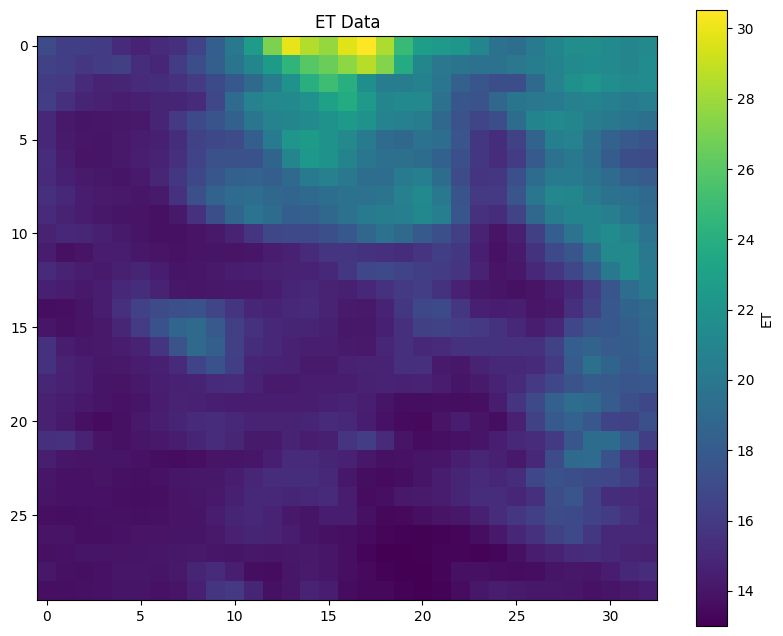

In [282]:
# monthly average with coordinate choices

coord1 = str(input("Choose a western boundary"))
coord2 = str(input("Choose a southern boundary"))
coord3 = str(input("Choose a eastern boundary"))
coord4 = str(input("Choose a northern boundary"))

geometry = ''' {"type": "Polygon",
               "coordinates": [
                [[''' + coord1 + ''', ''' + coord2 + '''],
                [''' + coord1 + ''', ''' + coord4 + '''],
                [''' + coord3 + ''', ''' + coord4 + '''],
                [''' + coord3 + ''', ''' + coord2 + ']]]}'''
print(geometry)

cropping_geometries = [geojson.loads(geometry)]

xds = rioxarray.open_rasterio('/Users/ryjoshi/Documents/programming/ET-Tool-Data-Analysis/MOD16A2_MERGED_20250501_ET.tif')
new_mexico = xds.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico = new_mexico[0, :, :]
new_mexico = new_mexico * 0.00000001

monthly_files = []

month = int(input("Choose a year and month (format YYYYMM)"))
str_month = str(month)

for filename in all_files:
    if str_month in filename and "_ET" in filename:
        monthly_files.append(filename)

monthly_files

for file in monthly_files:
    xds = rioxarray.open_rasterio('/Applications/MODIS_S3_downloads/' + file)
    new_mexico_2 = xds.rio.clip(geometries=cropping_geometries, crs=4326)
    new_mexico_2 = new_mexico_2[0, :, :]
    new_mexico += new_mexico_2

new_mexico /= len(monthly_files)
#print(new_mexico)

new_mexico = np.where(new_mexico >= 32700, np.nan, new_mexico)
min_threshold = int(input("Choose an minimum ET threshold (type 0 if N/A)"))
max_threshold = int(input("Choose an maximum ET threshold (type 32700 if N/A)"))
new_mexico = np.where(new_mexico < min_threshold, np.nan, new_mexico)
new_mexico = np.where(new_mexico > max_threshold, np.nan, new_mexico)

'''pet_files = []

for filename in all_files:
    if "202405" in filename and "PET" in filename:
        pet_files.append(filename)

pet_data = np.zeros((2725, 8496))

for file in pet_files:
    test_path = "/Applications/MODIS_S3_downloads/" + file
    with rasterio.open(test_path) as src:
        pet_data += src.read(1)
        pet_data = np.where(pet_data >= 32700, np.nan, pet_data)
        #print(data)

pet_data /= len(pet_files)
print(pet_data)'''

#each ET or PET file is an 8 day average
'''esi_data = data/pet_data
esi_data = np.where(esi_data >= 0.1, np.nan, esi_data)
print(esi_data)'''

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(new_mexico)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()

Choose a western boundary -104.31
Choose a southern boundary 33.7
Choose a eastern boundary -104.16
Choose a northern boundary 33.81
Choose an minimum ET threshold (0 if N/A) 22
Choose an maximum ET threshold (32700 if N/A) 24.5


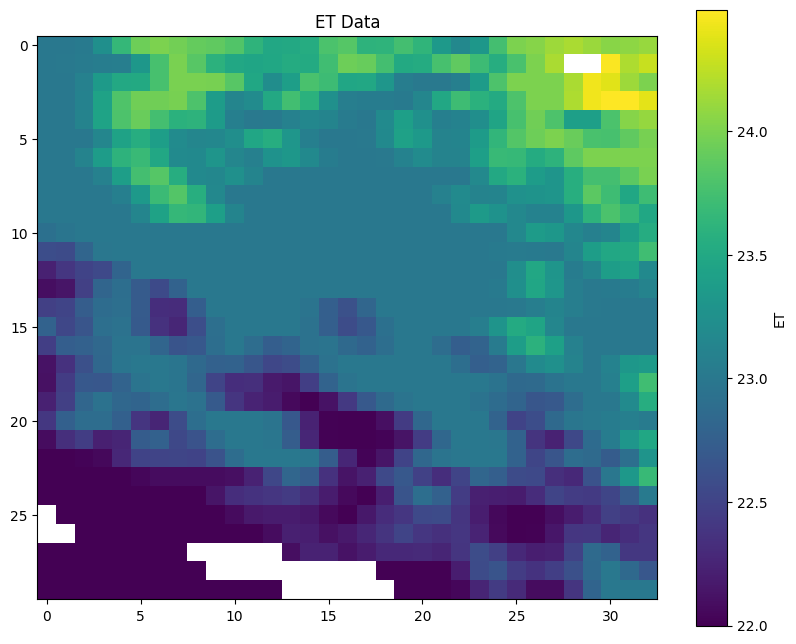

In [283]:
#test coordinate algorithm for single TIF file to ensure it matches QGIS

coord1 = str(input("Choose a western boundary"))
coord2 = str(input("Choose a southern boundary"))
coord3 = str(input("Choose a eastern boundary"))
coord4 = str(input("Choose a northern boundary"))

geometry = ''' {"type": "Polygon",
               "coordinates": [
                [[''' + coord1 + ''', ''' + coord2 + '''],
                [''' + coord1 + ''', ''' + coord4 + '''],
                [''' + coord3 + ''', ''' + coord4 + '''],
                [''' + coord3 + ''', ''' + coord2 + ']]]}'''

cropping_geometries = [geojson.loads(geometry)]

xds = rioxarray.open_rasterio('/Applications/MODIS_S3_downloads/MOD16A2_MERGED_20241210_ET.tif')
#xds.rio.write_crs(4326, inplace=True)
new_mexico = xds.rio.clip(geometries=cropping_geometries, crs=4326)
new_mexico = new_mexico[0, :, :]

new_mexico = np.where(new_mexico >= 32700, np.nan, new_mexico)
min_threshold = float(input("Choose an minimum ET threshold (0 if N/A)"))
max_threshold = float(input("Choose an maximum ET threshold (32700 if N/A)"))
new_mexico = np.where(new_mexico < min_threshold, np.nan, new_mexico)
new_mexico = np.where(new_mexico > max_threshold, np.nan, new_mexico)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(new_mexico)
plt.colorbar(label='ET')
plt.title('ET Data')
plt.show()